# Análisis Exploratorio de Datos (EDA)

### Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline        

### Cargar los datos

In [2]:
df_final = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\dataset_final.xlsx")

In [3]:
df_final.shape

(4418, 34)

### Definición de funciones a utilizar

In [4]:
def count_plot(col, target, data):
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    print(group_counts.sort_values(ascending=False).head(20))
    print()

In [5]:
def column_plot(col, target, data, ax=None):
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="bar", stacked=False, ax=ax)
    ax.legend().remove()

### Información general de los data sets

In [6]:
df_final.head()

AÑO  MES_NUM  AÑO_MES      FECHA  PRECIO M2 VARIACIÓN MENSUAL  \
0  2025        6  2025-06 2025-06-01       5729              0.01   
1  2025        5  2025-05 2025-05-01       5669             0.036   
2  2025        4  2025-04 2025-04-01       5472             0.024   
3  2025        3  2025-03 2025-03-01       5341             0.006   
4  2025        2  2025-02 2025-02-01       5310             0.012   

  VARIACIÓN TRIMESTRAL VARIACIÓN ANUAL    DISTRITO   LATITUD  ...  \
0                0.073           0.181  Arganzuela  40.40021  ...   
1                0.068           0.192  Arganzuela  40.40021  ...   
2                0.043           0.182  Arganzuela  40.40021  ...   
3                0.036           0.163  Arganzuela  40.40021  ...   
4                0.049           0.162  Arganzuela  40.40021  ...   

   ESPERANZA_VIDA  PARO_REGISTRADO  PRECIO_ALQUILER_M2  PRECIO_VENTA_M2  \
0             NaN              NaN                 NaN              NaN   
1             NaN              NaN                 NaN              NaN   
2             NaN              NaN                 NaN              NaN   
3             NaN              NaN                 NaN              NaN   
4             NaN              NaN                 NaN              NaN   

   VIVIENDAS_COMPRAVENTA  EJECUCIONES_HIPOTECARIAS  IPV_VIVIENDA_NUEVA  \
0                    NaN                       NaN                 NaN   
1                 1559.0                       NaN                 NaN   
2                 1499.0                       NaN                 NaN   
3                 1843.0                     249.0             210.738   
4                 1786.0                     249.0             210.738   

   TRANSACCIONES_SUELO  PRECIO_MEDIO_M2_CCMM  VALOR_TRANSACCIONES_SUELO  
0                  NaN                   NaN                        NaN  
1                  NaN                   NaN                        NaN  
2                  NaN                   NaN                        NaN  
3                436.0                306.36                   96670.26  
4                436.0                306.36                   96670.26  

[5 rows x 34 columns]

In [7]:
df_final.columns


Index(['AÑO', 'MES_NUM', 'AÑO_MES', 'FECHA', 'PRECIO M2', 'VARIACIÓN MENSUAL',
       'VARIACIÓN TRIMESTRAL', 'VARIACIÓN ANUAL', 'DISTRITO', 'LATITUD',
       'LONGITUD', 'SHAPE_LENG', 'SHAPE_AREA', 'RANKING', 'VULNERABILIDAD',
       'PRECIO_M2_DIST', 'EURIBOR', 'TRANSACCIONES_CM', 'INDICE_PRECIO',
       'TOTAL_HIPOTECAS', 'CAPITAL_TOTAL_HIPOTECAS', 'POBLACION_ACTIVA',
       'RENTA_MEDIA_HOGAR', 'POBLACION', 'ESPERANZA_VIDA', 'PARO_REGISTRADO',
       'PRECIO_ALQUILER_M2', 'PRECIO_VENTA_M2', 'VIVIENDAS_COMPRAVENTA',
       'EJECUCIONES_HIPOTECARIAS', 'IPV_VIVIENDA_NUEVA', 'TRANSACCIONES_SUELO',
       'PRECIO_MEDIO_M2_CCMM', 'VALOR_TRANSACCIONES_SUELO'],
      dtype='object')

In [8]:
# Contar tipos de variables
print(df_final.dtypes.value_counts())

float64           23
object             6
int64              4
datetime64[ns]     1
Name: count, dtype: int64


In [9]:
df_final.shape

(4418, 34)

In [10]:
cat_cols = df_final.select_dtypes(include='object').columns
num_cols = df_final.select_dtypes(include=['int64', 'float64']).columns
datetime_cols = df_final.select_dtypes(include=['datetime64[ns]']).columns

print("Categóricas:", cat_cols.tolist())
print("Numéricas:", num_cols.tolist())
print("Datetime:", datetime_cols.tolist())

Categóricas: ['AÑO_MES', 'VARIACIÓN MENSUAL', 'VARIACIÓN TRIMESTRAL', 'VARIACIÓN ANUAL', 'DISTRITO', 'LATITUD']
Numéricas: ['AÑO', 'MES_NUM', 'PRECIO M2', 'LONGITUD', 'SHAPE_LENG', 'SHAPE_AREA', 'RANKING', 'VULNERABILIDAD', 'PRECIO_M2_DIST', 'EURIBOR', 'TRANSACCIONES_CM', 'INDICE_PRECIO', 'TOTAL_HIPOTECAS', 'CAPITAL_TOTAL_HIPOTECAS', 'POBLACION_ACTIVA', 'RENTA_MEDIA_HOGAR', 'POBLACION', 'ESPERANZA_VIDA', 'PARO_REGISTRADO', 'PRECIO_ALQUILER_M2', 'PRECIO_VENTA_M2', 'VIVIENDAS_COMPRAVENTA', 'EJECUCIONES_HIPOTECARIAS', 'IPV_VIVIENDA_NUEVA', 'TRANSACCIONES_SUELO', 'PRECIO_MEDIO_M2_CCMM', 'VALOR_TRANSACCIONES_SUELO']
Datetime: ['FECHA']


In [11]:
# Convertir variables numéricas int a float
df_final[num_cols] = df_final[num_cols].astype(float)

In [12]:
# Contar tipos de variables
print(df_final.dtypes.value_counts())

float64           27
object             6
datetime64[ns]     1
Name: count, dtype: int64


In [13]:
df_final.dtypes

AÑO                                 float64
MES_NUM                             float64
AÑO_MES                              object
FECHA                        datetime64[ns]
PRECIO M2                           float64
VARIACIÓN MENSUAL                    object
VARIACIÓN TRIMESTRAL                 object
VARIACIÓN ANUAL                      object
DISTRITO                             object
LATITUD                              object
LONGITUD                            float64
SHAPE_LENG                          float64
SHAPE_AREA                          float64
RANKING                             float64
VULNERABILIDAD                      float64
PRECIO_M2_DIST                      float64
EURIBOR                             float64
TRANSACCIONES_CM                    float64
INDICE_PRECIO                       float64
TOTAL_HIPOTECAS                     float64
CAPITAL_TOTAL_HIPOTECAS             float64
POBLACION_ACTIVA                    float64
RENTA_MEDIA_HOGAR               

In [14]:
df_final.describe()

AÑO      MES_NUM                          FECHA    PRECIO M2  \
count  4418.000000  4418.000000                           4418  4418.000000   
mean   2016.214803     6.476460  2016-09-01 20:03:22.082390016  3227.063830   
min    2007.000000     1.000000            2007-05-01 00:00:00  1250.000000   
25%    2012.000000     3.000000            2012-05-01 00:00:00  2367.000000   
50%    2016.000000     6.000000            2016-09-01 00:00:00  3027.500000   
75%    2021.000000     9.000000            2021-02-01 00:00:00  3923.000000   
max    2025.000000    12.000000            2025-06-01 00:00:00  9818.000000   
std       5.096514     3.455531                            NaN  1198.661277   

          LONGITUD    SHAPE_LENG    SHAPE_AREA    RANKING  VULNERABILIDAD  \
count  4418.000000   4418.000000  4.418000e+03  756.00000      756.000000   
mean     -3.677022  23287.349423  2.888299e+07   11.00000        0.007728   
min      -3.745690   9019.544152  4.679185e+06    1.00000        0.005761   
25%      -3.702750  10866.335995  6.103168e+06    6.00000        0.006319   
50%      -3.683070  18083.304616  1.404832e+07   11.00000        0.007590   
75%      -3.651320  28142.972535  2.762398e+07   16.00000        0.008600   
max      -3.577770  94480.909361  2.378383e+08   21.00000        0.011500   
std       0.044342  18621.197062  4.936426e+07    6.05931        0.001577   

       PRECIO_M2_DIST  ...  ESPERANZA_VIDA  PARO_REGISTRADO  \
count     3789.000000  ...     4294.000000      1554.000000   
mean        12.633558  ...       84.445505     16298.703990   
min          7.400000  ...       80.500000      2980.000000   
25%         10.300000  ...       83.600000      9538.000000   
50%         12.100000  ...       84.500000     14946.000000   
75%         14.500000  ...       85.300000     20513.500000   
max         25.480000  ...       89.400000     45756.000000   
std          3.087030  ...        1.338039      8570.792877   

       PRECIO_ALQUILER_M2  PRECIO_VENTA_M2  VIVIENDAS_COMPRAVENTA  \
count         3789.000000      4168.000000            4398.000000   
mean            12.633558      3163.360845            1603.299227   
min              7.400000      1174.000000             788.000000   
25%             10.300000      2318.000000            1212.000000   
50%             12.100000      2985.000000            1493.000000   
75%             14.500000      3871.250000            1864.000000   
max             25.480000      8818.000000            3665.000000   
std              3.087030      1143.940642             549.876576   

       EJECUCIONES_HIPOTECARIAS  IPV_VIVIENDA_NUEVA  TRANSACCIONES_SUELO  \
count               2835.000000         4357.000000          4357.000000   
mean                 548.244444          131.121532           379.420473   
min                  116.000000           86.079000           148.000000   
25%                  317.000000          107.976000           280.000000   
50%                  406.000000          124.240000           361.000000   
75%                  754.000000          148.812000           464.000000   
max                 1240.000000          210.738000           935.000000   
std                  322.461326           30.036817           146.571187   

       PRECIO_MEDIO_M2_CCMM  VALOR_TRANSACCIONES_SUELO  
count           4357.000000               4.357000e+03  
mean             345.216842               2.210553e+05  
min              224.700000               2.976775e+04  
25%              288.860000               1.217268e+05  
50%              309.860000               1.805847e+05  
75%              377.520000               2.405415e+05  
max              641.820000               1.474330e+06  
std               91.462289               1.644689e+05  

[8 rows x 28 columns]

In [15]:
df_final.describe(exclude=np.number)

AÑO_MES                          FECHA  VARIACIÓN MENSUAL  \
count      4418                           4418             4418.0   
unique      218                            NaN              121.0   
top     2025-03                            NaN                0.0   
freq         21                            NaN              228.0   
mean        NaN  2016-09-01 20:03:22.082390016                NaN   
min         NaN            2007-05-01 00:00:00                NaN   
25%         NaN            2012-05-01 00:00:00                NaN   
50%         NaN            2016-09-01 00:00:00                NaN   
75%         NaN            2021-02-01 00:00:00                NaN   
max         NaN            2025-06-01 00:00:00                NaN   

        VARIACIÓN TRIMESTRAL VARIACIÓN ANUAL     DISTRITO   LATITUD  
count               4418.000            4418         4418      4418  
unique               193.000             427           21        21  
top                    0.001            n.d.  Carabanchel  40.39094  
freq                  93.000             255          218       218  
mean                     NaN             NaN          NaN       NaN  
min                      NaN             NaN          NaN       NaN  
25%                      NaN             NaN          NaN       NaN  
50%                      NaN             NaN          NaN       NaN  
75%                      NaN             NaN          NaN       NaN  
max                      NaN             NaN          NaN       NaN

In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AÑO                        4418 non-null   float64       
 1   MES_NUM                    4418 non-null   float64       
 2   AÑO_MES                    4418 non-null   object        
 3   FECHA                      4418 non-null   datetime64[ns]
 4   PRECIO M2                  4418 non-null   float64       
 5   VARIACIÓN MENSUAL          4418 non-null   object        
 6   VARIACIÓN TRIMESTRAL       4418 non-null   object        
 7   VARIACIÓN ANUAL            4418 non-null   object        
 8   DISTRITO                   4418 non-null   object        
 9   LATITUD                    4418 non-null   object        
 10  LONGITUD                   4418 non-null   float64       
 11  SHAPE_LENG                 4418 non-null   float64       
 12  SHAPE_

In [17]:
df_final.nunique()

AÑO                            19
MES_NUM                        12
AÑO_MES                       218
FECHA                         218
PRECIO M2                    2617
VARIACIÓN MENSUAL             121
VARIACIÓN TRIMESTRAL          193
VARIACIÓN ANUAL               427
DISTRITO                       21
LATITUD                        21
LONGITUD                       21
SHAPE_LENG                     21
SHAPE_AREA                     21
RANKING                        21
VULNERABILIDAD                 59
PRECIO_M2_DIST                472
EURIBOR                       199
TRANSACCIONES_CM              215
INDICE_PRECIO                  72
TOTAL_HIPOTECAS               213
CAPITAL_TOTAL_HIPOTECAS       217
POBLACION_ACTIVA               73
RENTA_MEDIA_HOGAR             160
POBLACION                    3697
ESPERANZA_VIDA                 66
PARO_REGISTRADO              1461
PRECIO_ALQUILER_M2            472
PRECIO_VENTA_M2              2527
VIVIENDAS_COMPRAVENTA         206
EJECUCIONES_HI

### Análisis valores nulos por variable

In [18]:
def resumen_nulos(df: pd.DataFrame) -> pd.DataFrame:
    total = len(df)
    nulos = df.isna().sum()
    pct = (nulos / total * 100).round(2)
    resumen = (
        pd.DataFrame({"n_nulos": nulos, "%_nulos": pct})
        .sort_values("%_nulos", ascending=False)
        .reset_index()
        .rename(columns={"index": "columna"})
    )
    return resumen

# Uso:
res = resumen_nulos(df_final)
print(f"Filas totales: {len(df_final):,}".replace(",", "."))
res

Filas totales: 4.418


columna  n_nulos  %_nulos
0                     RANKING     3662    82.89
1              VULNERABILIDAD     3662    82.89
2             PARO_REGISTRADO     2864    64.83
3           RENTA_MEDIA_HOGAR     2498    56.54
4    EJECUCIONES_HIPOTECARIAS     1583    35.83
5          PRECIO_ALQUILER_M2      629    14.24
6              PRECIO_M2_DIST      629    14.24
7             PRECIO_VENTA_M2      250     5.66
8              ESPERANZA_VIDA      124     2.81
9                   POBLACION      124     2.81
10         IPV_VIVIENDA_NUEVA       61     1.38
11  VALOR_TRANSACCIONES_SUELO       61     1.38
12              INDICE_PRECIO       61     1.38
13       PRECIO_MEDIO_M2_CCMM       61     1.38
14        TRANSACCIONES_SUELO       61     1.38
15    CAPITAL_TOTAL_HIPOTECAS       20     0.45
16      VIVIENDAS_COMPRAVENTA       20     0.45
17            TOTAL_HIPOTECAS       20     0.45
18                    MES_NUM        0     0.00
19                        AÑO        0     0.00
20           TRANSACCIONES_CM        0     0.00
21                 SHAPE_AREA        0     0.00
22                   LONGITUD        0     0.00
23                    EURIBOR        0     0.00
24                 SHAPE_LENG        0     0.00
25                    LATITUD        0     0.00
26          VARIACIÓN MENSUAL        0     0.00
27                  PRECIO M2        0     0.00
28                      FECHA        0     0.00
29       VARIACIÓN TRIMESTRAL        0     0.00
30                    AÑO_MES        0     0.00
31            VARIACIÓN ANUAL        0     0.00
32                   DISTRITO        0     0.00
33           POBLACION_ACTIVA        0     0.00

In [19]:
!pip install seaborn

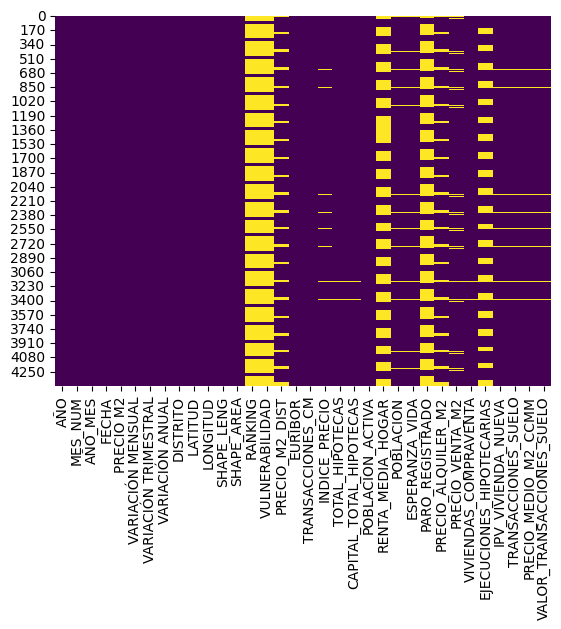

In [20]:
import seaborn as sns
sns.heatmap(df_final.isnull(), cbar=False, cmap='viridis')
plt.show()

### Correlación entre variables numéricas - evitar multicolinealidad

In [21]:
# Seleccionar solo columnas de tipo int o float
numeric_df = df_final.select_dtypes(include=['int', 'float'])

# Calcular la matriz de correlación
numeric_df.corr()

AÑO       MES_NUM  PRECIO M2  \
AÑO                        1.000000e+00 -7.352193e-02   0.206790   
MES_NUM                   -7.352193e-02  1.000000e+00  -0.013049   
PRECIO M2                  2.067904e-01 -1.304870e-02   1.000000   
LONGITUD                   2.986621e-02  6.745270e-04  -0.138389   
SHAPE_LENG                -6.185436e-04  1.828170e-03  -0.137000   
SHAPE_AREA                -3.064848e-03  1.619086e-03  -0.063117   
RANKING                    4.344355e-13  4.496300e-19   0.837686   
VULNERABILIDAD            -4.519205e-02 -6.750567e-18  -0.815324   
PRECIO_M2_DIST             5.038695e-01  3.452395e-02   0.886857   
EURIBOR                   -1.356077e-01  1.777684e-02   0.250255   
TRANSACCIONES_CM           5.841391e-01 -2.308263e-01   0.250079   
INDICE_PRECIO              5.356275e-01 -7.262980e-03   0.415421   
TOTAL_HIPOTECAS           -2.094948e-01 -8.742942e-02   0.225617   
CAPITAL_TOTAL_HIPOTECAS   -3.081577e-02 -5.486278e-02   0.276199   
POBLACION_ACTIVA           6.581625e-01 -3.321774e-02   0.386976   
RENTA_MEDIA_HOGAR          1.966314e-01  1.764194e-16   0.818114   
POBLACION                  3.392325e-01 -2.612343e-03   0.032608   
ESPERANZA_VIDA             5.404314e-01 -2.618461e-02   0.296574   
PARO_REGISTRADO           -8.745679e-02 -2.330310e-02  -0.575752   
PRECIO_ALQUILER_M2         5.038695e-01  3.452395e-02   0.886857   
PRECIO_VENTA_M2            1.489522e-01  3.179538e-02   0.997552   
VIVIENDAS_COMPRAVENTA     -4.425970e-01 -2.397014e-01   0.100885   
EJECUCIONES_HIPOTECARIAS  -8.079882e-01 -5.474165e-02  -0.345205   
IPV_VIVIENDA_NUEVA         6.981091e-01 -2.324892e-02   0.396315   
TRANSACCIONES_SUELO        2.013491e-01  5.388347e-02   0.020901   
PRECIO_MEDIO_M2_CCMM      -7.641461e-01  2.862622e-02   0.050044   
VALOR_TRANSACCIONES_SUELO -4.280697e-01  3.042659e-02   0.082754   

                               LONGITUD    SHAPE_LENG    SHAPE_AREA  \
AÑO                        2.986621e-02 -6.185436e-04 -3.064848e-03   
MES_NUM                    6.745270e-04  1.828170e-03  1.619086e-03   
PRECIO M2                 -1.383891e-01 -1.369996e-01 -6.311662e-02   
LONGITUD                   1.000000e+00 -7.257643e-02 -1.485527e-01   
SHAPE_LENG                -7.257643e-02  1.000000e+00  9.647131e-01   
SHAPE_AREA                -1.485527e-01  9.647131e-01  1.000000e+00   
RANKING                    1.538674e-02  8.265096e-02  1.176461e-01   
VULNERABILIDAD            -2.506334e-02 -1.382604e-01 -1.587572e-01   
PRECIO_M2_DIST            -2.166678e-01 -2.474903e-01 -1.721447e-01   
EURIBOR                   -3.031590e-02  2.070721e-03  3.711215e-03   
TRANSACCIONES_CM          -1.299248e-03  3.766439e-04 -1.488495e-04   
INDICE_PRECIO             -1.173685e-02  7.999274e-04  1.336666e-03   
TOTAL_HIPOTECAS           -3.600234e-02  5.452705e-04  3.287063e-03   
CAPITAL_TOTAL_HIPOTECAS   -3.668179e-02  9.661665e-04  3.367770e-03   
POBLACION_ACTIVA           1.088078e-02 -1.763852e-04 -7.501924e-04   
RENTA_MEDIA_HOGAR         -5.355060e-02  1.450736e-01  1.655718e-01   
POBLACION                 -3.868073e-01  1.681931e-01  1.767426e-01   
ESPERANZA_VIDA             3.333616e-02  2.290186e-02  1.638198e-02   
PARO_REGISTRADO           -3.125479e-01  1.741884e-02  7.102130e-03   
PRECIO_ALQUILER_M2        -2.166678e-01 -2.474903e-01 -1.721447e-01   
PRECIO_VENTA_M2           -1.413932e-01 -1.360324e-01 -6.074347e-02   
VIVIENDAS_COMPRAVENTA     -2.359731e-02  4.176848e-04  2.400787e-03   
EJECUCIONES_HIPOTECARIAS   2.388537e-15 -6.905401e-16 -6.381115e-16   
IPV_VIVIENDA_NUEVA        -1.301054e-03  4.217373e-04  2.500641e-04   
TRANSACCIONES_SUELO       -4.662823e-03  1.067329e-03  8.040977e-04   
PRECIO_MEDIO_M2_CCMM      -3.911994e-02  7.075054e-04  3.854647e-03   
VALOR_TRANSACCIONES_SUELO -4.488555e-02  9.462774e-05  3.421010e-03   

                                RANKING  VULNERABILIDAD  PRECIO_M2_DIST  \
AÑO                        4.344355e-13   -4.519205e-02        0.50

In [22]:
corr = df_final.select_dtypes(include=['number']).corr()
corr_3d = corr.round(3)     # 3 decimales
corr_3d

AÑO  MES_NUM  PRECIO M2  LONGITUD  SHAPE_LENG  \
AÑO                        1.000   -0.074      0.207     0.030      -0.001   
MES_NUM                   -0.074    1.000     -0.013     0.001       0.002   
PRECIO M2                  0.207   -0.013      1.000    -0.138      -0.137   
LONGITUD                   0.030    0.001     -0.138     1.000      -0.073   
SHAPE_LENG                -0.001    0.002     -0.137    -0.073       1.000   
SHAPE_AREA                -0.003    0.002     -0.063    -0.149       0.965   
RANKING                    0.000    0.000      0.838     0.015       0.083   
VULNERABILIDAD            -0.045   -0.000     -0.815    -0.025      -0.138   
PRECIO_M2_DIST             0.504    0.035      0.887    -0.217      -0.247   
EURIBOR                   -0.136    0.018      0.250    -0.030       0.002   
TRANSACCIONES_CM           0.584   -0.231      0.250    -0.001       0.000   
INDICE_PRECIO              0.536   -0.007      0.415    -0.012       0.001   
TOTAL_HIPOTECAS           -0.209   -0.087      0.226    -0.036       0.001   
CAPITAL_TOTAL_HIPOTECAS   -0.031   -0.055      0.276    -0.037       0.001   
POBLACION_ACTIVA           0.658   -0.033      0.387     0.011      -0.000   
RENTA_MEDIA_HOGAR          0.197    0.000      0.818    -0.054       0.145   
POBLACION                  0.339   -0.003      0.033    -0.387       0.168   
ESPERANZA_VIDA             0.540   -0.026      0.297     0.033       0.023   
PARO_REGISTRADO           -0.087   -0.023     -0.576    -0.313       0.017   
PRECIO_ALQUILER_M2         0.504    0.035      0.887    -0.217      -0.247   
PRECIO_VENTA_M2            0.149    0.032      0.998    -0.141      -0.136   
VIVIENDAS_COMPRAVENTA     -0.443   -0.240      0.101    -0.024       0.000   
EJECUCIONES_HIPOTECARIAS  -0.808   -0.055     -0.345     0.000      -0.000   
IPV_VIVIENDA_NUEVA         0.698   -0.023      0.396    -0.001       0.000   
TRANSACCIONES_SUELO        0.201    0.054      0.021    -0.005       0.001   
PRECIO_MEDIO_M2_CCMM      -0.764    0.029      0.050    -0.039       0.001   
VALOR_TRANSACCIONES_SUELO -0.428    0.030      0.083    -0.045       0.000   

                           SHAPE_AREA  RANKING  VULNERABILIDAD  \
AÑO                            -0.003    0.000          -0.045   
MES_NUM                         0.002    0.000          -0.000   
PRECIO M2                      -0.063    0.838          -0.815   
LONGITUD                       -0.149    0.015          -0.025   
SHAPE_LENG                      0.965    0.083          -0.138   
SHAPE_AREA                      1.000    0.118          -0.159   
RANKING                         0.118    1.000          -0.970   
VULNERABILIDAD                 -0.159   -0.970           1.000   
PRECIO_M2_DIST                 -0.172    0.648          -0.619   
EURIBOR                         0.004   -0.000           0.018   
TRANSACCIONES_CM               -0.000   -0.000           0.022   
INDICE_PRECIO                   0.001   -0.000          -0.047   
TOTAL_HIPOTECAS                 0.003   -0.000           0.001   
CAPITAL_TOTAL_HIPOTECAS         0.003    0.000           0.001   
POBLACION_ACTIVA               -0.001   -0.000          -0.033   
RENTA_MEDIA_HOGAR               0.166    0.957          -0.917   
POBLACION                       0.177   -0.319           0.331   
ESPERANZA_VIDA                  0.016    0.385          -0.367   
PARO_REGISTRADO                 0.007   -0.733           0.764   
PRECIO_ALQUILER_M2             -0.172    0.648          -0.619   
PRECIO_VENTA_M2                -0.061    0.834          -0.811   
VIVIENDAS_COMPRAVENTA           0.002   -0.000           0.004   
EJECUCIONES_HIPOTECARIAS       -0.000    0.000           0.018   
IPV_VIVIENDA_NUEVA              0.000   -0.000          -0.043   
TRANSACCIONES_SUELO             0.001    0.000           0.039   
PRECIO_MEDIO_M2_CCMM            0.004    0.000           0.005   
VALOR_TRANSACCIONES_SUELO       0.003   -0.000           0.020

In [23]:
corr.to_excel(r"C:\Users\evahr\Downloads\correlación.xlsx", index=False)

### Matriz de correlación

In [24]:
#plt.figure(figsize=(10, 6))
#sns.heatmap(df_final[num_cols].corr(), annot=True, cmap='coolwarm')
#plt.title("Matriz de correlación")
#plt.show()

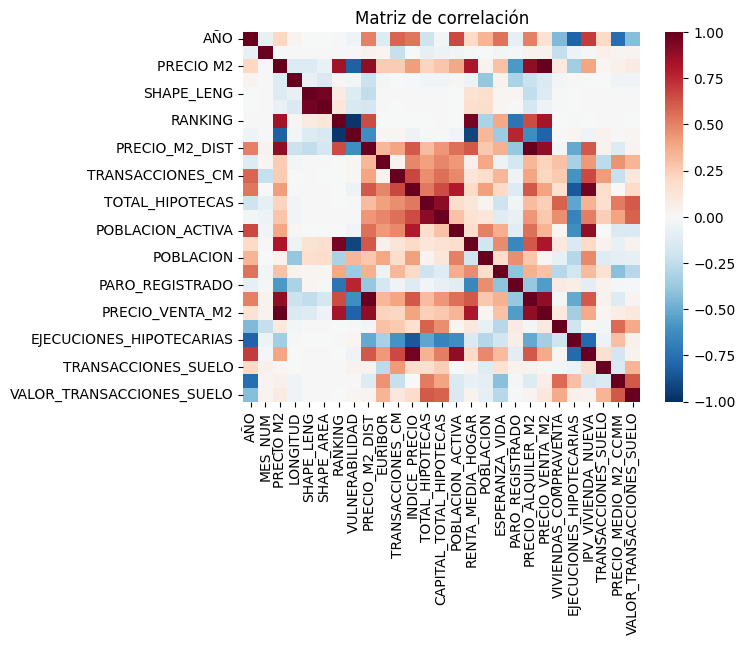

In [25]:
num = (df_final
       .select_dtypes(include="number")
       .drop(columns=["DISTRITO"], errors="ignore"))

corr = num.corr()
sns.heatmap(corr, cmap="RdBu_r", vmin=-1, vmax=1, center=0)
plt.title("Matriz de correlación")
plt.show()

### Análisis correlaciones peligrosas (|r| ≥ 0.8) para evitar multicolinealidad

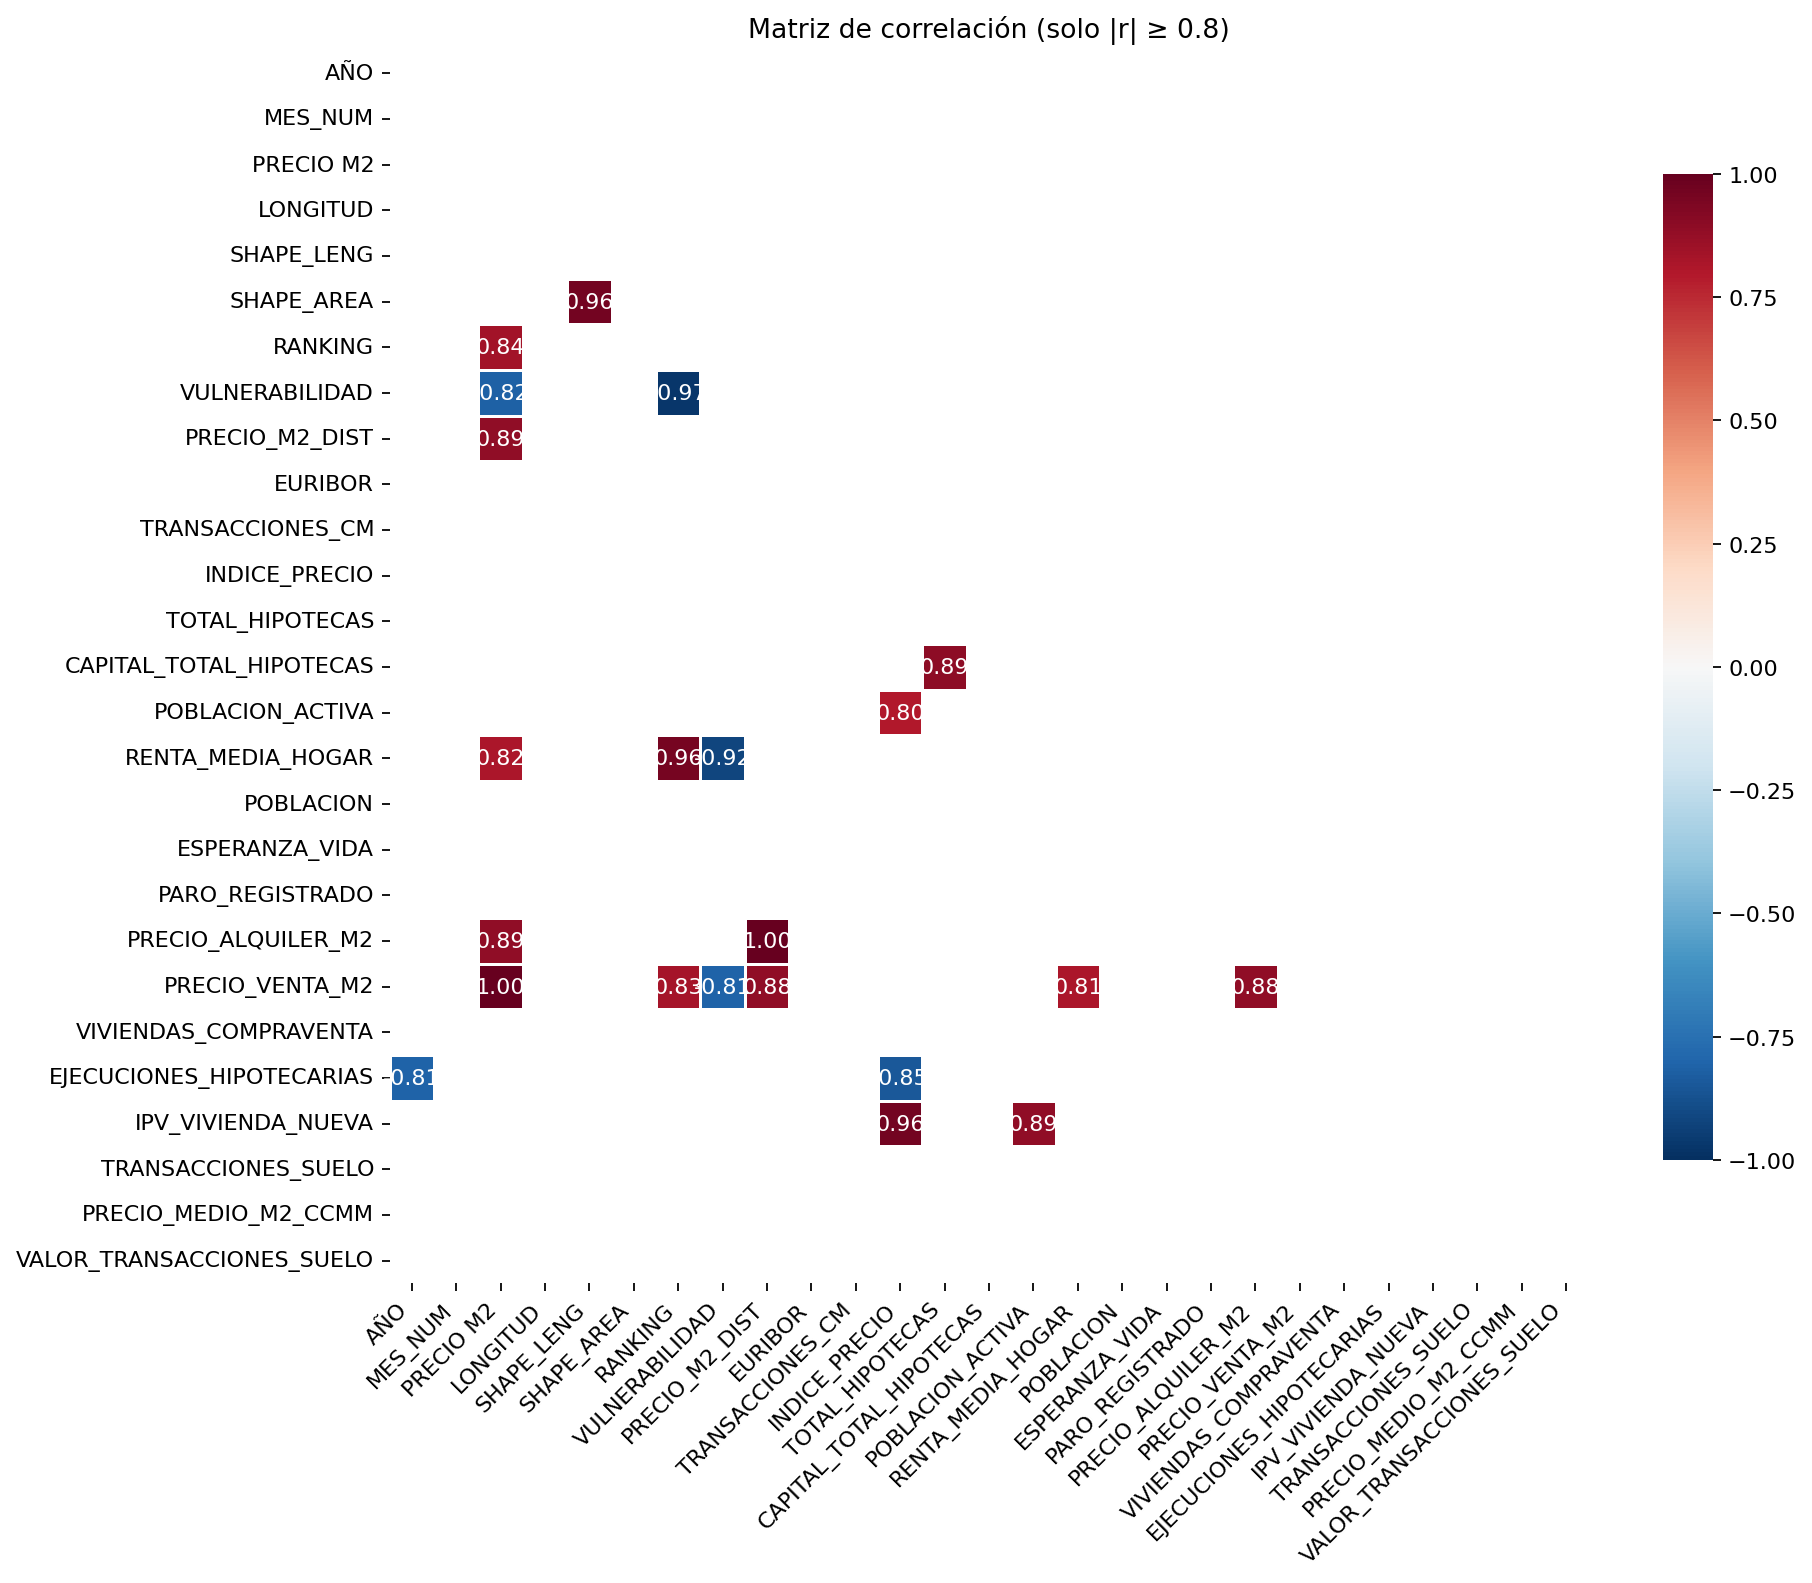

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Umbral de correlación peligrosa
thr = 0.80

# Ocultar mitad superior y correlaciones débiles
mask_upper = np.triu(np.ones_like(corr, dtype=bool))
mask_weak  = corr.abs() < thr
mask = mask_upper | mask_weak

plt.figure(figsize=(12,10), dpi=160)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
            vmin=-1, vmax=1, center=0, cmap="RdBu_r",
            linewidths=.5, cbar_kws={"shrink": .8})
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title(f"Matriz de correlación (solo |r| ≥ {thr})")
plt.tight_layout()
plt.show()


**Pares de variables con multicolinealidad fuerte (|r| > 0.8).**

1. PRECIO M2 está muy correlacionado con:

PRECIO_VENTA_M2 (0.99)

PRECIO_ALQUILER_M2 (0.89)

PRECIO_M2_DIST (0.89)

RENTA_MEDIA_HOGAR (0.82)

2. RANKING ↔ RENTA_MEDIA_HOGAR (0.96) y ↔ VULNERABILIDAD (-0.97).

3. SHAPE_LENG ↔ SHAPE_AREA (0.96).

4. PRECIO_ALQUILER_M2 ↔ PRECIO_M2_DIST (1.0) Y PRECIO_VENTA_M2 (0.88)

5. INDICE_PRECIO ↔ IPV_VIVIENDA_NUEVA (0.96).

6. TOTAL_HIPOTECAS ↔ CAPITAL_TOTAL_HIPOTECAS (0.89).

7. POBLACION_ACTIVA ↔ IPV_VIVIENDA_NUEVA (0.89).

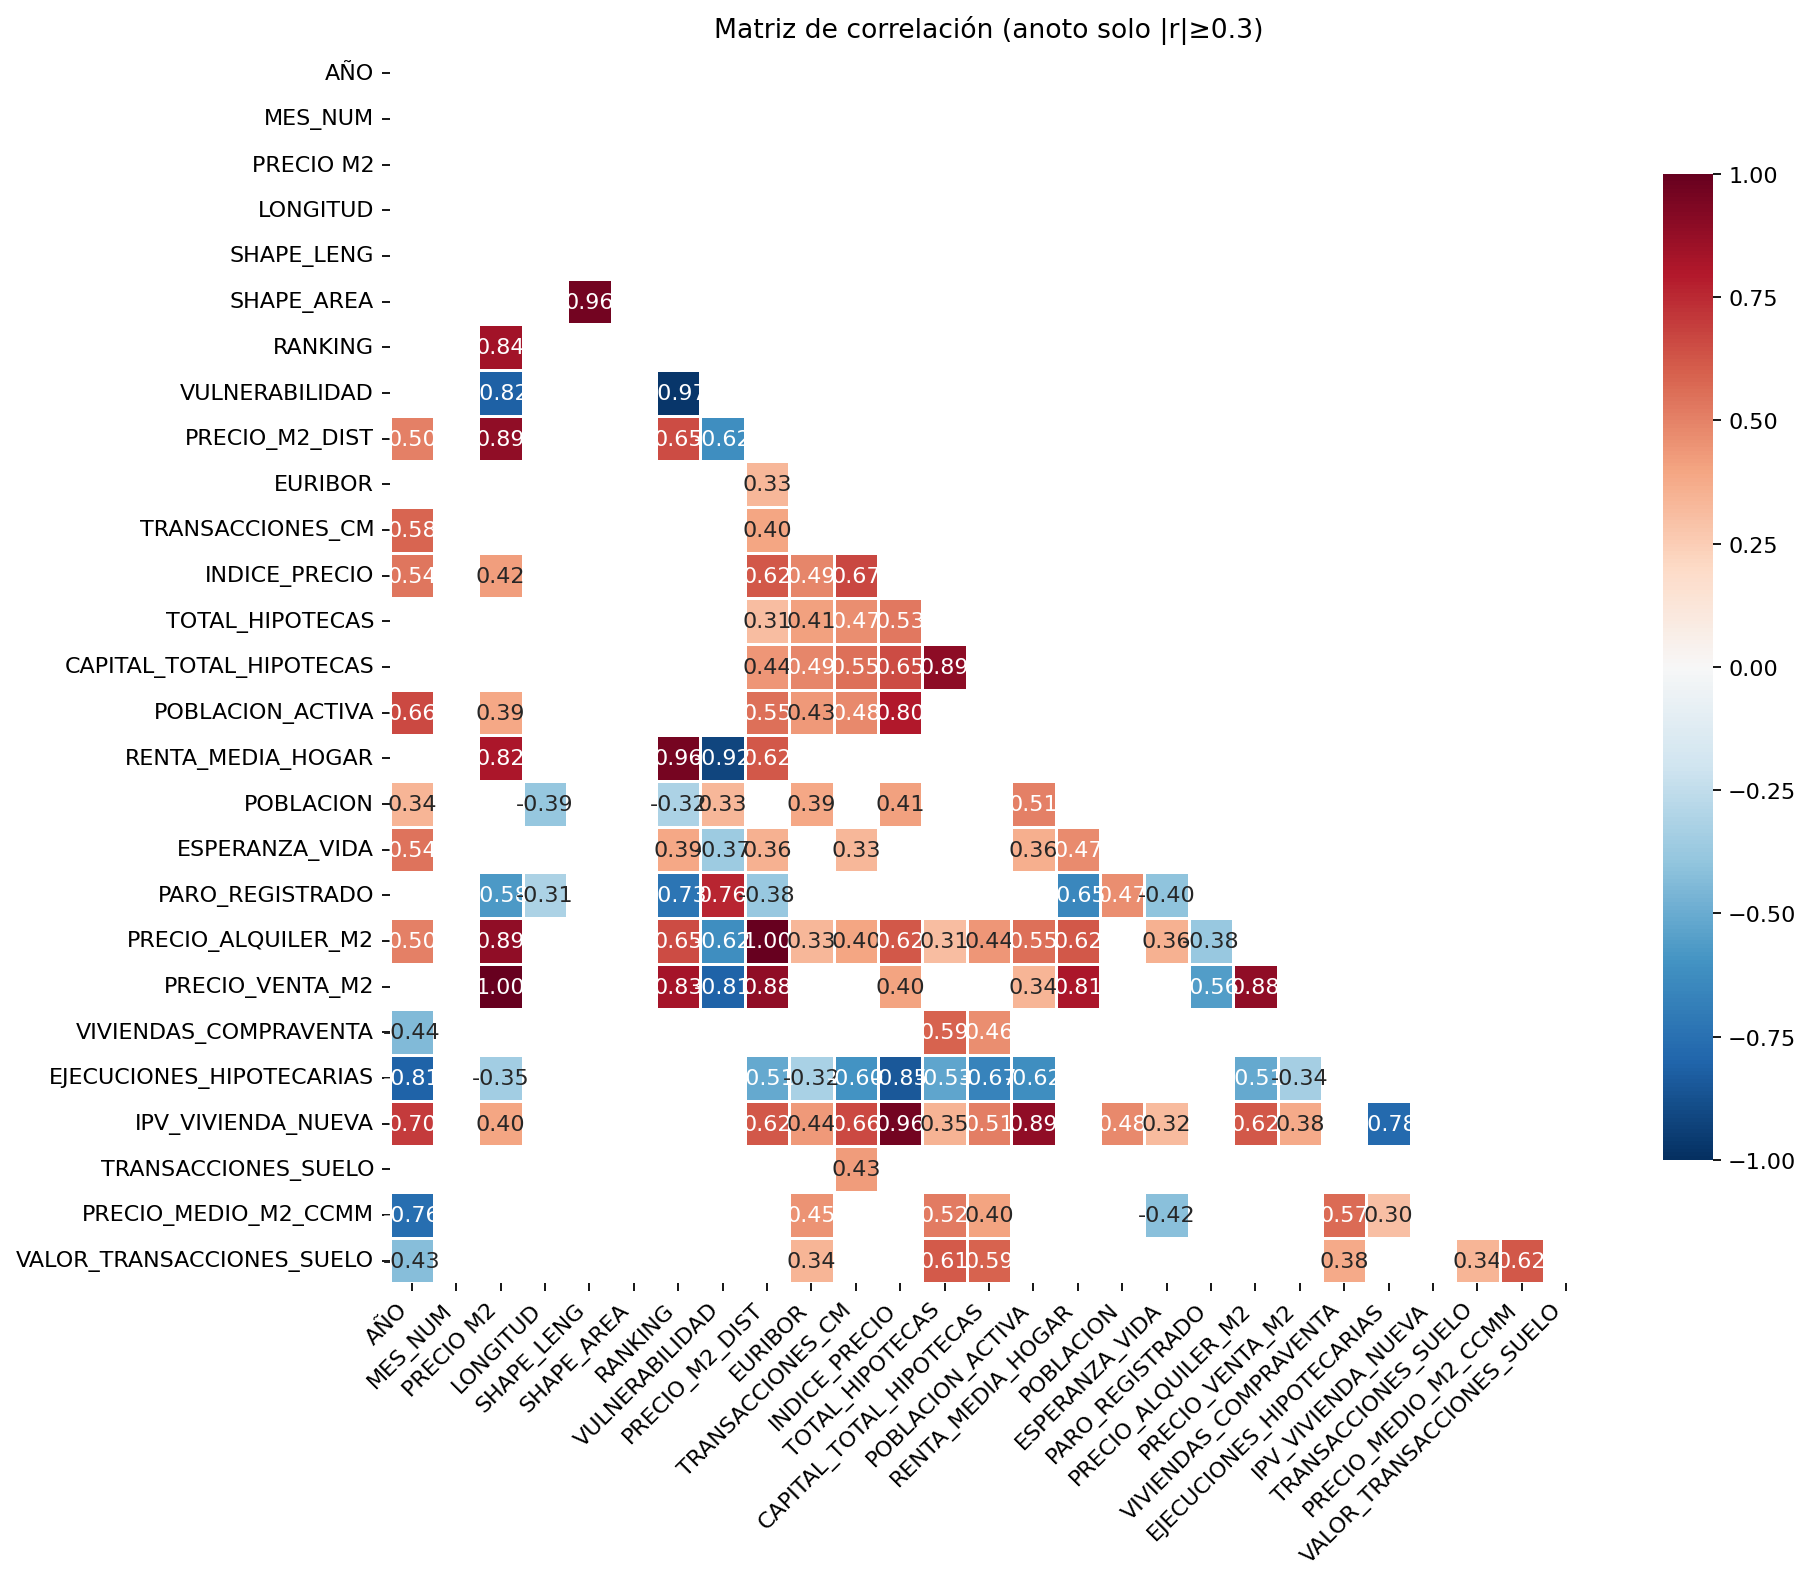

In [27]:
thr = 0.30
mask_upper = np.triu(np.ones_like(corr, bool))              # mitad superior
mask_weak  = corr.abs() < thr                               # correlaciones débiles
mask = mask_upper | mask_weak                               # ocultar ambas

plt.figure(figsize=(12,10), dpi=160)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
            vmin=-1, vmax=1, center=0, cmap="RdBu_r",
            linewidths=.5, cbar_kws={"shrink": .8})
plt.xticks(rotation=45, ha="right"); plt.yticks(rotation=0)
plt.title(f"Matriz de correlación (anoto solo |r|≥{thr})")
plt.tight_layout(); plt.show()



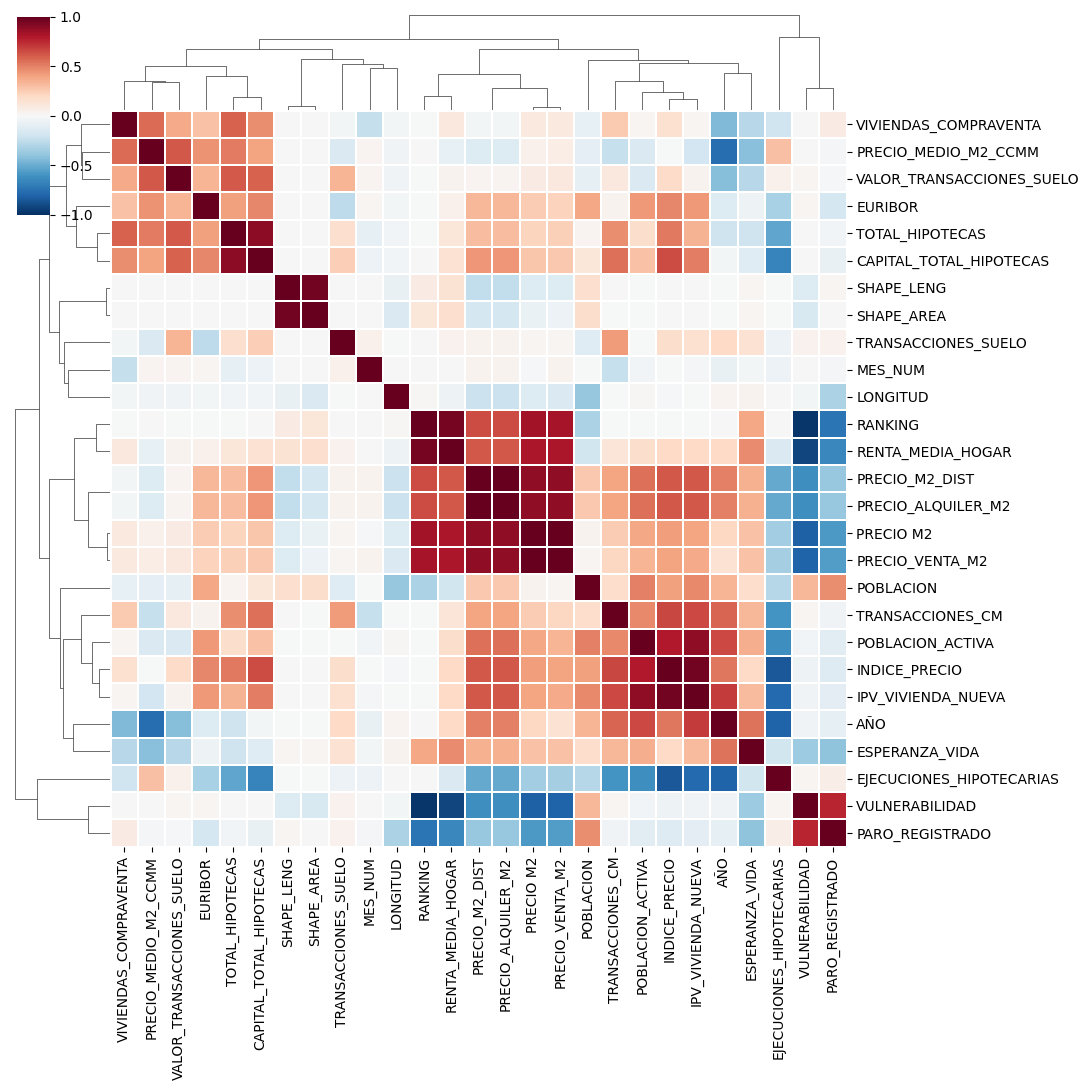

In [28]:
sns.clustermap(
    corr, cmap="RdBu_r", vmin=-1, vmax=1, center=0,
    linewidths=.2, figsize=(11,11), dendrogram_ratio=.12,
    cbar_pos=(.02, .8, .03, .18))  # posición de la barra
plt.show()



### Diagrama de dispersión PRECIO M2 vs las demás variables

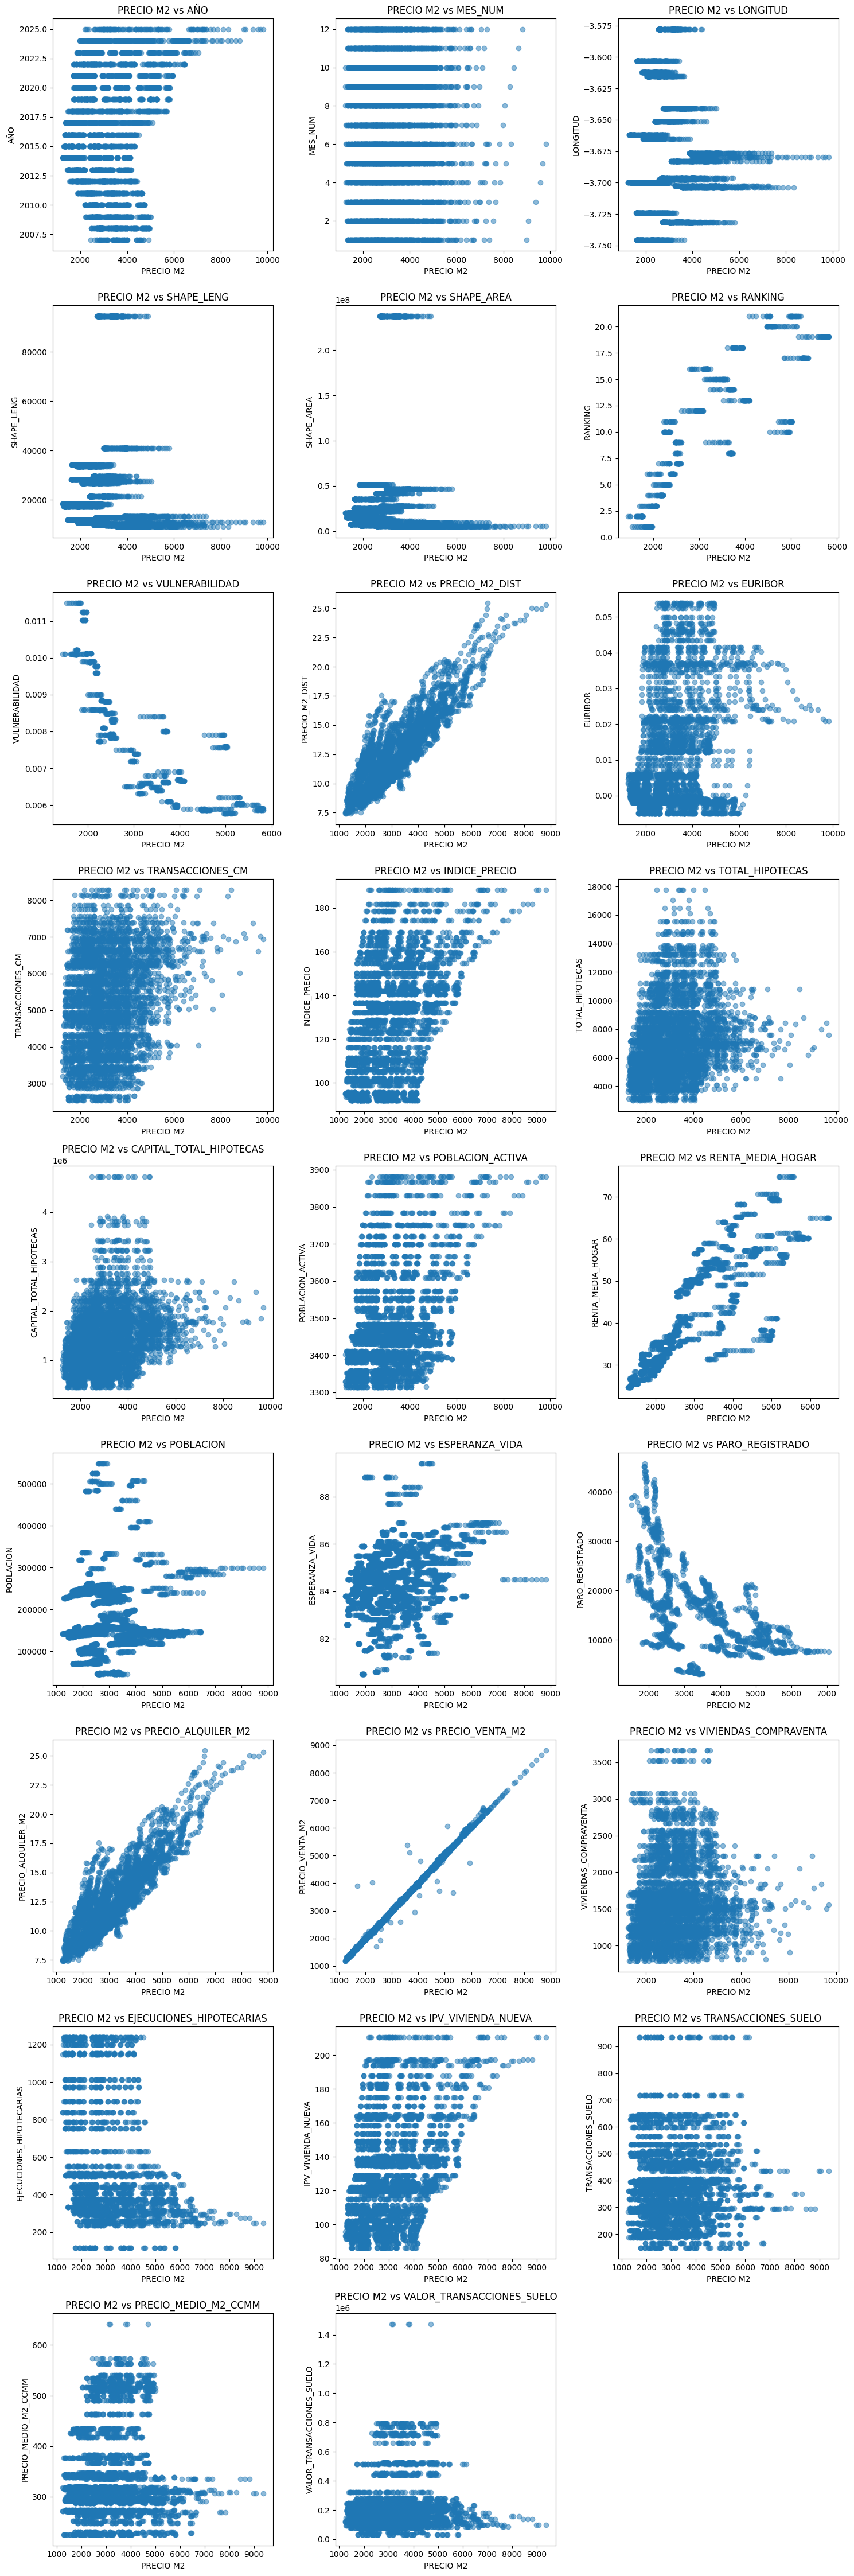

In [29]:
import matplotlib.pyplot as plt
import math

# Variable principal
target = "PRECIO M2"

# Seleccionar solo las columnas numéricas
numeric_cols = df_final.select_dtypes(include="number").columns

# Quitar la variable objetivo
numeric_cols = [col for col in numeric_cols if col != target]

# Definir número de filas y columnas para la rejilla
n = len(numeric_cols)
cols = 3  # número de columnas en la rejilla
rows = math.ceil(n / cols)

# Crear figura y ejes
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
axes = axes.flatten()

# Crear un scatter plot en cada subplot (PRECIO M2 en eje X)
for i, col in enumerate(numeric_cols):
    axes[i].scatter(df_final[target], df_final[col], alpha=0.5)
    axes[i].set_xlabel(target)
    axes[i].set_ylabel(col)
    axes[i].set_title(f"{target} vs {col}")

# Quitar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


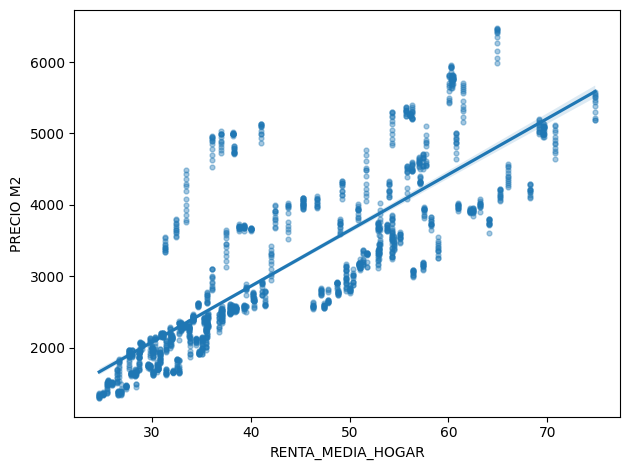

In [30]:
sns.regplot(data=df_final, x="RENTA_MEDIA_HOGAR", y="PRECIO M2",
            scatter_kws={'s':12, 'alpha':0.4})
plt.tight_layout(); plt.show()

###  Histogramas

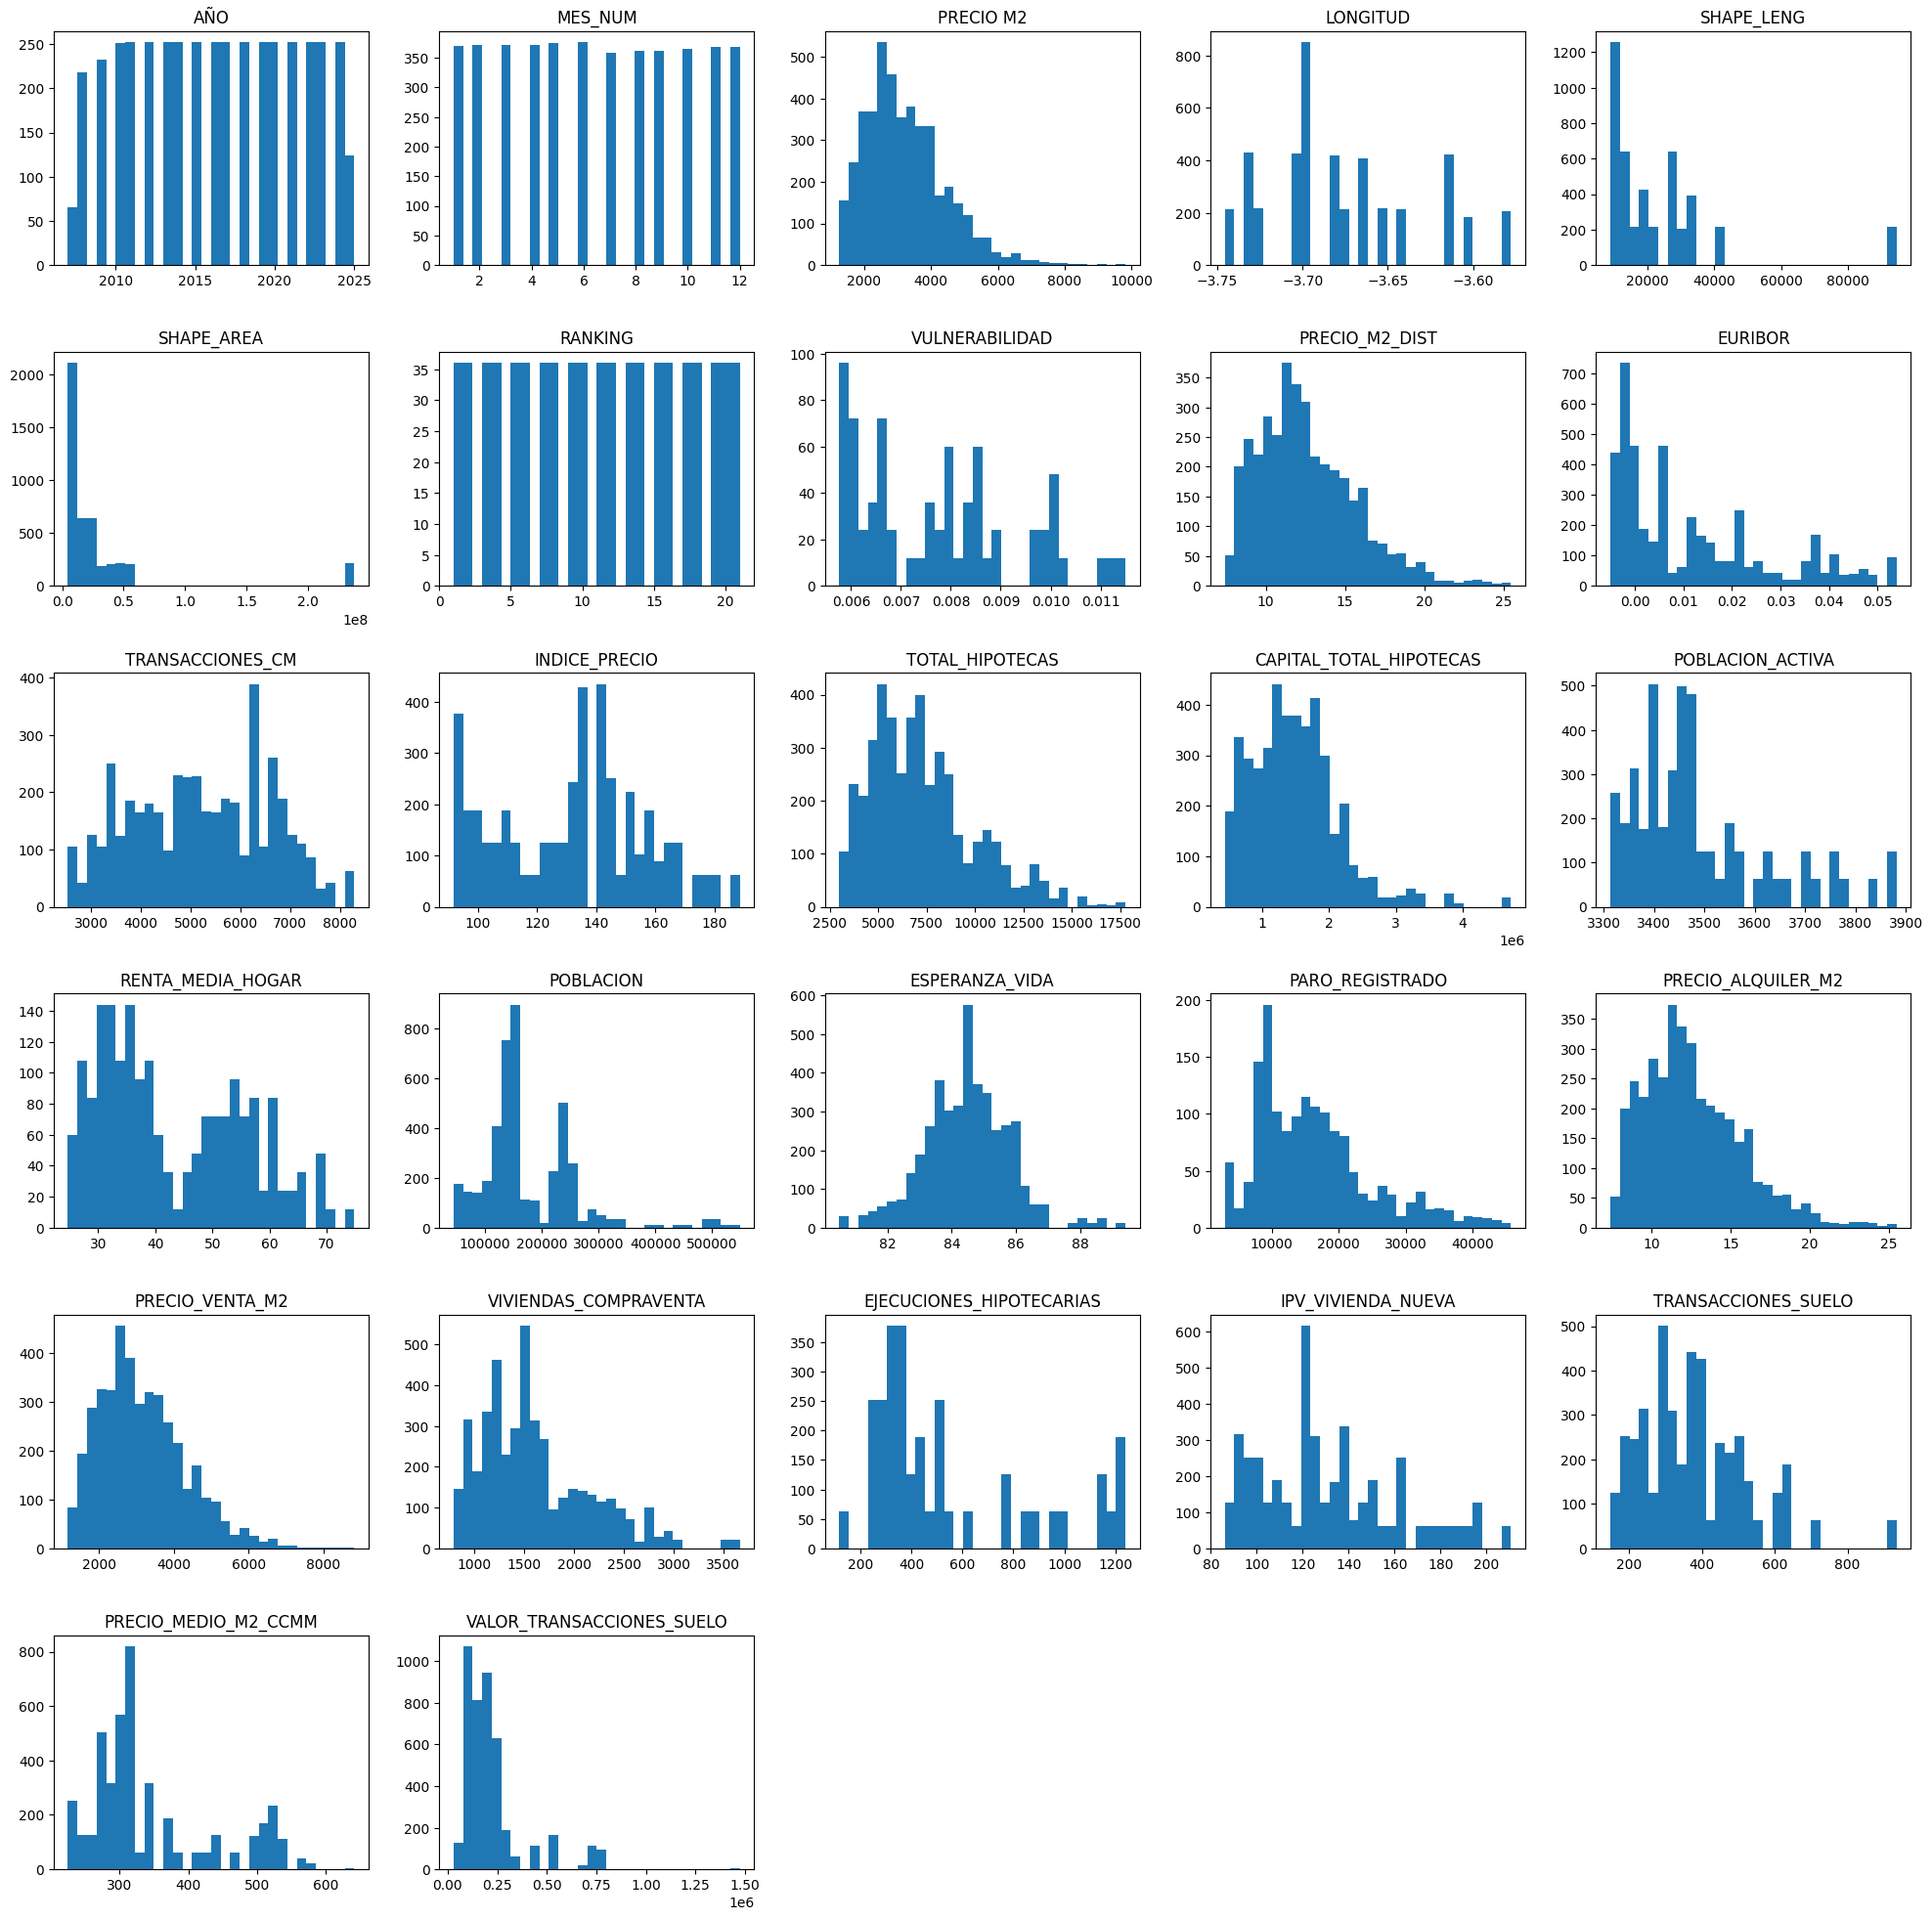

In [31]:
df_final.select_dtypes('number').hist(figsize=(20,20), bins=30, grid=False)
plt.tight_layout(pad=2.0, w_pad=1.5, h_pad=1.8)
plt.show()


In [32]:
# Contar filas duplicadas
duplicados_por_fila = df_final.duplicated().sum()
print("Valores duplicados por fila:")
print(duplicados_por_fila)

Valores duplicados por fila:
0


### Valores atípicos

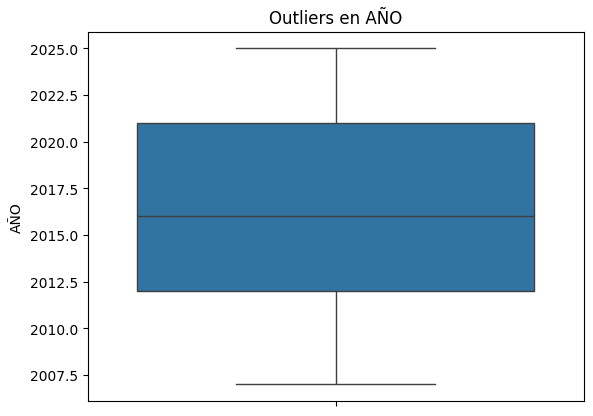

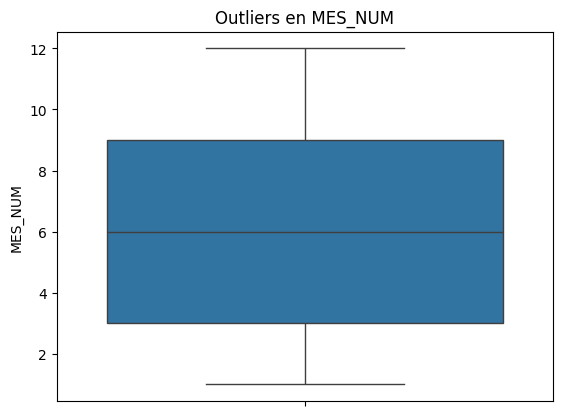

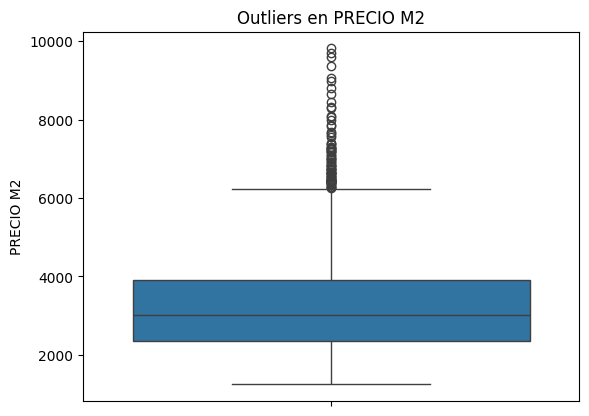

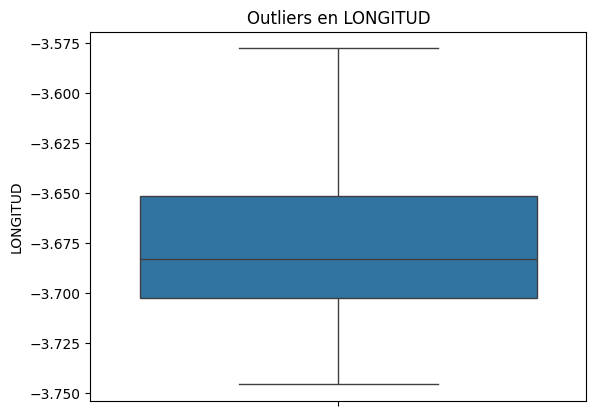

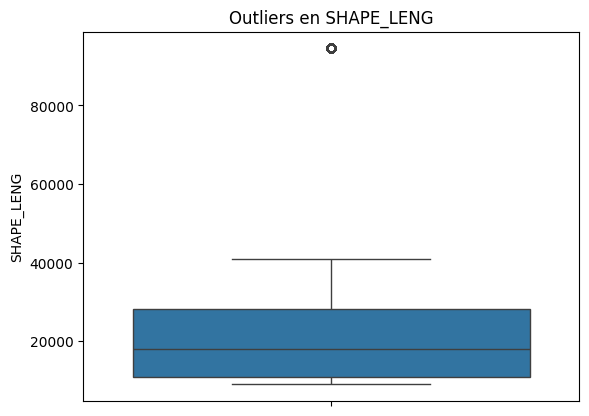

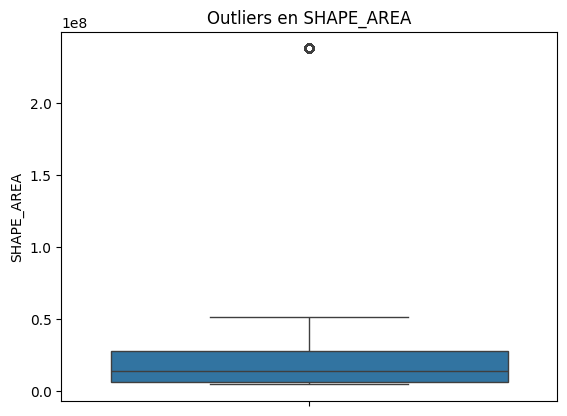

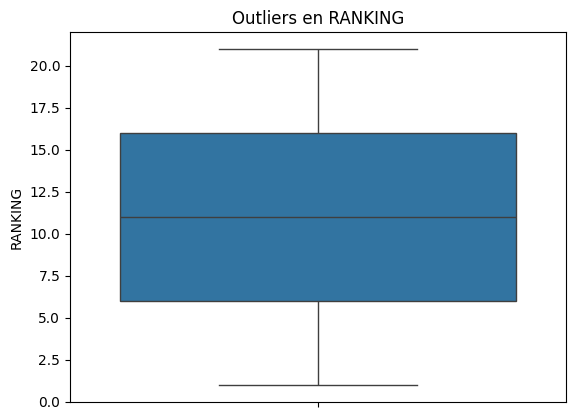

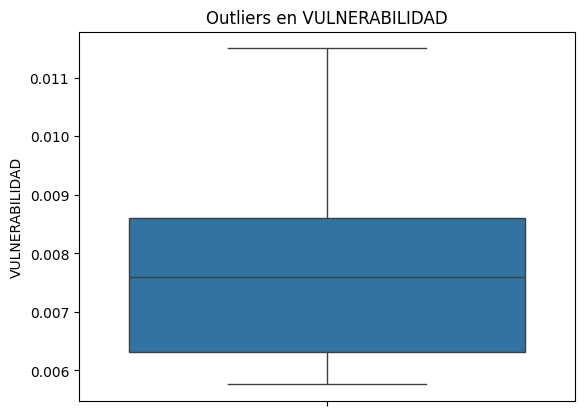

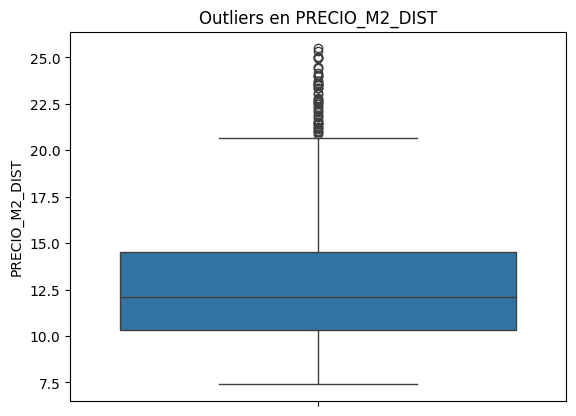

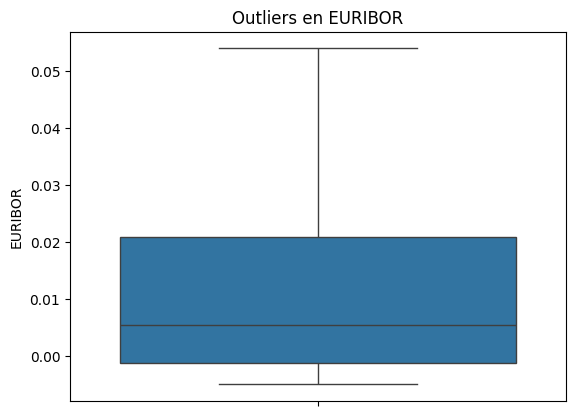

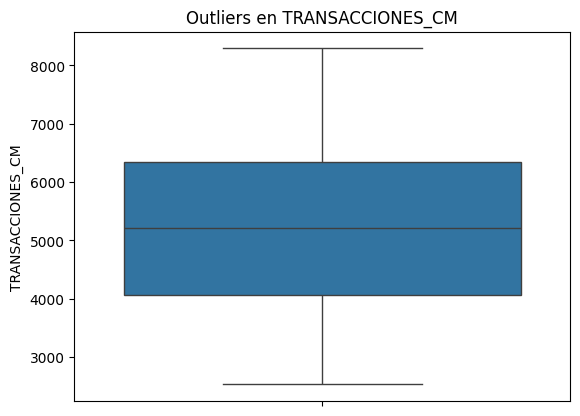

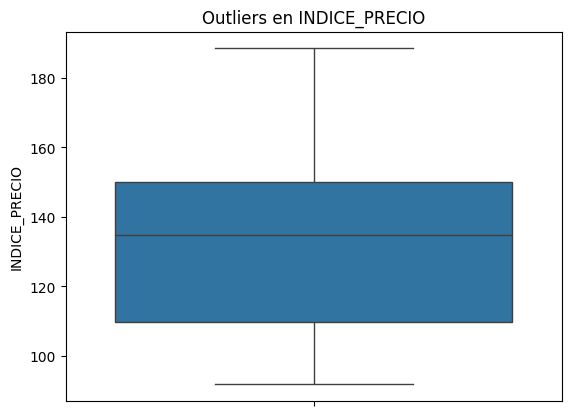

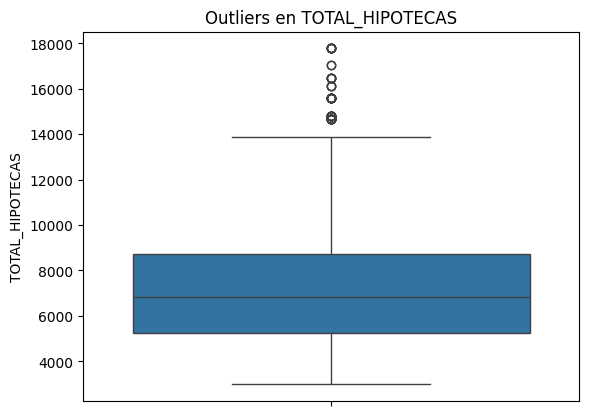

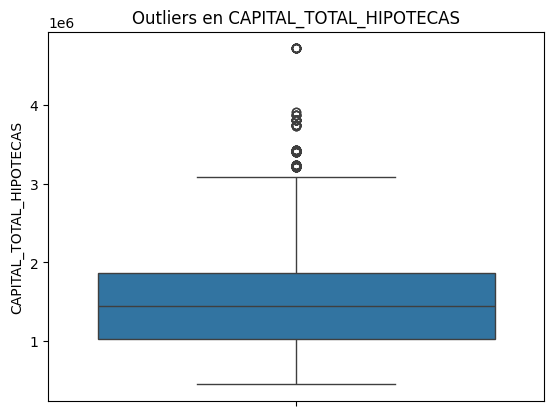

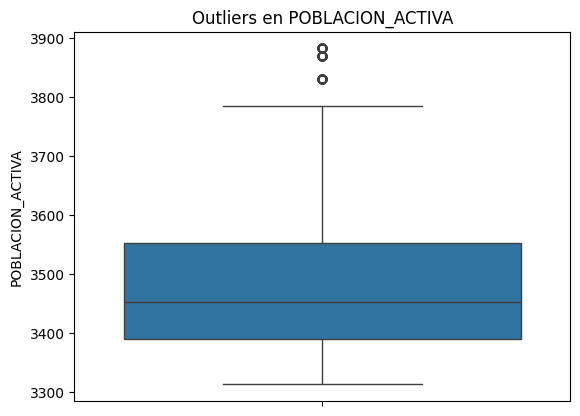

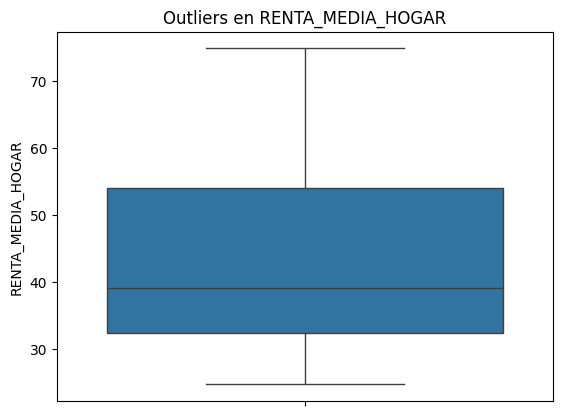

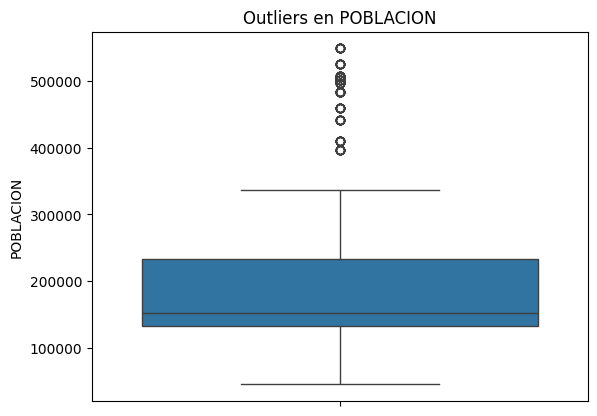

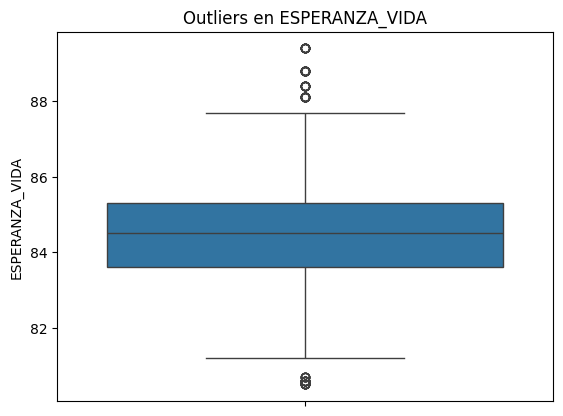

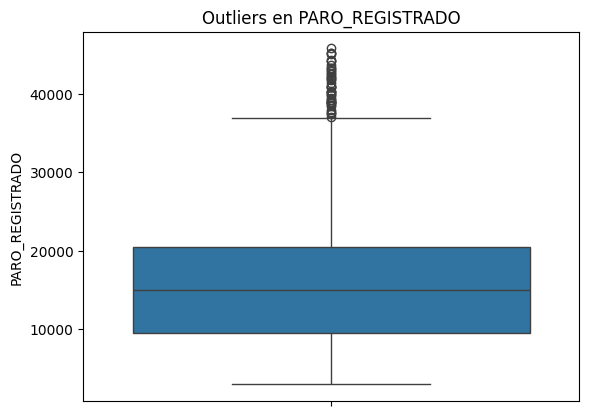

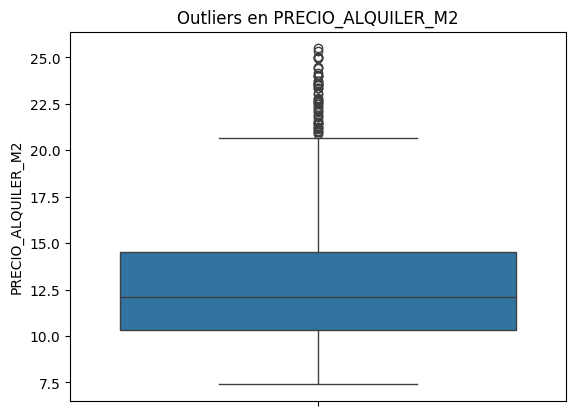

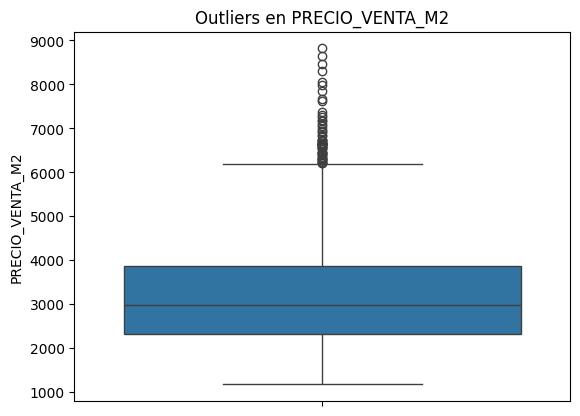

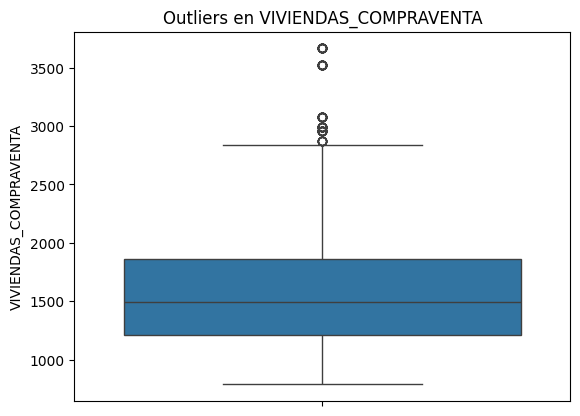

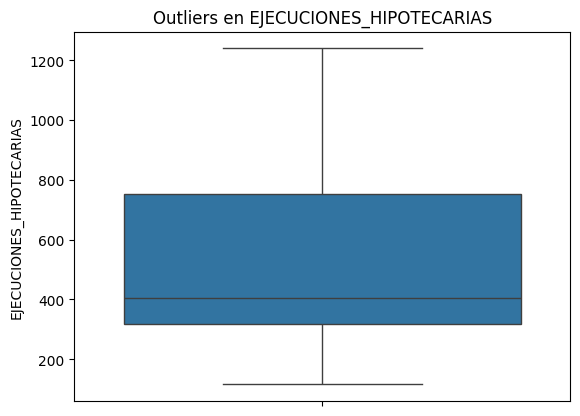

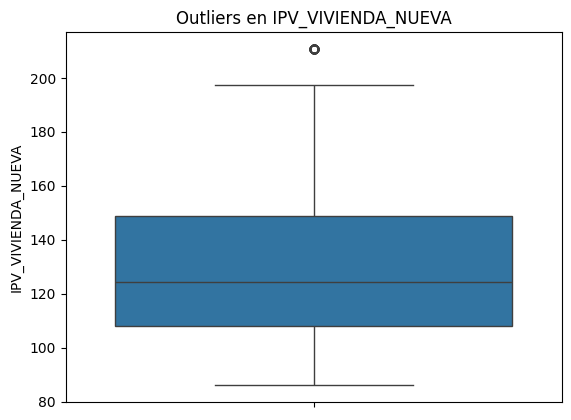

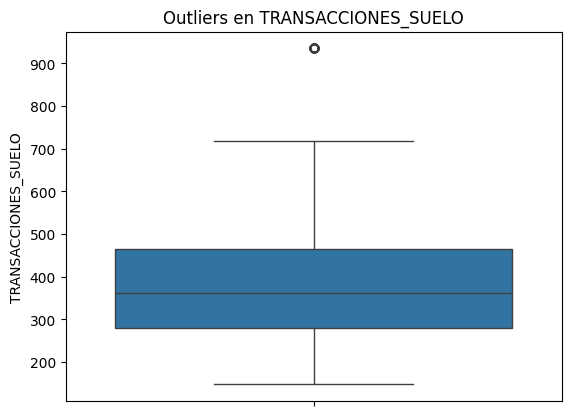

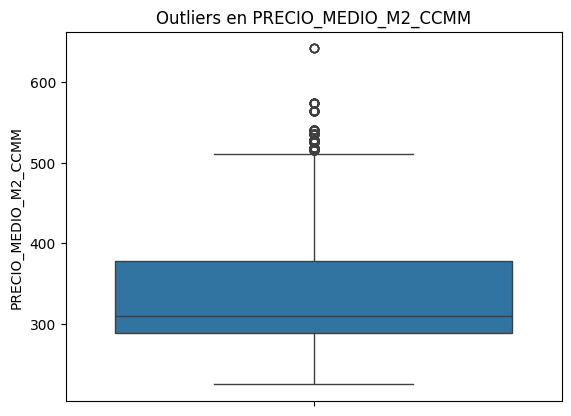

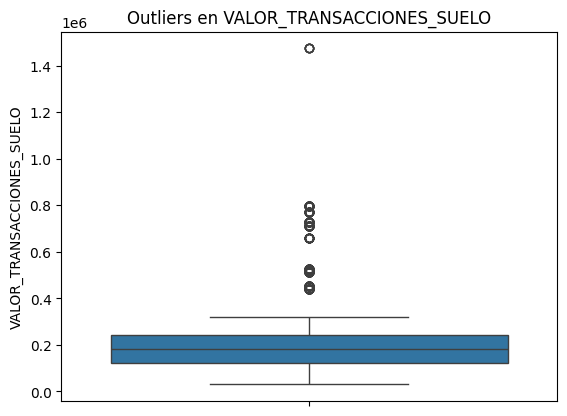

In [33]:
for col in num_cols:
    plt.figure()
    sns.boxplot(data=df_final[col])
    plt.title(f'Outliers en {col}')
    plt.show()


In [34]:

# --- resumen de outliers por columna numérica (regla 1.5*IQR) ---
def outlier_stats_series(s: pd.Series):
    x = pd.to_numeric(s, errors='coerce').dropna()
    n = len(x)
    if n == 0:
        return 0, 0.0, 0.0, np.nan, np.nan, 0
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        return 0, 0.0, 0.0, q1, q3, n
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    count = int(((x < lower) | (x > upper)).sum())
    pct_var = (count / n) * 100
    return count, pct_var, lower, upper, n

total_filas = len(df_final)
rows = []

for col in num_cols:
    c, pct_var, lower, upper, n = outlier_stats_series(df_final[col])
    pct_total = (c / total_filas * 100) if total_filas > 0 else 0.0
    rows.append({
        'variable': col,
        'n_obs_no_nulas': n,
        'outliers': c,
        '%_sobre_variable': round(pct_var, 1),
        '%_sobre_total_filas': round(pct_total, 1)
    })

summary_df = (pd.DataFrame(rows)
              .sort_values(['%_sobre_variable','outliers'], ascending=False)
              .reset_index(drop=True))

# Muestra la tabla bonita en consola
print(summary_df.to_string(index=False))


                 variable  n_obs_no_nulas  outliers  %_sobre_variable  %_sobre_total_filas
VALOR_TRANSACCIONES_SUELO            4357       518              11.9                 11.7
     PRECIO_MEDIO_M2_CCMM            4357       466              10.7                 10.5
               SHAPE_LENG            4418       215               4.9                  4.9
               SHAPE_AREA            4418       215               4.9                  4.9
         POBLACION_ACTIVA            4418       187               4.2                  4.2
                POBLACION            4294       144               3.4                  3.3
          PARO_REGISTRADO            1554        45               2.9                  1.0
  CAPITAL_TOTAL_HIPOTECAS            4398       116               2.6                  2.6
    VIVIENDAS_COMPRAVENTA            4398       113               2.6                  2.6
           ESPERANZA_VIDA            4294       102               2.4                  2.3

### Outliers por distrito

C:\Users\evahr\AppData\Local\Temp\ipykernel_13220\1305264832.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=orden, showfliers=True)


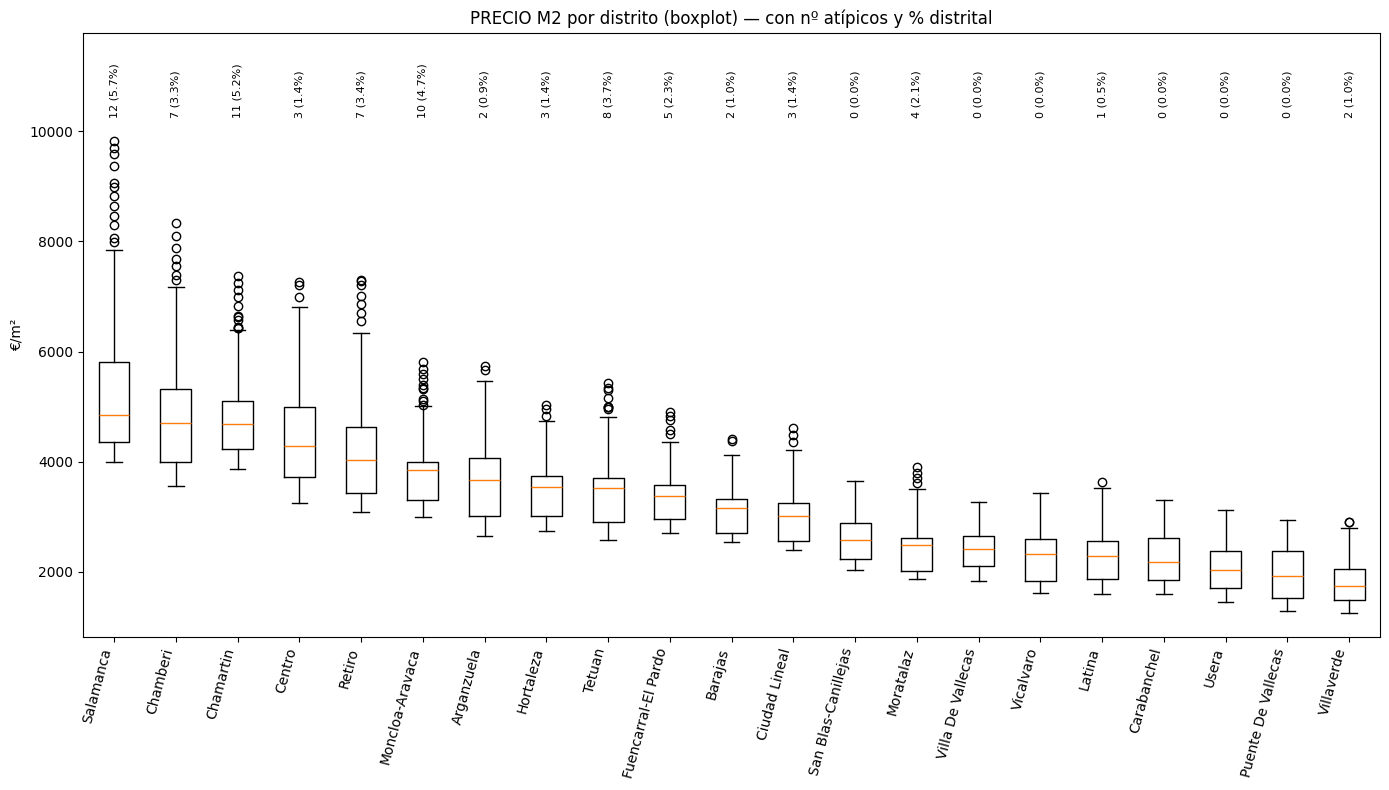

           DISTRITO  N_total  N_atipicos  %_atipicos_sobre_distrito  %_atipicos_sobre_total
          Salamanca      212          12                   5.660377                0.271616
          Chamartin      213          11                   5.164319                0.248981
    Moncloa-Aravaca      215          10                   4.651163                0.226347
             Tetuan      218           8                   3.669725                0.181077
             Retiro      208           7                   3.365385                0.158443
           Chamberi      210           7                   3.333333                0.158443
Fuencarral-El Pardo      215           5                   2.325581                0.113173
          Moratalaz      190           4                   2.105263                0.090539
          Hortaleza      213           3                   1.408451                0.067904
      Ciudad Lineal      216           3                   1.388889             

In [35]:
df = df_final.copy()
col = 'PRECIO M2'

# --- (Opcional) filtra por año concreto ---
# df = df[df['AÑO'] == 2022]

# --- Limpieza numérica robusta para 'PRECIO M2' ---
if df[col].dtype == 'O':
    df[col] = (df[col].astype(str)
               .str.replace('.', '', regex=False)   
               .str.replace(',', '.', regex=False)  
               .str.extract(r'([-+]?\d*\.?\d+)', expand=False)
               .astype(float))

# Limpieza básica
df = df.dropna(subset=[col])
df = df[df[col] > 0]

# --- Orden de distritos por mediana de precio ---
orden = (df.groupby('DISTRITO')[col]
           .median()
           .sort_values(ascending=False)
           .index.tolist())

# --- Cálculo de atípicos por distrito (regla 1.5*IQR) ---
total_global = df[col].notna().sum()

rows = []
for d, g in df.groupby('DISTRITO'):
    x = g[col].dropna()
    n = int(x.shape[0])
    if n == 0:
        out = 0
    else:
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        if iqr == 0:       
            out = 0
        else:
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            out = int(((x < lower) | (x > upper)).sum())
    pct_d = (out / n * 100) if n > 0 else 0.0
    pct_g = (out / total_global * 100) if total_global > 0 else 0.0
    rows.append({
        'DISTRITO': d,
        'N_total': n,
        'N_atipicos': out,
        '%_atipicos_sobre_distrito': pct_d,
        '%_atipicos_sobre_total': pct_g
    })

resumen = (pd.DataFrame(rows)
             .set_index('DISTRITO')
             .loc[orden]               
             .reset_index())

# --- Boxplot ---
data = [df.loc[df['DISTRITO'] == d, col].values for d in orden]
plt.figure(figsize=(14, 8))
plt.boxplot(data, labels=orden, showfliers=True)
plt.title(f'{col} por distrito (boxplot) — con nº atípicos y % distrital')
plt.ylabel('€/m²')
plt.xticks(rotation=75, ha='right')

# --- Anotaciones: "n (pct_d%)" encima de cada caja ---
ax = plt.gca()
ymin, ymax = ax.get_ylim()
for i, d in enumerate(orden, start=1):
    row = resumen.loc[resumen['DISTRITO'] == d].iloc[0]
    ax.text(i, ymax, f"{int(row['N_atipicos'])} ({row['%_atipicos_sobre_distrito']:.1f}%)",
            ha='center', va='bottom', fontsize=8, rotation=90)
ax.set_ylim(ymin, ymax * 1.15)  
plt.tight_layout()
plt.show()

# --- Tabla resumen ordenada por % de atípicos sobre distrito ---
resumen_sorted = resumen.sort_values('%_atipicos_sobre_distrito', ascending=False)
print(resumen_sorted.to_string(index=False))


### Preparar dataset para pasar por pycaret:

In [36]:
# Convierte celdas vacías y variantes de "n.d." en NaN
# Vacíos y "n.d." (con o sin puntos/espacios, mayúsculas/minúsculas)
dataset_final_pycaret = df_final.replace(
    {
        r'^\s*$': np.nan,                 
        r'(?i)^(?:n\.?\s*d\.?)$': np.nan  # "n.d.", "n d", "nd", "N.D.", etc.
    },
    regex=True
)

C:\Users\evahr\AppData\Local\Temp\ipykernel_14240\257074455.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_final_pycaret = df_final.replace(


In [36]:
# Convierte celdas vacías y variantes de "n.d." en NaN
# Vacíos y "n.d." (con o sin puntos/espacios, mayúsculas/minúsculas)
pd.set_option('future.no_silent_downcasting', True)

patrones = {r'^\s*$': np.nan, r'(?i)^(?:n\.?\s*d\.?)$': np.nan}
dataset_final_pycaret = df_final.replace(patrones, regex=True)

# Si quieres tipos “bonitos” (Int64/Float64/string/boolean):
dataset_final_pycaret = dataset_final_pycaret.convert_dtypes()


In [37]:
dataset_final_pycaret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AÑO                        4418 non-null   Int64         
 1   MES_NUM                    4418 non-null   Int64         
 2   AÑO_MES                    4418 non-null   string        
 3   FECHA                      4418 non-null   datetime64[ns]
 4   PRECIO M2                  4418 non-null   Int64         
 5   VARIACIÓN MENSUAL          4380 non-null   Float64       
 6   VARIACIÓN TRIMESTRAL       4350 non-null   Float64       
 7   VARIACIÓN ANUAL            4163 non-null   Float64       
 8   DISTRITO                   4418 non-null   string        
 9   LATITUD                    4418 non-null   string        
 10  LONGITUD                   4418 non-null   Float64       
 11  SHAPE_LENG                 4418 non-null   Float64       
 12  SHAPE_

In [38]:
# Probar solo latitud - convertir a float64
s = dataset_final_pycaret['LATITUD'].astype(str).str.strip()

# Normaliza separadores y limpia basura
#s = (s.str.replace('\u00A0', '', regex=False)  
#       .str.replace('\u202f', '', regex=False)  
#       .str.replace(' ', '', regex=False)
#       .str.replace(',', '.', regex=False)      
#       .str.replace(r'[^\d\.\-]', '', regex=True))  

# Convierte a número
dataset_final_pycaret['LATITUD'] = pd.to_numeric(s, errors='coerce').astype('Float64')



In [39]:
dataset_final_pycaret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AÑO                        4418 non-null   Int64         
 1   MES_NUM                    4418 non-null   Int64         
 2   AÑO_MES                    4418 non-null   string        
 3   FECHA                      4418 non-null   datetime64[ns]
 4   PRECIO M2                  4418 non-null   Int64         
 5   VARIACIÓN MENSUAL          4380 non-null   Float64       
 6   VARIACIÓN TRIMESTRAL       4350 non-null   Float64       
 7   VARIACIÓN ANUAL            4163 non-null   Float64       
 8   DISTRITO                   4418 non-null   string        
 9   LATITUD                    4418 non-null   Float64       
 10  LONGITUD                   4418 non-null   Float64       
 11  SHAPE_LENG                 4418 non-null   Float64       
 12  SHAPE_

In [40]:
from pandas.api.types import is_datetime64_any_dtype

dataset_final_pycaret = dataset_final_pycaret.copy()

# columnas que NO quieres convertir (fechas y categóricas puras)
EXCLUDE = ["FECHA", "AÑO_MES", "DISTRITO"]   

# 1) Intentar pasar a número todo lo que no sea fecha ni excluido
cols_try = [c for c in dataset_final_pycaret.columns
            if c not in EXCLUDE and not is_datetime64_any_dtype(dataset_final_pycaret[c])]
dataset_final_pycaret[cols_try] = dataset_final_pycaret[cols_try].apply(pd.to_numeric, errors="coerce")

# 2) Asegurar float en todas las numéricas
num_cols = dataset_final_pycaret.select_dtypes(include="number").columns
dataset_final_pycaret[num_cols] = dataset_final_pycaret[num_cols].astype("Float64")   

dataset_final_pycaret.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AÑO                        4418 non-null   Float64       
 1   MES_NUM                    4418 non-null   Float64       
 2   AÑO_MES                    4418 non-null   string        
 3   FECHA                      4418 non-null   datetime64[ns]
 4   PRECIO M2                  4418 non-null   Float64       
 5   VARIACIÓN MENSUAL          4380 non-null   Float64       
 6   VARIACIÓN TRIMESTRAL       4350 non-null   Float64       
 7   VARIACIÓN ANUAL            4163 non-null   Float64       
 8   DISTRITO                   4418 non-null   string        
 9   LATITUD                    4418 non-null   Float64       
 10  LONGITUD                   4418 non-null   Float64       
 11  SHAPE_LENG                 4418 non-null   Float64       
 12  SHAPE_

Pares de variables con multicolinealidad fuerte (|r| > 0.8).

1. PRECIO M2 está muy correlacionado con:

PRECIO_VENTA_M2 (0.99)

PRECIO_ALQUILER_M2 (0.89)

PRECIO_M2_DIST (0.89)

RENTA_MEDIA_HOGAR (0.82)

2. RANKING ↔ RENTA_MEDIA_HOGAR (0.96) y ↔ VULNERABILIDAD (-0.97).

3. SHAPE_LENG ↔ SHAPE_AREA (0.96).

4. PRECIO_ALQUILER_M2 ↔ PRECIO_M2_DIST (1.0) Y PRECIO_VENTA_M2 (0.88)

5. INDICE_PRECIO ↔ IPV_VIVIENDA_NUEVA (0.96).

6. TOTAL_HIPOTECAS ↔ CAPITAL_TOTAL_HIPOTECAS (0.89).

7. POBLACION_ACTIVA ↔ IPV_VIVIENDA_NUEVA (0.89).

In [41]:
# Eliminar variables

cols = ["AÑO_MES", "FECHA", "VARIACIÓN MENSUAL", "VARIACIÓN TRIMESTRAL", "RANKING", "VULNERABILIDAD", "PARO_REGISTRADO", "RENTA_MEDIA_HOGAR", "CAPITAL_TOTAL_HIPOTECAS", "VALOR_TRANSACCIONES_SUELO","SHAPE_LENG", "PRECIO_VENTA_M2", "PRECIO_ALQUILER_M2","PRECIO_M2_DIST", "IPV_VIVIENDA_NUEVA","EJECUCIONES_HIPOTECARIAS"]
dataset_final_pycaret = dataset_final_pycaret.drop(columns=cols, errors="ignore")


dataset_final_pycaret.head()

AÑO  MES_NUM  PRECIO M2  VARIACIÓN ANUAL    DISTRITO   LATITUD  \
0  2025.0      6.0     5729.0            0.181  Arganzuela  40.40021   
1  2025.0      5.0     5669.0            0.192  Arganzuela  40.40021   
2  2025.0      4.0     5472.0            0.182  Arganzuela  40.40021   
3  2025.0      3.0     5341.0            0.163  Arganzuela  40.40021   
4  2025.0      2.0     5310.0            0.162  Arganzuela  40.40021   

   LONGITUD     SHAPE_AREA  EURIBOR  TRANSACCIONES_CM  INDICE_PRECIO  \
0  -3.69618  6462175.91405  0.02081            6944.0           <NA>   
1  -3.69618  6462175.91405   0.0208            7020.0           <NA>   
2  -3.69618  6462175.91405  0.02143            6604.0           <NA>   
3  -3.69618  6462175.91405  0.02398            7380.0         188.43   
4  -3.69618  6462175.91405  0.02402            6963.0         188.43   

   TOTAL_HIPOTECAS  POBLACION_ACTIVA  POBLACION  ESPERANZA_VIDA  \
0             <NA>            3881.9       <NA>            <NA>   
1           7598.0            3881.9       <NA>            <NA>   
2           8425.0            3881.9       <NA>            <NA>   
3           7973.0            3868.2       <NA>            <NA>   
4           6701.0            3868.2       <NA>            <NA>   

   VIVIENDAS_COMPRAVENTA  TRANSACCIONES_SUELO  PRECIO_MEDIO_M2_CCMM  
0                   <NA>                 <NA>                  <NA>  
1                 1559.0                 <NA>                  <NA>  
2                 1499.0                 <NA>                  <NA>  
3                 1843.0                436.0                306.36  
4                 1786.0                436.0                306.36

In [42]:
# Análisis valores nulos por variable

def resumen_nulos(df: pd.DataFrame) -> pd.DataFrame:
    total = len(df)
    nulos = df.isna().sum()
    pct = (nulos / total * 100).round(2)
    resumen = (
        pd.DataFrame({"n_nulos": nulos, "%_nulos": pct})
        .sort_values("%_nulos", ascending=False)
        .reset_index()
        .rename(columns={"index": "columna"})
    )
    return resumen

# Uso:
res = resumen_nulos(dataset_final_pycaret)
print(f"Filas totales: {len(dataset_final_pycaret):,}".replace(",", "."))
res

Filas totales: 4.418


columna  n_nulos  %_nulos
0         VARIACIÓN ANUAL      255     5.77
1               POBLACION      124     2.81
2          ESPERANZA_VIDA      124     2.81
3    PRECIO_MEDIO_M2_CCMM       61     1.38
4           INDICE_PRECIO       61     1.38
5     TRANSACCIONES_SUELO       61     1.38
6         TOTAL_HIPOTECAS       20     0.45
7   VIVIENDAS_COMPRAVENTA       20     0.45
8                 MES_NUM        0     0.00
9                     AÑO        0     0.00
10       TRANSACCIONES_CM        0     0.00
11                EURIBOR        0     0.00
12             SHAPE_AREA        0     0.00
13               LONGITUD        0     0.00
14                LATITUD        0     0.00
15               DISTRITO        0     0.00
16              PRECIO M2        0     0.00
17       POBLACION_ACTIVA        0     0.00

In [43]:
cat_cols1 = dataset_final_pycaret.select_dtypes(include='object').columns
num_cols1 = dataset_final_pycaret.select_dtypes(include=['int64', 'float64']).columns
datetime_cols1 = dataset_final_pycaret.select_dtypes(include=['datetime64[ns]']).columns

print("Categóricas:", cat_cols.tolist())
print("Numéricas:", num_cols.tolist())
print("Datetime:", datetime_cols.tolist())

Categóricas: ['AÑO_MES', 'VARIACIÓN MENSUAL', 'VARIACIÓN TRIMESTRAL', 'VARIACIÓN ANUAL', 'DISTRITO', 'LATITUD']
Numéricas: ['AÑO', 'MES_NUM', 'PRECIO M2', 'VARIACIÓN MENSUAL', 'VARIACIÓN TRIMESTRAL', 'VARIACIÓN ANUAL', 'LATITUD', 'LONGITUD', 'SHAPE_LENG', 'SHAPE_AREA', 'RANKING', 'VULNERABILIDAD', 'PRECIO_M2_DIST', 'EURIBOR', 'TRANSACCIONES_CM', 'INDICE_PRECIO', 'TOTAL_HIPOTECAS', 'CAPITAL_TOTAL_HIPOTECAS', 'POBLACION_ACTIVA', 'RENTA_MEDIA_HOGAR', 'POBLACION', 'ESPERANZA_VIDA', 'PARO_REGISTRADO', 'PRECIO_ALQUILER_M2', 'PRECIO_VENTA_M2', 'VIVIENDAS_COMPRAVENTA', 'EJECUCIONES_HIPOTECARIAS', 'IPV_VIVIENDA_NUEVA', 'TRANSACCIONES_SUELO', 'PRECIO_MEDIO_M2_CCMM', 'VALOR_TRANSACCIONES_SUELO']
Datetime: ['FECHA']


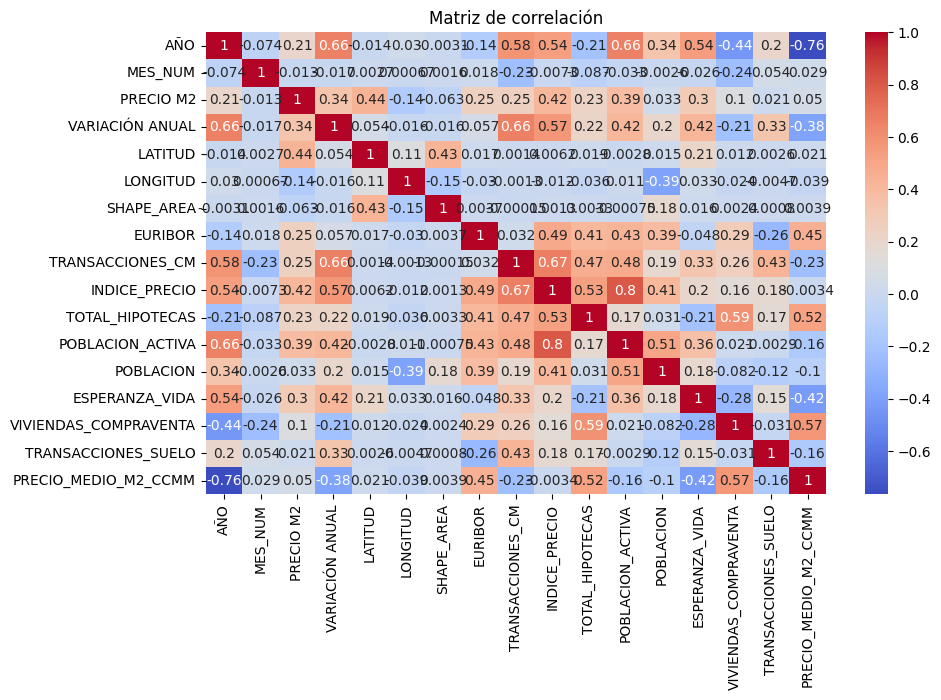

In [44]:
# Matriz de correlación con menos variables
plt.figure(figsize=(10, 6))
sns.heatmap(dataset_final_pycaret[num_cols1].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

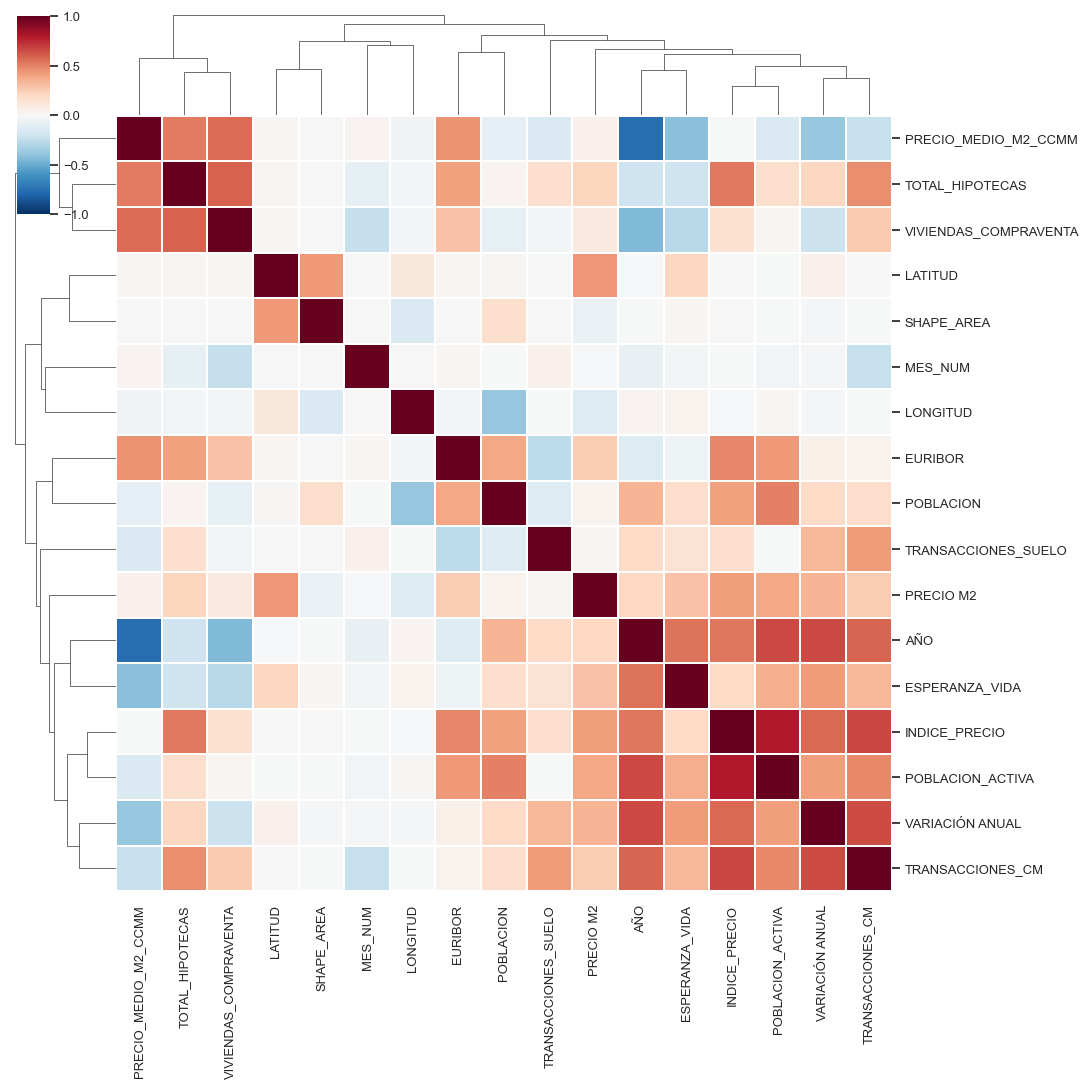

In [45]:
# 1) Nos quedamos solo con numéricas y quitamos constantes
num_df = dataset_final_pycaret.select_dtypes(include="number").copy()
const_cols = num_df.columns[num_df.nunique(dropna=True) <= 1]
num_df = num_df.drop(columns=const_cols)

# 2) Correlación 
corr = num_df.corr(method='pearson') 
# evitar NaNs en el clustermap
np.fill_diagonal(corr.values, 1.0)
corr = corr.fillna(0)

# 3) Clustermap
sns.set(font_scale=0.85)
g = sns.clustermap(
    corr, cmap="RdBu_r", vmin=-1, vmax=1, center=0,
    linewidths=.2, dendrogram_ratio=.12,
    cbar_pos=(.02, .8, .03, .18), figsize=(11, 11)
)

# (opcional) girar etiquetas para legibilidad
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=90)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()


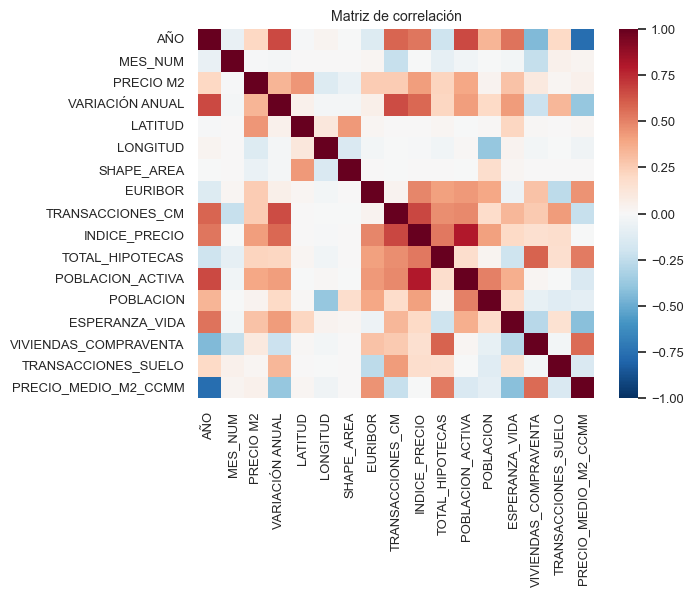

In [46]:
num = (dataset_final_pycaret
       .select_dtypes(include="number")
       .drop(columns=["DISTRITO"], errors="ignore"))

corr = num.corr()
sns.heatmap(corr, cmap="RdBu_r", vmin=-1, vmax=1, center=0)
plt.title("Matriz de correlación")
plt.show()


In [47]:
dataset_final_pycaret.head()

AÑO  MES_NUM  PRECIO M2  VARIACIÓN ANUAL    DISTRITO   LATITUD  \
0  2025.0      6.0     5729.0            0.181  Arganzuela  40.40021   
1  2025.0      5.0     5669.0            0.192  Arganzuela  40.40021   
2  2025.0      4.0     5472.0            0.182  Arganzuela  40.40021   
3  2025.0      3.0     5341.0            0.163  Arganzuela  40.40021   
4  2025.0      2.0     5310.0            0.162  Arganzuela  40.40021   

   LONGITUD     SHAPE_AREA  EURIBOR  TRANSACCIONES_CM  INDICE_PRECIO  \
0  -3.69618  6462175.91405  0.02081            6944.0           <NA>   
1  -3.69618  6462175.91405   0.0208            7020.0           <NA>   
2  -3.69618  6462175.91405  0.02143            6604.0           <NA>   
3  -3.69618  6462175.91405  0.02398            7380.0         188.43   
4  -3.69618  6462175.91405  0.02402            6963.0         188.43   

   TOTAL_HIPOTECAS  POBLACION_ACTIVA  POBLACION  ESPERANZA_VIDA  \
0             <NA>            3881.9       <NA>            <NA>   
1           7598.0            3881.9       <NA>            <NA>   
2           8425.0            3881.9       <NA>            <NA>   
3           7973.0            3868.2       <NA>            <NA>   
4           6701.0            3868.2       <NA>            <NA>   

   VIVIENDAS_COMPRAVENTA  TRANSACCIONES_SUELO  PRECIO_MEDIO_M2_CCMM  
0                   <NA>                 <NA>                  <NA>  
1                 1559.0                 <NA>                  <NA>  
2                 1499.0                 <NA>                  <NA>  
3                 1843.0                436.0                306.36  
4                 1786.0                436.0                306.36

In [48]:
print("Numéricas:", len(dataset_final_pycaret.select_dtypes(include='number').columns))
print("Categóricas:", len(dataset_final_pycaret.select_dtypes(include='object').columns))


Numéricas: 17
Categóricas: 0


In [49]:
# Lista de columnas en el orden que quieras
cols = list(dataset_final_pycaret.columns)

# Sacar las columnas que quieres reubicar
cols.remove("VARIACIÓN ANUAL")
cols.remove("PRECIO M2")

# Insertar primero VARIACIÓN ANUAL
euribor_index = cols.index("TRANSACCIONES_CM")
cols.insert(euribor_index, "VARIACIÓN ANUAL")

# Insertar después PRECIO M2
cols.insert(euribor_index + 1, "PRECIO M2")

# Reordenar el DataFrame
dataset_final_pycaret = dataset_final_pycaret[cols]

dataset_final_pycaret.head()



AÑO  MES_NUM    DISTRITO   LATITUD  LONGITUD     SHAPE_AREA  EURIBOR  \
0  2025.0      6.0  Arganzuela  40.40021  -3.69618  6462175.91405  0.02081   
1  2025.0      5.0  Arganzuela  40.40021  -3.69618  6462175.91405   0.0208   
2  2025.0      4.0  Arganzuela  40.40021  -3.69618  6462175.91405  0.02143   
3  2025.0      3.0  Arganzuela  40.40021  -3.69618  6462175.91405  0.02398   
4  2025.0      2.0  Arganzuela  40.40021  -3.69618  6462175.91405  0.02402   

   VARIACIÓN ANUAL  PRECIO M2  TRANSACCIONES_CM  INDICE_PRECIO  \
0            0.181     5729.0            6944.0           <NA>   
1            0.192     5669.0            7020.0           <NA>   
2            0.182     5472.0            6604.0           <NA>   
3            0.163     5341.0            7380.0         188.43   
4            0.162     5310.0            6963.0         188.43   

   TOTAL_HIPOTECAS  POBLACION_ACTIVA  POBLACION  ESPERANZA_VIDA  \
0             <NA>            3881.9       <NA>            <NA>   
1           7598.0            3881.9       <NA>            <NA>   
2           8425.0            3881.9       <NA>            <NA>   
3           7973.0            3868.2       <NA>            <NA>   
4           6701.0            3868.2       <NA>            <NA>   

   VIVIENDAS_COMPRAVENTA  TRANSACCIONES_SUELO  PRECIO_MEDIO_M2_CCMM  
0                   <NA>                 <NA>                  <NA>  
1                 1559.0                 <NA>                  <NA>  
2                 1499.0                 <NA>                  <NA>  
3                 1843.0                436.0                306.36  
4                 1786.0                436.0                306.36

### Creación lag

In [50]:
# Crear lag (-12) para variables a partir de EURIBOR en adelante


df_lag_pycaret = dataset_final_pycaret.copy()

# ordenar por distrito y tiempo
df_lag_pycaret['AÑO'] = df_lag_pycaret['AÑO'].astype(int)
df_lag_pycaret['MES_NUM'] = df_lag_pycaret['MES_NUM'].astype(int)
df_lag_pycaret['FECHA'] = pd.to_datetime(df_lag_pycaret['AÑO'].astype(str) + '-' + df_lag_pycaret['MES_NUM'].astype(str) + '-01')
df_lag_pycaret = df_lag_pycaret.sort_values(['DISTRITO', 'FECHA'])

# columnas desde 'EURIBOR' hasta el final del DataFrame
start_idx = df_lag_pycaret.columns.get_loc('EURIBOR')
cols_desde_euribor = df_lag_pycaret.columns[start_idx:]

# nos quedamos solo con las numéricas dentro de ese tramo para laggear
cols_lag = [c for c in cols_desde_euribor if pd.api.types.is_numeric_dtype(df_lag_pycaret[c])]

# crear lag 12 por DISTRITO
for c in cols_lag:
    df_lag_pycaret[f'{c}_lag12'] = df_lag_pycaret.groupby('DISTRITO')[c].shift(12)

# eliminar columna temporal de fecha
df_lag_pycaret = df_lag_pycaret.drop(columns=['FECHA'])

# df_lag = df_lag.drop(columns='FECHA')  # opcional
df_lag_pycaret.head()


AÑO  MES_NUM    DISTRITO   LATITUD  LONGITUD     SHAPE_AREA  EURIBOR  \
211  2007       11  Arganzuela  40.40021  -3.69618  6462175.91405  0.04607   
210  2007       12  Arganzuela  40.40021  -3.69618  6462175.91405  0.04793   
209  2008        1  Arganzuela  40.40021  -3.69618  6462175.91405  0.04498   
208  2008        2  Arganzuela  40.40021  -3.69618  6462175.91405  0.04349   
207  2008        3  Arganzuela  40.40021  -3.69618  6462175.91405   0.0459   

     VARIACIÓN ANUAL  PRECIO M2  TRANSACCIONES_CM  ...  PRECIO M2_lag12  \
211             <NA>     4000.0            6058.0  ...             <NA>   
210             <NA>     4000.0            4577.0  ...             <NA>   
209             <NA>     4000.0            6123.0  ...             <NA>   
208             <NA>     3824.0            5964.0  ...             <NA>   
207             <NA>     4000.0            5525.0  ...             <NA>   

     TRANSACCIONES_CM_lag12  INDICE_PRECIO_lag12  TOTAL_HIPOTECAS_lag12  \
211                    <NA>                 <NA>                   <NA>   
210                    <NA>                 <NA>                   <NA>   
209                    <NA>                 <NA>                   <NA>   
208                    <NA>                 <NA>                   <NA>   
207                    <NA>                 <NA>                   <NA>   

     POBLACION_ACTIVA_lag12  POBLACION_lag12  ESPERANZA_VIDA_lag12  \
211                    <NA>             <NA>                  <NA>   
210                    <NA>             <NA>                  <NA>   
209                    <NA>             <NA>                  <NA>   
208                    <NA>             <NA>                  <NA>   
207                    <NA>             <NA>                  <NA>   

     VIVIENDAS_COMPRAVENTA_lag12  TRANSACCIONES_SUELO_lag12  \
211                         <NA>                       <NA>   
210                         <NA>                       <NA>   
209                         <NA>                       <NA>   
208                         <NA>                       <NA>   
207                         <NA>                       <NA>   

     PRECIO_MEDIO_M2_CCMM_lag12  
211                        <NA>  
210                        <NA>  
209                        <NA>  
208                        <NA>  
207                        <NA>  

[5 rows x 30 columns]

In [51]:
# Eliminar columnas que no son de lag 
# Lista de columnas originales que quieres eliminar
cols_drop = [
    'EURIBOR',
    'VARIACIÓN ANUAL',   
    'TRANSACCIONES_CM',
    'INDICE_PRECIO',
    'TOTAL_HIPOTECAS',
    'POBLACION_ACTIVA',
    'POBLACION',
    'ESPERANZA_VIDA',
    'VIVIENDAS_COMPRAVENTA',
    'TRANSACCIONES_SUELO',
    'PRECIO_MEDIO_M2_CCMM'
]

# Eliminarlas si existen en df_lag
df_lag_pycaret = df_lag_pycaret.drop(columns=[c for c in cols_drop if c in df_lag_pycaret.columns])

df_lag_pycaret.head()


AÑO  MES_NUM    DISTRITO   LATITUD  LONGITUD     SHAPE_AREA  PRECIO M2  \
211  2007       11  Arganzuela  40.40021  -3.69618  6462175.91405     4000.0   
210  2007       12  Arganzuela  40.40021  -3.69618  6462175.91405     4000.0   
209  2008        1  Arganzuela  40.40021  -3.69618  6462175.91405     4000.0   
208  2008        2  Arganzuela  40.40021  -3.69618  6462175.91405     3824.0   
207  2008        3  Arganzuela  40.40021  -3.69618  6462175.91405     4000.0   

     EURIBOR_lag12  VARIACIÓN ANUAL_lag12  PRECIO M2_lag12  \
211           <NA>                   <NA>             <NA>   
210           <NA>                   <NA>             <NA>   
209           <NA>                   <NA>             <NA>   
208           <NA>                   <NA>             <NA>   
207           <NA>                   <NA>             <NA>   

     TRANSACCIONES_CM_lag12  INDICE_PRECIO_lag12  TOTAL_HIPOTECAS_lag12  \
211                    <NA>                 <NA>                   <NA>   
210                    <NA>                 <NA>                   <NA>   
209                    <NA>                 <NA>                   <NA>   
208                    <NA>                 <NA>                   <NA>   
207                    <NA>                 <NA>                   <NA>   

     POBLACION_ACTIVA_lag12  POBLACION_lag12  ESPERANZA_VIDA_lag12  \
211                    <NA>             <NA>                  <NA>   
210                    <NA>             <NA>                  <NA>   
209                    <NA>             <NA>                  <NA>   
208                    <NA>             <NA>                  <NA>   
207                    <NA>             <NA>                  <NA>   

     VIVIENDAS_COMPRAVENTA_lag12  TRANSACCIONES_SUELO_lag12  \
211                         <NA>                       <NA>   
210                         <NA>                       <NA>   
209                         <NA>                       <NA>   
208                         <NA>                       <NA>   
207                         <NA>                       <NA>   

     PRECIO_MEDIO_M2_CCMM_lag12  
211                        <NA>  
210                        <NA>  
209                        <NA>  
208                        <NA>  
207                        <NA>

In [52]:
print("Numéricas:", len(df_lag_pycaret.select_dtypes(include='number').columns))
print("Categóricas:", len(df_lag_pycaret.select_dtypes(include='object').columns))



Numéricas: 18
Categóricas: 0


In [53]:
from pandas.api.types import is_datetime64_any_dtype

df_lag_pycaret = df_lag_pycaret.copy()

# columnas que NO quieres convertir (fechas y categóricas puras)
EXCLUDE = ["DISTRITO"]   

# 1) Intentar pasar a número todo lo que no sea fecha ni excluido
cols_try = [c for c in df_lag_pycaret.columns
            if c not in EXCLUDE and not is_datetime64_any_dtype(df_lag_pycaret[c])]
df_lag_pycaret[cols_try] = df_lag_pycaret[cols_try].apply(pd.to_numeric, errors="coerce")

# 2) Asegurar float en todas las numéricas
num_cols = df_lag_pycaret.select_dtypes(include="number").columns
df_lag_pycaret[num_cols] = df_lag_pycaret[num_cols].astype("Float64")   

df_lag_pycaret.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4418 entries, 211 to 4210
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          4418 non-null   Float64
 1   MES_NUM                      4418 non-null   Float64
 2   DISTRITO                     4418 non-null   string 
 3   LATITUD                      4418 non-null   Float64
 4   LONGITUD                     4418 non-null   Float64
 5   SHAPE_AREA                   4418 non-null   Float64
 6   PRECIO M2                    4418 non-null   Float64
 7   EURIBOR_lag12                4166 non-null   Float64
 8   VARIACIÓN ANUAL_lag12        3911 non-null   Float64
 9   PRECIO M2_lag12              4166 non-null   Float64
 10  TRANSACCIONES_CM_lag12       4166 non-null   Float64
 11  INDICE_PRECIO_lag12          4166 non-null   Float64
 12  TOTAL_HIPOTECAS_lag12        4166 non-null   Float64
 13  POBLACION_ACTIVA_lag1

In [54]:
# Dataset sin Lag
dataset_final_pycaret.to_excel(r"C:\Users\evahr\Downloads\TFM-idealista\dataset_final_pycaret.xlsx", index=False)

In [53]:
# Dataset con Lag
df_lag_pycaret.to_excel(r"C:\Users\evahr\Downloads\TFM-idealista\df_lag_pycaret.xlsx", index=False)

# Preprocesado

In [55]:
# Convierte celdas vacías y variantes de "n.d." en NaN
# Vacíos y "n.d." (con o sin puntos/espacios, mayúsculas/minúsculas)
pd.set_option('future.no_silent_downcasting', True)

patrones = {r'^\s*$': np.nan, r'(?i)^(?:n\.?\s*d\.?)$': np.nan}
dataset_entrenamiento = df_final.replace(patrones, regex=True)

# Si quieres tipos “bonitos” (Int64/Float64/string/boolean):
dataset_entrenamiento = dataset_entrenamiento.convert_dtypes()

In [56]:
dataset_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AÑO                        4418 non-null   Int64         
 1   MES_NUM                    4418 non-null   Int64         
 2   AÑO_MES                    4418 non-null   string        
 3   FECHA                      4418 non-null   datetime64[ns]
 4   PRECIO M2                  4418 non-null   Int64         
 5   VARIACIÓN MENSUAL          4380 non-null   Float64       
 6   VARIACIÓN TRIMESTRAL       4350 non-null   Float64       
 7   VARIACIÓN ANUAL            4163 non-null   Float64       
 8   DISTRITO                   4418 non-null   string        
 9   LATITUD                    4418 non-null   string        
 10  LONGITUD                   4418 non-null   Float64       
 11  SHAPE_LENG                 4418 non-null   Float64       
 12  SHAPE_

In [57]:
## Latitud a Float
s = dataset_entrenamiento['LATITUD'].astype(str).str.strip()

# Normaliza separadores y limpia basura
#s = (s.str.replace('\u00A0', '', regex=False)   # espacio no separable
#       .str.replace('\u202f', '', regex=False)  # espacio fino
#       .str.replace(' ', '', regex=False)
#       .str.replace(',', '.', regex=False)      # coma decimal → punto
#       .str.replace(r'[^\d\.\-]', '', regex=True))  # deja solo dígitos/.-

# Convierte a número
dataset_entrenamiento['LATITUD'] = pd.to_numeric(s, errors='coerce').astype('Float64')
dataset_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AÑO                        4418 non-null   Int64         
 1   MES_NUM                    4418 non-null   Int64         
 2   AÑO_MES                    4418 non-null   string        
 3   FECHA                      4418 non-null   datetime64[ns]
 4   PRECIO M2                  4418 non-null   Int64         
 5   VARIACIÓN MENSUAL          4380 non-null   Float64       
 6   VARIACIÓN TRIMESTRAL       4350 non-null   Float64       
 7   VARIACIÓN ANUAL            4163 non-null   Float64       
 8   DISTRITO                   4418 non-null   string        
 9   LATITUD                    4418 non-null   Float64       
 10  LONGITUD                   4418 non-null   Float64       
 11  SHAPE_LENG                 4418 non-null   Float64       
 12  SHAPE_

In [58]:
from pandas.api.types import is_datetime64_any_dtype

dataset_entrenamiento = dataset_entrenamiento.copy()

# columnas que NO quieres convertir (fechas y categóricas puras)
EXCLUDE = ["FECHA", "AÑO_MES", "DISTRITO"]   

# 1) Intentar pasar a número todo lo que no sea fecha ni excluido
cols_try = [c for c in dataset_entrenamiento.columns
            if c not in EXCLUDE and not is_datetime64_any_dtype(dataset_entrenamiento[c])]
dataset_entrenamiento[cols_try] = dataset_entrenamiento[cols_try].apply(pd.to_numeric, errors="coerce")

# 2) Asegurar float en todas las numéricas
num_cols = dataset_entrenamiento.select_dtypes(include="number").columns
dataset_entrenamiento[num_cols] = dataset_entrenamiento[num_cols].astype("Float64")   

dataset_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AÑO                        4418 non-null   Float64       
 1   MES_NUM                    4418 non-null   Float64       
 2   AÑO_MES                    4418 non-null   string        
 3   FECHA                      4418 non-null   datetime64[ns]
 4   PRECIO M2                  4418 non-null   Float64       
 5   VARIACIÓN MENSUAL          4380 non-null   Float64       
 6   VARIACIÓN TRIMESTRAL       4350 non-null   Float64       
 7   VARIACIÓN ANUAL            4163 non-null   Float64       
 8   DISTRITO                   4418 non-null   string        
 9   LATITUD                    4418 non-null   Float64       
 10  LONGITUD                   4418 non-null   Float64       
 11  SHAPE_LENG                 4418 non-null   Float64       
 12  SHAPE_

In [59]:
# Eliminar variables

cols = ["AÑO_MES", "FECHA", "VARIACIÓN MENSUAL", "VARIACIÓN TRIMESTRAL", "RANKING", "VULNERABILIDAD", "PARO_REGISTRADO", "RENTA_MEDIA_HOGAR", "CAPITAL_TOTAL_HIPOTECAS", "VALOR_TRANSACCIONES_SUELO","SHAPE_LENG", "PRECIO_VENTA_M2", "PRECIO_ALQUILER_M2","PRECIO_M2_DIST", "IPV_VIVIENDA_NUEVA","EJECUCIONES_HIPOTECARIAS"]
dataset_entrenamiento = dataset_entrenamiento.drop(columns=cols, errors="ignore")

dataset_entrenamiento.head()

AÑO  MES_NUM  PRECIO M2  VARIACIÓN ANUAL    DISTRITO   LATITUD  \
0  2025.0      6.0     5729.0            0.181  Arganzuela  40.40021   
1  2025.0      5.0     5669.0            0.192  Arganzuela  40.40021   
2  2025.0      4.0     5472.0            0.182  Arganzuela  40.40021   
3  2025.0      3.0     5341.0            0.163  Arganzuela  40.40021   
4  2025.0      2.0     5310.0            0.162  Arganzuela  40.40021   

   LONGITUD     SHAPE_AREA  EURIBOR  TRANSACCIONES_CM  INDICE_PRECIO  \
0  -3.69618  6462175.91405  0.02081            6944.0           <NA>   
1  -3.69618  6462175.91405   0.0208            7020.0           <NA>   
2  -3.69618  6462175.91405  0.02143            6604.0           <NA>   
3  -3.69618  6462175.91405  0.02398            7380.0         188.43   
4  -3.69618  6462175.91405  0.02402            6963.0         188.43   

   TOTAL_HIPOTECAS  POBLACION_ACTIVA  POBLACION  ESPERANZA_VIDA  \
0             <NA>            3881.9       <NA>            <NA>   
1           7598.0            3881.9       <NA>            <NA>   
2           8425.0            3881.9       <NA>            <NA>   
3           7973.0            3868.2       <NA>            <NA>   
4           6701.0            3868.2       <NA>            <NA>   

   VIVIENDAS_COMPRAVENTA  TRANSACCIONES_SUELO  PRECIO_MEDIO_M2_CCMM  
0                   <NA>                 <NA>                  <NA>  
1                 1559.0                 <NA>                  <NA>  
2                 1499.0                 <NA>                  <NA>  
3                 1843.0                436.0                306.36  
4                 1786.0                436.0                306.36

In [60]:
print("Numéricas:", len(dataset_entrenamiento.select_dtypes(include='number').columns))
print("Categóricas:", len(dataset_entrenamiento.select_dtypes(include='object').columns))


Numéricas: 17
Categóricas: 0


In [61]:
# Análisis valores nulos por variable

def resumen_nulos(df: pd.DataFrame) -> pd.DataFrame:
    total = len(df)
    nulos = df.isna().sum()
    pct = (nulos / total * 100).round(2)
    resumen = (
        pd.DataFrame({"n_nulos": nulos, "%_nulos": pct})
        .sort_values("%_nulos", ascending=False)
        .reset_index()
        .rename(columns={"index": "columna"})
    )
    return resumen

# Uso:
res = resumen_nulos(dataset_entrenamiento)
print(f"Filas totales: {len(dataset_entrenamiento):,}".replace(",", "."))
res

Filas totales: 4.418


columna  n_nulos  %_nulos
0         VARIACIÓN ANUAL      255     5.77
1               POBLACION      124     2.81
2          ESPERANZA_VIDA      124     2.81
3    PRECIO_MEDIO_M2_CCMM       61     1.38
4           INDICE_PRECIO       61     1.38
5     TRANSACCIONES_SUELO       61     1.38
6         TOTAL_HIPOTECAS       20     0.45
7   VIVIENDAS_COMPRAVENTA       20     0.45
8                 MES_NUM        0     0.00
9                     AÑO        0     0.00
10       TRANSACCIONES_CM        0     0.00
11                EURIBOR        0     0.00
12             SHAPE_AREA        0     0.00
13               LONGITUD        0     0.00
14                LATITUD        0     0.00
15               DISTRITO        0     0.00
16              PRECIO M2        0     0.00
17       POBLACION_ACTIVA        0     0.00

In [61]:
# Dataset antes de imputar por mediana
dataset_entrenamiento.to_excel(r"C:\Users\evahr\Downloads\TFM-idealista\df_previo_imputacion.xlsx", index=False)

Se imputa por valores únicos porque:

- Algunos de los datos originales eran anuales, no mensuales.

- Repetirlos a nivel mensual fue solo un paso de integración, no un dato real.

- Así que imputar sobre filas repetidas es “dar demasiado peso” a datos inventados.

In [62]:
# Imputar por mediana usando valores únicos para evitar sesgo por duplicados

dataset_entrenamiento = dataset_entrenamiento.copy()
num_cols = dataset_entrenamiento.select_dtypes(include="number").columns

for col in num_cols:
    # mediana por distrito calculada sobre valores únicos de esa variable
    mediana_unicos = (
        dataset_entrenamiento.groupby("DISTRITO")[col]
          .apply(lambda s: s.drop_duplicates().median())
    )
    # imputar sin eliminar filas en el df original
    dataset_entrenamiento[col] = dataset_entrenamiento[col].fillna(df["DISTRITO"].map(mediana_unicos))

In [63]:
# Análisis valores nulos por variable

def resumen_nulos(df: pd.DataFrame) -> pd.DataFrame:
    total = len(df)
    nulos = df.isna().sum()
    pct = (nulos / total * 100).round(2)
    resumen = (
        pd.DataFrame({"n_nulos": nulos, "%_nulos": pct})
        .sort_values("%_nulos", ascending=False)
        .reset_index()
        .rename(columns={"index": "columna"})
    )
    return resumen

# Uso:
res = resumen_nulos(dataset_entrenamiento)
print(f"Filas totales: {len(dataset_entrenamiento):,}".replace(",", "."))
res

Filas totales: 4.418


columna  n_nulos  %_nulos
0                     AÑO        0      0.0
1                 MES_NUM        0      0.0
2               PRECIO M2        0      0.0
3         VARIACIÓN ANUAL        0      0.0
4                DISTRITO        0      0.0
5                 LATITUD        0      0.0
6                LONGITUD        0      0.0
7              SHAPE_AREA        0      0.0
8                 EURIBOR        0      0.0
9        TRANSACCIONES_CM        0      0.0
10          INDICE_PRECIO        0      0.0
11        TOTAL_HIPOTECAS        0      0.0
12       POBLACION_ACTIVA        0      0.0
13              POBLACION        0      0.0
14         ESPERANZA_VIDA        0      0.0
15  VIVIENDAS_COMPRAVENTA        0      0.0
16    TRANSACCIONES_SUELO        0      0.0
17   PRECIO_MEDIO_M2_CCMM        0      0.0

In [64]:
dataset_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AÑO                    4418 non-null   Float64
 1   MES_NUM                4418 non-null   Float64
 2   PRECIO M2              4418 non-null   Float64
 3   VARIACIÓN ANUAL        4418 non-null   Float64
 4   DISTRITO               4418 non-null   string 
 5   LATITUD                4418 non-null   Float64
 6   LONGITUD               4418 non-null   Float64
 7   SHAPE_AREA             4418 non-null   Float64
 8   EURIBOR                4418 non-null   Float64
 9   TRANSACCIONES_CM       4418 non-null   Float64
 10  INDICE_PRECIO          4418 non-null   Float64
 11  TOTAL_HIPOTECAS        4418 non-null   Float64
 12  POBLACION_ACTIVA       4418 non-null   Float64
 13  POBLACION              4418 non-null   Float64
 14  ESPERANZA_VIDA         4418 non-null   Float64
 15  VIVI

## Winsorizar valores atípicos

In [65]:
# columnas numéricas que quieres usar
desired_cols = [
    'PRECIO M2', 'VARIACIÓN ANUAL', 'LATITUD', 'LONGITUD', 'SHAPE_AREA',
    'EURIBOR', 'TRANSACCIONES_CM', 'INDICE_PRECIO', 'TOTAL_HIPOTECAS',
    'POBLACION_ACTIVA', 'POBLACION', 'ESPERANZA_VIDA',
    'VIVIENDAS_COMPRAVENTA', 'TRANSACCIONES_SUELO', 'PRECIO_MEDIO_M2_CCMM'
]

# deja solo las que existen en el DataFrame (manteniendo el orden)
num_cols3 = [c for c in desired_cols if c in dataset_entrenamiento.columns]

print("num_cols3:", num_cols3)

num_cols3: ['PRECIO M2', 'VARIACIÓN ANUAL', 'LATITUD', 'LONGITUD', 'SHAPE_AREA', 'EURIBOR', 'TRANSACCIONES_CM', 'INDICE_PRECIO', 'TOTAL_HIPOTECAS', 'POBLACION_ACTIVA', 'POBLACION', 'ESPERANZA_VIDA', 'VIVIENDAS_COMPRAVENTA', 'TRANSACCIONES_SUELO', 'PRECIO_MEDIO_M2_CCMM']


In [66]:
cat_cols3 = dataset_entrenamiento.select_dtypes(include='object').columns
#num_cols3 = dataset_entrenamiento.select_dtypes(include=['int64', 'float64']).columns
datetime_cols3 = dataset_entrenamiento.select_dtypes(include=['datetime64[ns]']).columns

print("Categóricas:", cat_cols3.tolist())
#print("Numéricas:", num_cols3.tolist())
print("Datetime:", datetime_cols3.tolist())

Categóricas: []
Datetime: []


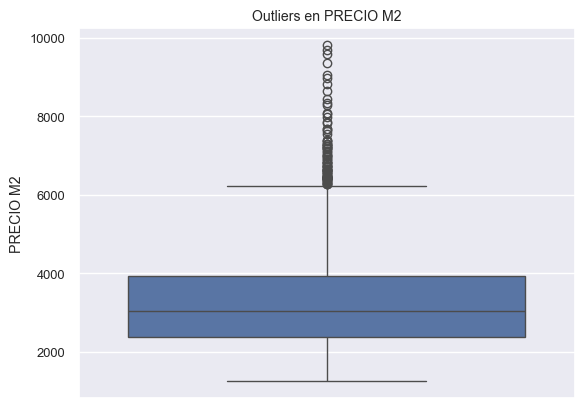

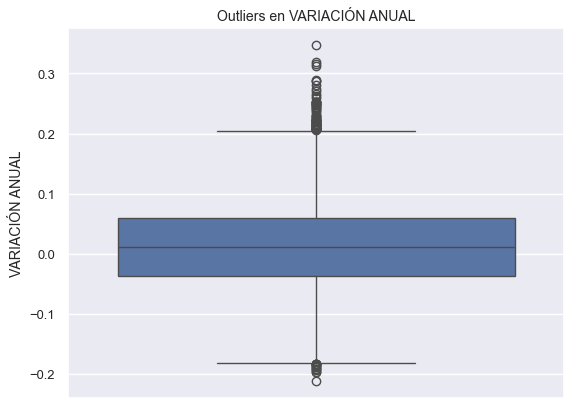

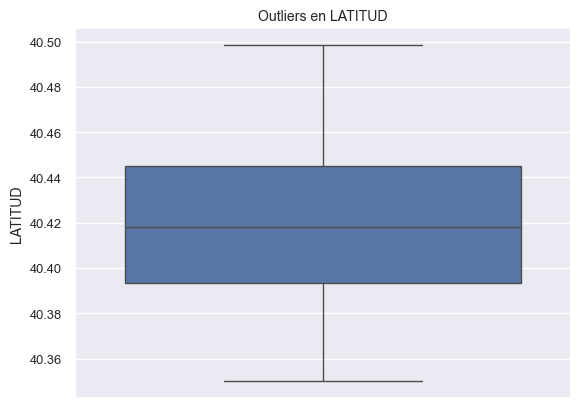

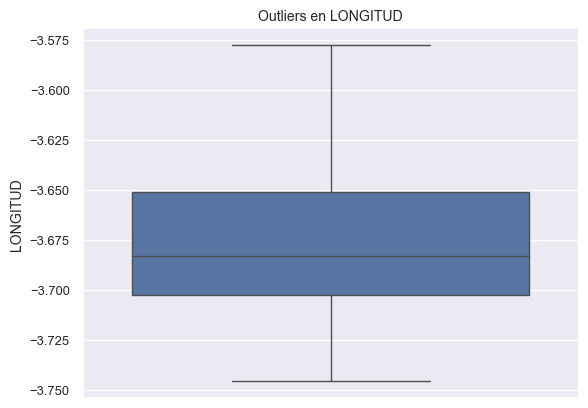

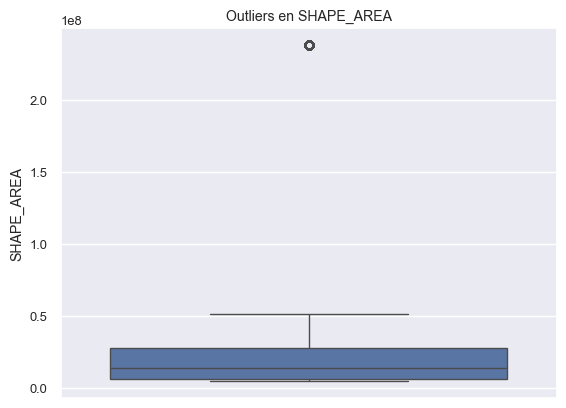

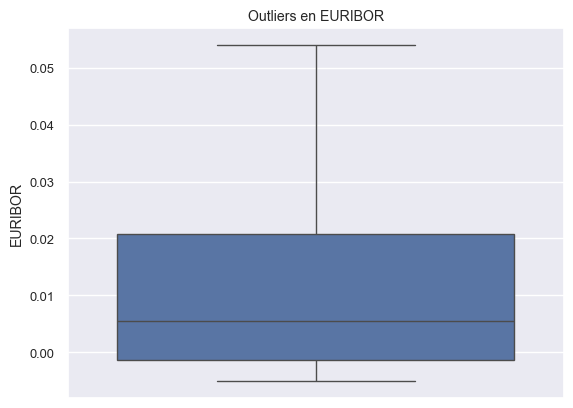

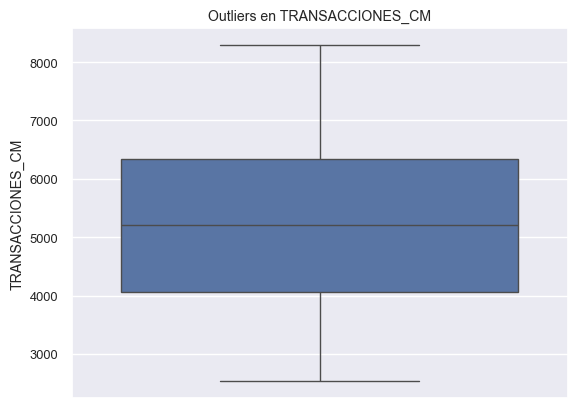

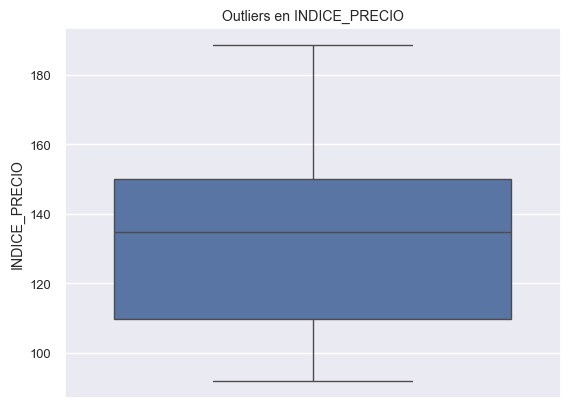

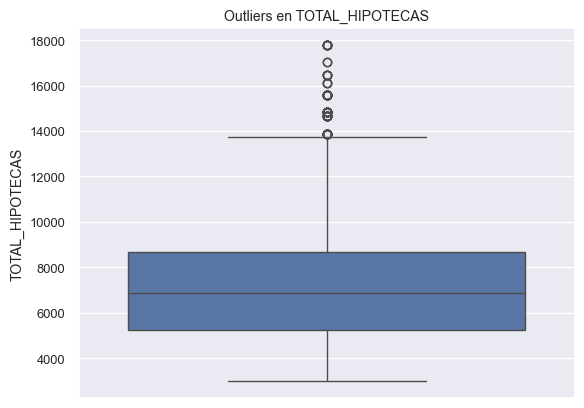

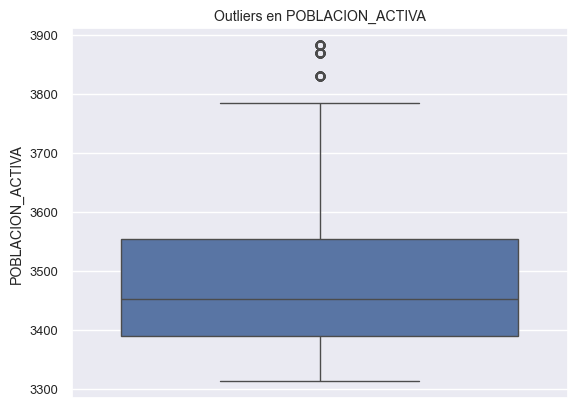

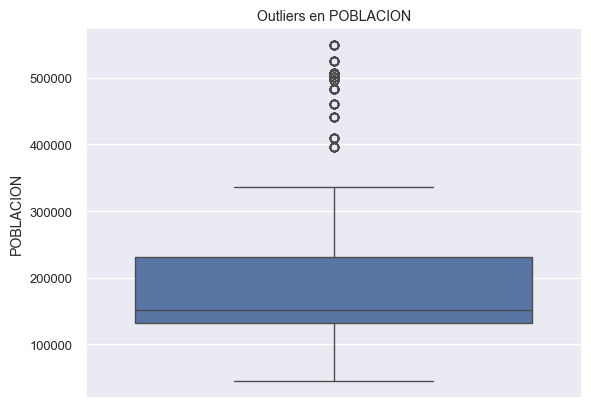

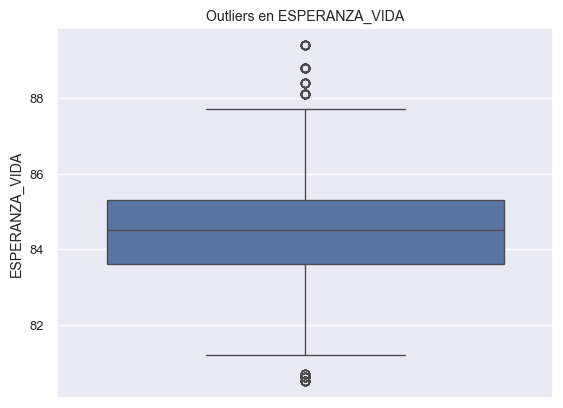

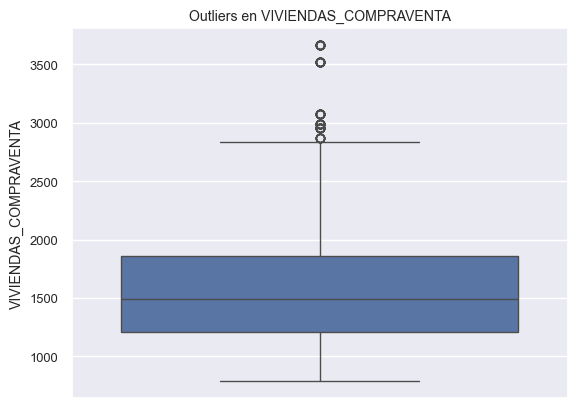

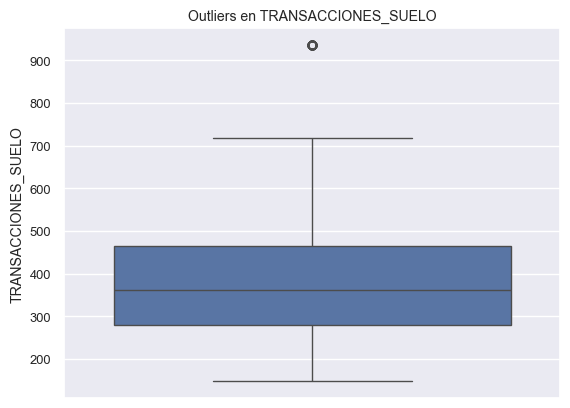

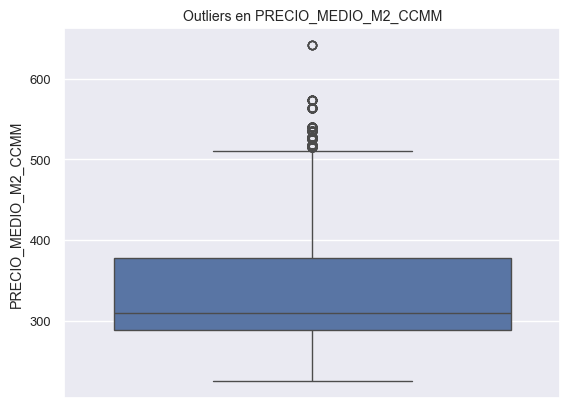

In [67]:
for col in num_cols3:
    plt.figure()
    sns.boxplot(data=dataset_entrenamiento[col])
    plt.title(f'Outliers en {col}')
    plt.show()


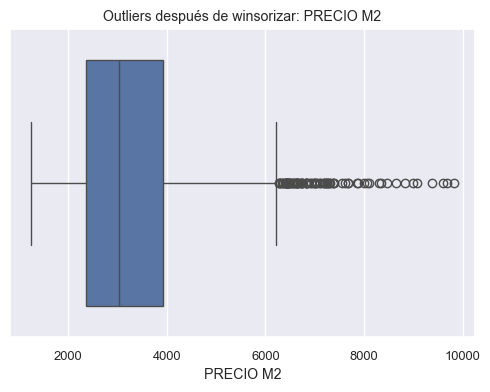

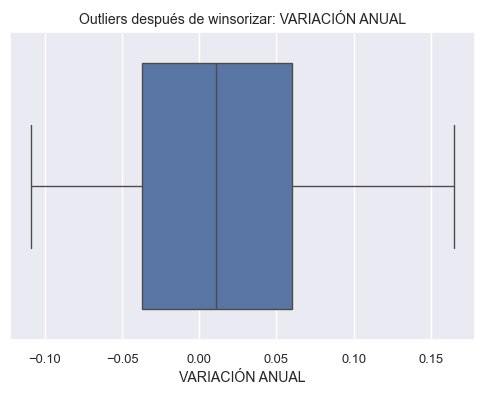

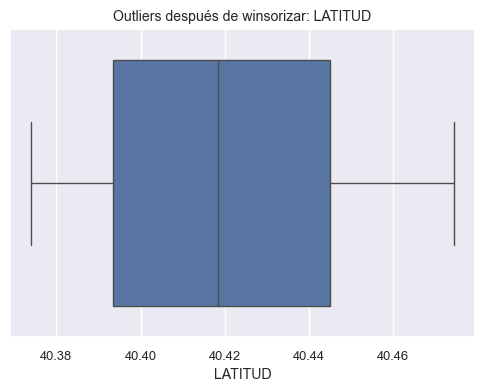

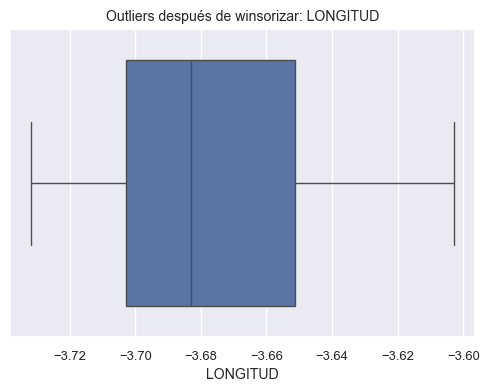

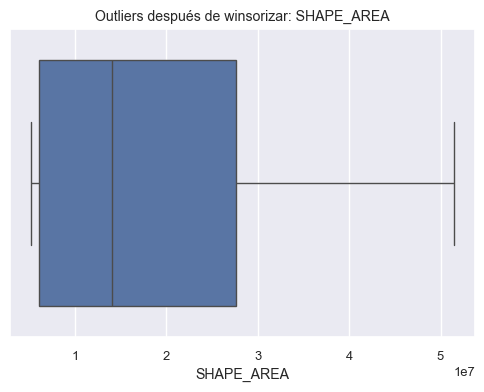

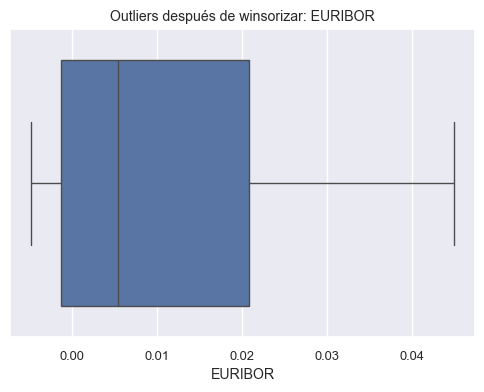

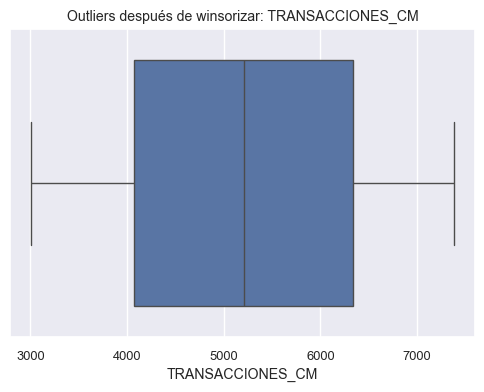

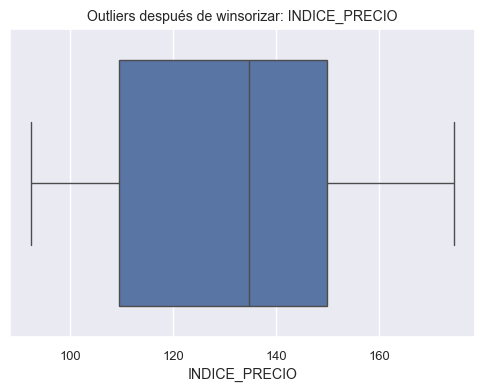

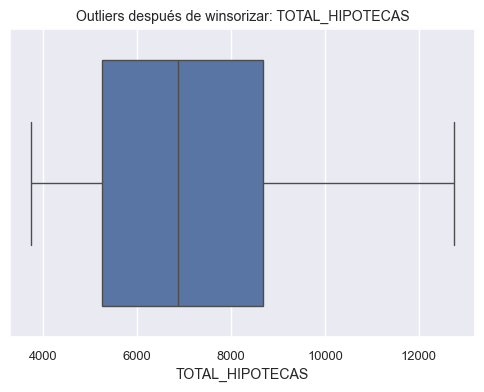

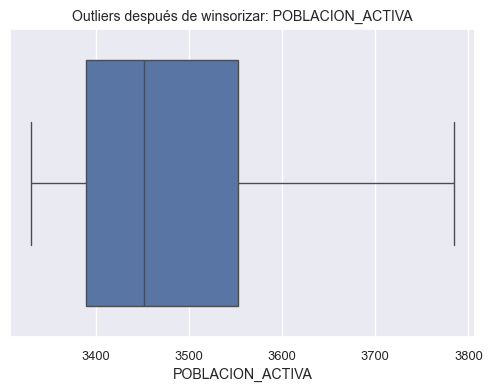

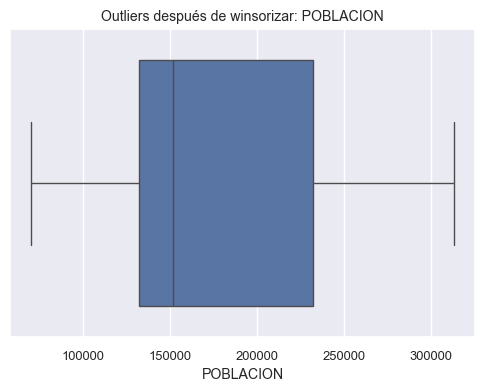

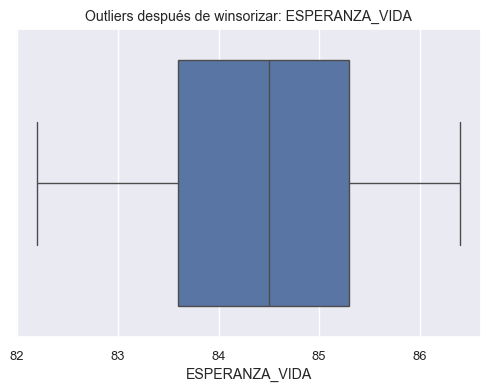

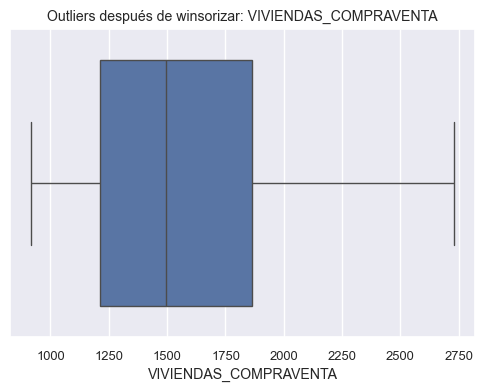

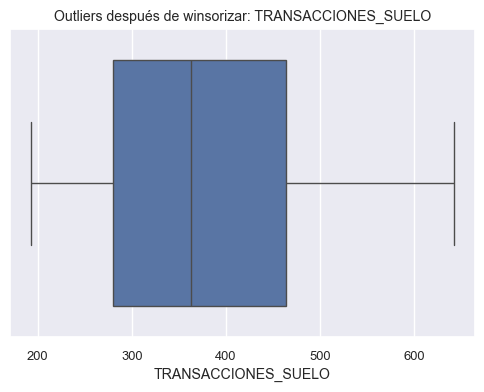

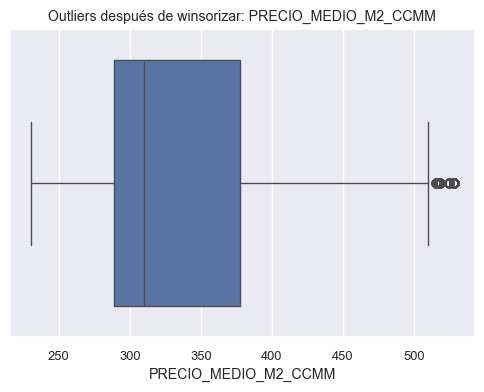

In [68]:
# Definir la variable objetivo
target = "PRECIO M2"

# --- Winsorización ---
for col in num_cols3:
    if col != target:  # Evita winsorizar la variable objetivo
       # q_low  = dataset_entrenamiento[col].quantile(0.01)   # percentil 1
       # q_high = dataset_entrenamiento[col].quantile(0.99)   # percentil 99

        q_low  = dataset_entrenamiento[col].quantile(0.05)
        q_high = dataset_entrenamiento[col].quantile(0.95)


        dataset_entrenamiento[col] = np.where(dataset_entrenamiento[col] < q_low, q_low,
                         np.where(dataset_entrenamiento[col] > q_high, q_high, dataset_entrenamiento[col]))

# --- Gráficos para comprobar ---
for col in num_cols3:
    
        plt.figure(figsize=(6,4))
        sns.boxplot(x=dataset_entrenamiento[col])
        plt.title(f'Outliers después de winsorizar: {col}')
        plt.show()



In [69]:
## Contar número de outliers

outlier_counts = {}

for col in num_cols3:
    # Solo procesar columnas numéricas y evitar el target si quieres
    if pd.api.types.is_numeric_dtype(dataset_entrenamiento[col]) and col != "DISTRITO":
        Q1 = dataset_entrenamiento[col].quantile(0.25)
        Q3 = dataset_entrenamiento[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Contar outliers
        outliers = df_final[(dataset_entrenamiento[col] < lower_bound) | (dataset_entrenamiento[col] > upper_bound)][col]
        outlier_counts[col] = outliers.count()

# Convertir a DataFrame ordenado
outlier_summary = pd.DataFrame.from_dict(outlier_counts, orient="index", columns=["Nº Outliers"])
outlier_summary = outlier_summary.sort_values(by="Nº Outliers", ascending=False)

print(outlier_summary)



                       Nº Outliers
PRECIO_MEDIO_M2_CCMM           466
PRECIO M2                       88
VARIACIÓN ANUAL                  0
LONGITUD                         0
SHAPE_AREA                       0
EURIBOR                          0
LATITUD                          0
TRANSACCIONES_CM                 0
INDICE_PRECIO                    0
POBLACION_ACTIVA                 0
TOTAL_HIPOTECAS                  0
POBLACION                        0
ESPERANZA_VIDA                   0
VIVIENDAS_COMPRAVENTA            0
TRANSACCIONES_SUELO              0


In [70]:
dataset_entrenamiento["PRECIO_MEDIO_M2_CCMM"] = np.log1p(dataset_entrenamiento["PRECIO_MEDIO_M2_CCMM"])


In [71]:
outlier_counts = {}

for col in dataset_entrenamiento.select_dtypes(include=["number"]).columns:

        Q1 = dataset_entrenamiento[col].quantile(0.25)
        Q3 = dataset_entrenamiento[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Contar outliers
        outliers = dataset_entrenamiento[(dataset_entrenamiento[col] < lower_bound) | 
                                         (dataset_entrenamiento[col] > upper_bound)][col]
        outlier_counts[col] = outliers.count()

# Resumen ordenado
outlier_summary = pd.DataFrame.from_dict(outlier_counts, orient="index", columns=["Nº Outliers"])
outlier_summary = outlier_summary.sort_values(by="Nº Outliers", ascending=False)

print(outlier_summary)


                       Nº Outliers
PRECIO M2                       88
AÑO                              0
MES_NUM                          0
VARIACIÓN ANUAL                  0
LATITUD                          0
LONGITUD                         0
SHAPE_AREA                       0
EURIBOR                          0
TRANSACCIONES_CM                 0
INDICE_PRECIO                    0
TOTAL_HIPOTECAS                  0
POBLACION_ACTIVA                 0
POBLACION                        0
ESPERANZA_VIDA                   0
VIVIENDAS_COMPRAVENTA            0
TRANSACCIONES_SUELO              0
PRECIO_MEDIO_M2_CCMM             0


In [73]:
# Dataset después de imputar por mediana
dataset_entrenamiento.to_excel(r"C:\Users\evahr\Downloads\TFM-idealista\df_despues_imputacion.xlsx", index=False)

In [72]:
dataset_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AÑO                    4418 non-null   Float64
 1   MES_NUM                4418 non-null   Float64
 2   PRECIO M2              4418 non-null   Float64
 3   VARIACIÓN ANUAL        4418 non-null   float64
 4   DISTRITO               4418 non-null   string 
 5   LATITUD                4418 non-null   float64
 6   LONGITUD               4418 non-null   float64
 7   SHAPE_AREA             4418 non-null   float64
 8   EURIBOR                4418 non-null   float64
 9   TRANSACCIONES_CM       4418 non-null   float64
 10  INDICE_PRECIO          4418 non-null   float64
 11  TOTAL_HIPOTECAS        4418 non-null   float64
 12  POBLACION_ACTIVA       4418 non-null   float64
 13  POBLACION              4418 non-null   float64
 14  ESPERANZA_VIDA         4418 non-null   float64
 15  VIVI

## Recolocar columnas

In [73]:
# Lista de columnas en el orden que quieras
cols = list(dataset_entrenamiento.columns)

# Sacar las columnas que quieres reubicar
cols.remove("VARIACIÓN ANUAL")
cols.remove("PRECIO M2")

# Insertar primero VARIACIÓN ANUAL antes de 'TRANSACCIONES_CM'
euribor_index = cols.index("TRANSACCIONES_CM")
cols.insert(euribor_index, "VARIACIÓN ANUAL")

# Insertar después PRECIO M2
cols.insert(euribor_index + 1, "PRECIO M2")

# Reordenar el DataFrame
dataset_entrenamiento = dataset_entrenamiento[cols]

dataset_entrenamiento



AÑO  MES_NUM    DISTRITO   LATITUD  LONGITUD    SHAPE_AREA  EURIBOR  \
0     2025.0      6.0  Arganzuela  40.40021  -3.69618  6.462176e+06  0.02081   
1     2025.0      5.0  Arganzuela  40.40021  -3.69618  6.462176e+06  0.02080   
2     2025.0      4.0  Arganzuela  40.40021  -3.69618  6.462176e+06  0.02143   
3     2025.0      3.0  Arganzuela  40.40021  -3.69618  6.462176e+06  0.02398   
4     2025.0      2.0  Arganzuela  40.40021  -3.69618  6.462176e+06  0.02402   
...      ...      ...         ...       ...       ...           ...      ...   
4413  2008.0      5.0  Villaverde  40.37400  -3.70000  2.019432e+07  0.04498   
4414  2008.0      4.0  Villaverde  40.37400  -3.70000  2.019432e+07  0.04498   
4415  2008.0      3.0  Villaverde  40.37400  -3.70000  2.019432e+07  0.04498   
4416  2008.0      2.0  Villaverde  40.37400  -3.70000  2.019432e+07  0.04349   
4417  2008.0      1.0  Villaverde  40.37400  -3.70000  2.019432e+07  0.04498   

      VARIACIÓN ANUAL  PRECIO M2  TRANSACCIONES_CM  INDICE_PRECIO  \
0              0.1650     5729.0            6944.0        134.735   
1              0.1650     5669.0            7020.0        134.735   
2              0.1650     5472.0            6604.0        134.735   
3              0.1630     5341.0            7380.0        174.540   
4              0.1620     5310.0            6963.0        174.540   
...               ...        ...               ...            ...   
4413           0.0075     2745.0            5107.0        153.000   
4414           0.0075     2806.0            6089.0        153.000   
4415           0.0075     2899.0            5525.0        152.900   
4416           0.0075     2900.0            5964.0        152.900   
4417           0.0075     2801.0            6123.0        152.900   

      TOTAL_HIPOTECAS  POBLACION_ACTIVA  POBLACION  ESPERANZA_VIDA  \
0              6964.0            3784.3   154118.0           84.95   
1              7598.0            3784.3   154118.0           84.95   
2              8425.0            3784.3   154118.0           84.95   
3              7973.0            3784.3   154118.0           84.95   
4              6701.0            3784.3   154118.0           84.95   
...               ...               ...        ...             ...   
4413          12744.0            3425.8   149732.0           82.20   
4414          12744.0            3425.8   149767.0           82.20   
4415          12024.0            3375.6   150043.0           82.20   
4416          12744.0            3375.6   149306.0           82.20   
4417          12744.0            3375.6   149067.0           82.20   

      VIVIENDAS_COMPRAVENTA  TRANSACCIONES_SUELO  PRECIO_MEDIO_M2_CCMM  
0                    1494.0                363.0              5.745180  
1                    1559.0                363.0              5.745180  
2                    1499.0                363.0              5.745180  
3                    1843.0                436.0              5.728020  
4                    1786.0                436.0              5.728020  
...                     ...                  ...                   ...  
4413                 2237.0                393.0              6.252828  
4414                 2669.0                393.0              6.252828  
4415                 2507.0                458.0              6.271159  
4416                 2347.0                458.0              6.271159  
4417                 2278.0                458.0              6.271159  

[4418 rows x 18 columns]

## Preparar dataset de predicción (01/07/25 - 30/06/26)

In [74]:
## DEFINITIVO 

# ----------------------------
# PARÁMETROS
# ----------------------------
start = '2025-07'   # horizonte de predicción: inicio
end   = '2026-06'   # horizonte de predicción: fin
target_col   = 'PRECIO M2'
district_col = 'DISTRITO'
year_col     = 'AÑO'
month_col    = 'MES_NUM'

# Solo lag de 12 meses
LAGS = [12]

# Lista de distritos (para OHE consistente)
distritos = [
    'Arganzuela','Barajas','Carabanchel','Centro','Chamartin','Chamberi','Ciudad Lineal',
    'Fuencarral-El Pardo','Hortaleza','Latina','Moncloa-Aravaca','Moratalaz','Puente De Vallecas',
    'Retiro','Salamanca','San Blas-Canillejas','Tetuan','Usera','Vicalvaro','Villa De Vallecas',
    'Villaverde'
]

# ---------------------------------------------------------
# 1) Copia histórico y asegura tipos/orden temporal
# ---------------------------------------------------------
df = dataset_entrenamiento.copy()

df[year_col]  = df[year_col].astype(int)
df[month_col] = df[month_col].astype(int)

# FECHA al primer día de mes para tener una referencia clara mensual
df['FECHA'] = pd.to_datetime(df[year_col].astype(str) + '-' + df[month_col].astype(str) + '-01')
df = df.sort_values([district_col, 'FECHA']).reset_index(drop=True)

# ---------------------------------------------------------
# 2) Columnas para lag DESDE 'EURIBOR' EN ADELANTE (numéricas)
# ---------------------------------------------------------
if 'EURIBOR' not in df.columns:
    raise KeyError("No encuentro la columna 'EURIBOR' en el DataFrame.")

idx_ini = df.columns.get_loc('EURIBOR')
candidatas = df.columns[idx_ini:]                         # desde EURIBOR hacia la derecha
num_cols   = df.select_dtypes(include=[np.number]).columns
cols_para_lag = [c for c in candidatas if c in num_cols]  # mismas columnas y orden

# ---------------------------------------------------------
# 3) Panel mensual completo por distrito (histórico mínimo -> end)
#    Evita desalineaciones del shift(12) si faltan meses en el histórico
# ---------------------------------------------------------
hist_min = df['FECHA'].min()
end_dt   = pd.to_datetime(end)

# Periodos mensuales y a Timestamp en INICIO de mes
cal = pd.period_range(start=hist_min.to_period('M'),
                      end=end_dt.to_period('M'),
                      freq='M').to_timestamp(how='start')

panel = (
    pd.MultiIndex.from_product([distritos, cal], names=[district_col, 'FECHA'])
    .to_frame(index=False)
)
panel[year_col]  = panel['FECHA'].dt.year
panel[month_col] = panel['FECHA'].dt.month

# Merge del histórico sobre el panel (rellena huecos con NaN)
full = panel.merge(
    df,
    on=[district_col, 'FECHA', year_col, month_col],
    how='left',
    suffixes=('', '_dup')
)

# ---------------------------------------------------------
# 4) Crear lag12 por DISTRITO (alineado por mes)
# ---------------------------------------------------------
full = full.sort_values([district_col, 'FECHA']).reset_index(drop=True)
for col in cols_para_lag:
    full[f'{col}_lag12'] = full.groupby(district_col, group_keys=False)[col].shift(12)

# ---------------------------------------------------------
# 5) Relleno en tramo de predicción con lag12 y columnas estáticas
# ---------------------------------------------------------
start_dt = pd.to_datetime(start)
mask_future = (full['FECHA'] >= start_dt) & (full['FECHA'] <= end_dt)

# columnas estáticas por distrito (ajústalas si tienes más)
cols_estaticas = [c for c in ['LATITUD','LONGITUD','SHAPE_AREA'] if c in full.columns]
for c in cols_estaticas:
    full[c] = full.groupby(district_col, group_keys=False)[c].ffill().bfill()

# Copiar SIEMPRE el valor del lag12 en el futuro (desde EURIBOR en adelante)
for c in cols_para_lag:
    lag12 = f'{c}_lag12'
    full.loc[mask_future, c] = full.loc[mask_future, lag12]

# El TARGET debe quedar en NaN en el tramo futuro (lo predecirá el modelo)
if target_col in full.columns:
    full.loc[mask_future, target_col] = np.nan

# ---------------------------------------------------------
# 6) One-Hot de distritos (prefijo DIST_) y garantía de columnas
# ---------------------------------------------------------
full = pd.get_dummies(full, columns=[district_col], prefix='DIST', dtype=bool)
for d in distritos:
    colname = f'DIST_{d}'
    if colname not in full.columns:
        full[colname] = False

# ---------------------------------------------------------
# 7) Extrae el DF de PREDICCIÓN y ordena columnas
#     - Primero TODAS las columnas originales (orden original)
#     - Después TODAS las columnas lag12 en el mismo orden de sus originales
#     - Finalmente las columnas OHE (DIST_*)
# ---------------------------------------------------------
dataset_prediccion = full.loc[mask_future].copy()

# columnas originales (del histórico) que están en dataset_prediccion
orig_cols = [c for c in df.columns if c in dataset_prediccion.columns]

# columnas lag en el mismo orden (solo las existentes)
lag_cols  = [f'{c}_lag12' for c in orig_cols if f'{c}_lag12' in dataset_prediccion.columns]

# columnas OHE
dist_cols = sorted([c for c in dataset_prediccion.columns if c.startswith('DIST_')])

# orden final
final_cols = orig_cols + lag_cols + dist_cols
dataset_prediccion = dataset_prediccion[final_cols]

print(dataset_prediccion.shape)
dataset_prediccion



(252, 51)


AÑO  MES_NUM   LATITUD  LONGITUD    SHAPE_AREA  EURIBOR  \
218   2025        7  40.40021  -3.69618  6.462176e+06  0.03526   
219   2025        8  40.40021  -3.69618  6.462176e+06  0.03169   
220   2025        9  40.40021  -3.69618  6.462176e+06  0.02940   
221   2025       10  40.40021  -3.69618  6.462176e+06  0.02686   
222   2025       11  40.40021  -3.69618  6.462176e+06  0.02506   
...    ...      ...       ...       ...           ...      ...   
4825  2026        2  40.37400  -3.70000  2.019432e+07  0.02402   
4826  2026        3  40.37400  -3.70000  2.019432e+07  0.02398   
4827  2026        4  40.37400  -3.70000  2.019432e+07  0.02143   
4828  2026        5  40.37400  -3.70000  2.019432e+07      NaN   
4829  2026        6  40.37400  -3.70000  2.019432e+07      NaN   

      VARIACIÓN ANUAL  PRECIO M2  TRANSACCIONES_CM  INDICE_PRECIO  ...  \
218             0.114       <NA>            6657.0         174.54  ...   
219             0.114       <NA>            5423.0         174.54  ...   
220             0.114       <NA>            7380.0         174.54  ...   
221             0.126       <NA>            7380.0         174.54  ...   
222             0.125       <NA>            6876.0         174.54  ...   
...               ...        ...               ...            ...  ...   
4825            0.140       <NA>            6963.0         174.54  ...   
4826            0.154       <NA>            7380.0         174.54  ...   
4827            0.155       <NA>            6604.0         134.63  ...   
4828              NaN       <NA>               NaN            NaN  ...   
4829              NaN       <NA>               NaN            NaN  ...   

      DIST_Moratalaz  DIST_Puente De Vallecas  DIST_Retiro  DIST_Salamanca  \
218            False                    False        False           False   
219            False                    False        False           False   
220            False                    False        False           False   
221            False                    False        False           False   
222            False                    False        False           False   
...              ...                      ...          ...             ...   
4825           False                    False        False           False   
4826           False                    False        False           False   
4827           False                    False        False           False   
4828           False                    False        False           False   
4829           False                    False        False           False   

      DIST_San Blas-Canillejas  DIST_Tetuan  DIST_Usera DIST_Vicalvaro  \
218                      False        False       False          False   
219                      False        False       False          False   
220                      False        False       False          False   
221                      False        False       False          False   
222                      False        False       False          False   
...                        ...          ...         ...            ...   
4825                     False        False       False          False   
4826                     False        False       False          False   
4827                     False        False       False          False   
4828                     False        False       False          False   
4829                     False        False       False          False   

      DIST_Villa De Vallecas  DIST_Villaverde  
218                    False            False  
219                    False            False  
220                    False            False  
221                    False            False  
222                    False            False  
...                      ...              ...  
4825                   False             True  
4826                   False             True  
4827                   False             True  
4828               

### Sin aplicar OHE

### Eliminar columnas que no son de Lag

In [75]:
# Eliminar columnas que no son de lag 
# Lista de columnas originales que quieres eliminar
cols_drop = [
    'EURIBOR',
    'VARIACIÓN ANUAL',
    'TRANSACCIONES_CM',
    'INDICE_PRECIO',
    'TOTAL_HIPOTECAS',
    'POBLACION_ACTIVA',
    'POBLACION',
    'ESPERANZA_VIDA',
    'VIVIENDAS_COMPRAVENTA',
    'TRANSACCIONES_SUELO',
    'PRECIO_MEDIO_M2_CCMM',
    'FECHA'
]

# Eliminarlas si existen en df_lag
dataset_prediccion = dataset_prediccion.drop(columns=[c for c in cols_drop if c in dataset_prediccion.columns])

dataset_prediccion.head()

AÑO  MES_NUM   LATITUD  LONGITUD    SHAPE_AREA  PRECIO M2  \
218  2025        7  40.40021  -3.69618  6.462176e+06       <NA>   
219  2025        8  40.40021  -3.69618  6.462176e+06       <NA>   
220  2025        9  40.40021  -3.69618  6.462176e+06       <NA>   
221  2025       10  40.40021  -3.69618  6.462176e+06       <NA>   
222  2025       11  40.40021  -3.69618  6.462176e+06       <NA>   

     EURIBOR_lag12  VARIACIÓN ANUAL_lag12  PRECIO M2_lag12  \
218        0.03526                  0.114           4957.0   
219        0.03169                  0.114           4998.0   
220        0.02940                  0.114           4999.0   
221        0.02686                  0.126           5079.0   
222        0.02506                  0.125           5062.0   

     TRANSACCIONES_CM_lag12  ...  DIST_Moratalaz  DIST_Puente De Vallecas  \
218                  6657.0  ...           False                    False   
219                  5423.0  ...           False                    False   
220                  7380.0  ...           False                    False   
221                  7380.0  ...           False                    False   
222                  6876.0  ...           False                    False   

     DIST_Retiro  DIST_Salamanca  DIST_San Blas-Canillejas  DIST_Tetuan  \
218        False           False                     False        False   
219        False           False                     False        False   
220        False           False                     False        False   
221        False           False                     False        False   
222        False           False                     False        False   

     DIST_Usera  DIST_Vicalvaro  DIST_Villa De Vallecas  DIST_Villaverde  
218       False           False                   False            False  
219       False           False                   False            False  
220       False           False                   False            False  
221       False           False                   False            False  
222       False           False                   False            False  

[5 rows x 39 columns]

In [76]:
dataset_prediccion = dataset_prediccion.copy()

# columnas que NO quieres convertir (fechas y categóricas puras)
EXCLUDE = ["FECHA", "AÑO_MES", "DISTRITO"]   

# 1) Intentar pasar a número todo lo que no sea fecha ni excluido
cols_try = [c for c in dataset_prediccion.columns
            if c not in EXCLUDE and not is_datetime64_any_dtype(dataset_prediccion[c])]
dataset_prediccion[cols_try] = dataset_prediccion[cols_try].apply(pd.to_numeric, errors="coerce")

# 2) Asegurar float en todas las numéricas
num_cols = dataset_prediccion.select_dtypes(include="number").columns
dataset_prediccion[num_cols] = dataset_prediccion[num_cols].astype("Float64")   

dataset_prediccion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 218 to 4829
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          252 non-null    Float64
 1   MES_NUM                      252 non-null    Float64
 2   LATITUD                      252 non-null    Float64
 3   LONGITUD                     252 non-null    Float64
 4   SHAPE_AREA                   252 non-null    Float64
 5   PRECIO M2                    0 non-null      Float64
 6   EURIBOR_lag12                250 non-null    Float64
 7   VARIACIÓN ANUAL_lag12        250 non-null    Float64
 8   PRECIO M2_lag12              250 non-null    Float64
 9   TRANSACCIONES_CM_lag12       250 non-null    Float64
 10  INDICE_PRECIO_lag12          250 non-null    Float64
 11  TOTAL_HIPOTECAS_lag12        250 non-null    Float64
 12  POBLACION_ACTIVA_lag12       250 non-null    Float64
 13  POBLACION_lag12       

In [77]:
# Rellenar los NaN con el valor del mes anterior dentro del mismo distrito y año.

# === Reconstruir distrito desde OHE y rellenar dentro del MISMO AÑO ===
dist_cols = [c for c in dataset_prediccion.columns if c.startswith('DIST_')]

# Recuperar etiqueta de distrito (columna auxiliar)
dataset_prediccion['__DISTRITO__'] = (
    dataset_prediccion[dist_cols].idxmax(axis=1).str.replace('DIST_', '', regex=False)
)

# columnas numéricas a rellenar (evita OHE y el target)
cols_fill = [
    c for c in dataset_prediccion.columns
    if pd.api.types.is_numeric_dtype(dataset_prediccion[c])
    and not c.startswith('DIST_')
    and c != target_col
]

# ordenar y forward-fill por distrito y AÑO (enero no hereda diciembre)
dataset_prediccion = dataset_prediccion.sort_values(['__DISTRITO__', year_col, month_col]).reset_index(drop=True)
dataset_prediccion[cols_fill] = (
    dataset_prediccion.groupby(['__DISTRITO__', year_col], group_keys=False)[cols_fill]
        .ffill()
)

# opcional: si quieres también bfill dentro del año
# dataset_prediccion[cols_fill] = dataset_prediccion.groupby(['__DISTRITO__', year_col], group_keys=False)[cols_fill].ffill().bfill()

# limpiar auxiliar
dataset_prediccion = dataset_prediccion.drop(columns='__DISTRITO__')

dataset_prediccion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          252 non-null    Float64
 1   MES_NUM                      252 non-null    Float64
 2   LATITUD                      252 non-null    Float64
 3   LONGITUD                     252 non-null    Float64
 4   SHAPE_AREA                   252 non-null    Float64
 5   PRECIO M2                    0 non-null      Float64
 6   EURIBOR_lag12                252 non-null    Float64
 7   VARIACIÓN ANUAL_lag12        252 non-null    Float64
 8   PRECIO M2_lag12              252 non-null    Float64
 9   TRANSACCIONES_CM_lag12       252 non-null    Float64
 10  INDICE_PRECIO_lag12          252 non-null    Float64
 11  TOTAL_HIPOTECAS_lag12        252 non-null    Float64
 12  POBLACION_ACTIVA_lag12       252 non-null    Float64
 13  POBLACION_lag12     

In [78]:
dataset_prediccion.to_excel(r"C:\Users\evahr\Downloads\TFM-idealista\dataset_prediccion.xlsx", index=False)

## Dataset train/test

## Crear Lags en variables explicativas

In [84]:
dataset_entrenamiento.head()

AÑO  MES_NUM    DISTRITO   LATITUD  LONGITUD    SHAPE_AREA  EURIBOR  \
0  2025.0      6.0  Arganzuela  40.40021  -3.69618  6.462176e+06  0.02081   
1  2025.0      5.0  Arganzuela  40.40021  -3.69618  6.462176e+06  0.02080   
2  2025.0      4.0  Arganzuela  40.40021  -3.69618  6.462176e+06  0.02143   
3  2025.0      3.0  Arganzuela  40.40021  -3.69618  6.462176e+06  0.02398   
4  2025.0      2.0  Arganzuela  40.40021  -3.69618  6.462176e+06  0.02402   

   VARIACIÓN ANUAL  PRECIO M2  TRANSACCIONES_CM  INDICE_PRECIO  \
0            0.165     5729.0            6944.0        134.735   
1            0.165     5669.0            7020.0        134.735   
2            0.165     5472.0            6604.0        134.735   
3            0.163     5341.0            7380.0        174.540   
4            0.162     5310.0            6963.0        174.540   

   TOTAL_HIPOTECAS  POBLACION_ACTIVA  POBLACION  ESPERANZA_VIDA  \
0           6964.0            3784.3   154118.0           84.95   
1           7598.0            3784.3   154118.0           84.95   
2           8425.0            3784.3   154118.0           84.95   
3           7973.0            3784.3   154118.0           84.95   
4           6701.0            3784.3   154118.0           84.95   

   VIVIENDAS_COMPRAVENTA  TRANSACCIONES_SUELO  PRECIO_MEDIO_M2_CCMM  
0                 1494.0                363.0               5.74518  
1                 1559.0                363.0               5.74518  
2                 1499.0                363.0               5.74518  
3                 1843.0                436.0               5.72802  
4                 1786.0                436.0               5.72802

In [85]:
# Crear lag (-12) para variables a partir de EURIBOR en adelante


dataset_entrenamiento_lag = dataset_entrenamiento.copy()

# ordenar por distrito y tiempo
dataset_entrenamiento_lag['AÑO'] = dataset_entrenamiento_lag['AÑO'].astype(int)
dataset_entrenamiento_lag['MES_NUM'] = dataset_entrenamiento_lag['MES_NUM'].astype(int)
dataset_entrenamiento_lag['FECHA'] = pd.to_datetime(dataset_entrenamiento_lag['AÑO'].astype(str) + '-' + dataset_entrenamiento_lag['MES_NUM'].astype(str) + '-01')
dataset_entrenamiento_lag = dataset_entrenamiento_lag.sort_values(['DISTRITO', 'FECHA'])

# columnas desde 'EURIBOR' hasta el final del DataFrame
start_idx = dataset_entrenamiento_lag.columns.get_loc('EURIBOR')
cols_desde_euribor = dataset_entrenamiento_lag.columns[start_idx:]

# nos quedamos solo con las numéricas dentro de ese tramo para laggear
cols_lag = [c for c in cols_desde_euribor if pd.api.types.is_numeric_dtype(dataset_entrenamiento_lag[c])]

# crear lag 12 por DISTRITO
for c in cols_lag:
    dataset_entrenamiento_lag[f'{c}_lag12'] = dataset_entrenamiento_lag.groupby('DISTRITO')[c].shift(12)

# eliminar columna temporal de fecha
dataset_entrenamiento_lag = dataset_entrenamiento_lag.drop(columns=['FECHA'])

# df_lag = df_lag.drop(columns='FECHA')  # opcional
dataset_entrenamiento_lag.head()

AÑO  MES_NUM    DISTRITO   LATITUD  LONGITUD    SHAPE_AREA  EURIBOR  \
211  2007       11  Arganzuela  40.40021  -3.69618  6.462176e+06  0.04498   
210  2007       12  Arganzuela  40.40021  -3.69618  6.462176e+06  0.04498   
209  2008        1  Arganzuela  40.40021  -3.69618  6.462176e+06  0.04498   
208  2008        2  Arganzuela  40.40021  -3.69618  6.462176e+06  0.04349   
207  2008        3  Arganzuela  40.40021  -3.69618  6.462176e+06  0.04498   

     VARIACIÓN ANUAL  PRECIO M2  TRANSACCIONES_CM  ...  PRECIO M2_lag12  \
211           0.0125     4000.0            6058.0  ...             <NA>   
210           0.0125     4000.0            4577.0  ...             <NA>   
209           0.0125     4000.0            6123.0  ...             <NA>   
208           0.0125     3824.0            5964.0  ...             <NA>   
207           0.0125     4000.0            5525.0  ...             <NA>   

     TRANSACCIONES_CM_lag12  INDICE_PRECIO_lag12  TOTAL_HIPOTECAS_lag12  \
211                     NaN                  NaN                    NaN   
210                     NaN                  NaN                    NaN   
209                     NaN                  NaN                    NaN   
208                     NaN                  NaN                    NaN   
207                     NaN                  NaN                    NaN   

     POBLACION_ACTIVA_lag12  POBLACION_lag12  ESPERANZA_VIDA_lag12  \
211                     NaN              NaN                   NaN   
210                     NaN              NaN                   NaN   
209                     NaN              NaN                   NaN   
208                     NaN              NaN                   NaN   
207                     NaN              NaN                   NaN   

     VIVIENDAS_COMPRAVENTA_lag12  TRANSACCIONES_SUELO_lag12  \
211                          NaN                        NaN   
210                          NaN                        NaN   
209                          NaN                        NaN   
208                          NaN                        NaN   
207                          NaN                        NaN   

     PRECIO_MEDIO_M2_CCMM_lag12  
211                         NaN  
210                         NaN  
209                         NaN  
208                         NaN  
207                         NaN  

[5 rows x 30 columns]

In [86]:
# Eliminar columnas que no son de lag 
# Lista de columnas originales que quieres eliminar
cols_drop = [
    'EURIBOR',
    'VARIACIÓN ANUAL',
    'TRANSACCIONES_CM',
    'INDICE_PRECIO',
    'TOTAL_HIPOTECAS',
    'POBLACION_ACTIVA',
    'POBLACION',
    'ESPERANZA_VIDA',
    'VIVIENDAS_COMPRAVENTA',
    'TRANSACCIONES_SUELO',
    'PRECIO_MEDIO_M2_CCMM',
    'FECHA'
]

# Eliminarlas si existen en df_lag
dataset_entrenamiento_lag = dataset_entrenamiento_lag.drop(columns=[c for c in cols_drop if c in dataset_entrenamiento_lag.head().columns])

dataset_entrenamiento_lag.head()

AÑO  MES_NUM    DISTRITO   LATITUD  LONGITUD    SHAPE_AREA  PRECIO M2  \
211  2007       11  Arganzuela  40.40021  -3.69618  6.462176e+06     4000.0   
210  2007       12  Arganzuela  40.40021  -3.69618  6.462176e+06     4000.0   
209  2008        1  Arganzuela  40.40021  -3.69618  6.462176e+06     4000.0   
208  2008        2  Arganzuela  40.40021  -3.69618  6.462176e+06     3824.0   
207  2008        3  Arganzuela  40.40021  -3.69618  6.462176e+06     4000.0   

     EURIBOR_lag12  VARIACIÓN ANUAL_lag12  PRECIO M2_lag12  \
211            NaN                    NaN             <NA>   
210            NaN                    NaN             <NA>   
209            NaN                    NaN             <NA>   
208            NaN                    NaN             <NA>   
207            NaN                    NaN             <NA>   

     TRANSACCIONES_CM_lag12  INDICE_PRECIO_lag12  TOTAL_HIPOTECAS_lag12  \
211                     NaN                  NaN                    NaN   
210                     NaN                  NaN                    NaN   
209                     NaN                  NaN                    NaN   
208                     NaN                  NaN                    NaN   
207                     NaN                  NaN                    NaN   

     POBLACION_ACTIVA_lag12  POBLACION_lag12  ESPERANZA_VIDA_lag12  \
211                     NaN              NaN                   NaN   
210                     NaN              NaN                   NaN   
209                     NaN              NaN                   NaN   
208                     NaN              NaN                   NaN   
207                     NaN              NaN                   NaN   

     VIVIENDAS_COMPRAVENTA_lag12  TRANSACCIONES_SUELO_lag12  \
211                          NaN                        NaN   
210                          NaN                        NaN   
209                          NaN                        NaN   
208                          NaN                        NaN   
207                          NaN                        NaN   

     PRECIO_MEDIO_M2_CCMM_lag12  
211                         NaN  
210                         NaN  
209                         NaN  
208                         NaN  
207                         NaN

In [87]:
print("Número total de columnas:", dataset_entrenamiento_lag.shape[1])


Número total de columnas: 19


## Eliminación nulos generados

In [88]:
# Análisis valores nulos por variable

def resumen_nulos(df: pd.DataFrame) -> pd.DataFrame:
    total = len(df)
    nulos = df.isna().sum()
    pct = (nulos / total * 100).round(2)
    resumen = (
        pd.DataFrame({"n_nulos": nulos, "%_nulos": pct})
        .sort_values("%_nulos", ascending=False)
        .reset_index()
        .rename(columns={"index": "columna"})
    )
    return resumen

# Uso:
res = resumen_nulos(dataset_entrenamiento_lag)
print(f"Filas totales: {len(dataset_entrenamiento_lag):,}".replace(",", "."))
res

Filas totales: 4.418


columna  n_nulos  %_nulos
0         VARIACIÓN ANUAL_lag12      252      5.7
1               PRECIO M2_lag12      252      5.7
2        TRANSACCIONES_CM_lag12      252      5.7
3          ESPERANZA_VIDA_lag12      252      5.7
4   VIVIENDAS_COMPRAVENTA_lag12      252      5.7
5     TRANSACCIONES_SUELO_lag12      252      5.7
6                 EURIBOR_lag12      252      5.7
7               POBLACION_lag12      252      5.7
8        POBLACION_ACTIVA_lag12      252      5.7
9         TOTAL_HIPOTECAS_lag12      252      5.7
10          INDICE_PRECIO_lag12      252      5.7
11   PRECIO_MEDIO_M2_CCMM_lag12      252      5.7
12                     DISTRITO        0      0.0
13                          AÑO        0      0.0
14                      MES_NUM        0      0.0
15                      LATITUD        0      0.0
16                     LONGITUD        0      0.0
17                   SHAPE_AREA        0      0.0
18                    PRECIO M2        0      0.0

In [92]:
# Eliminar filas con nulos en cualquier columna
dataset_entrenamiento_lag = dataset_entrenamiento_lag.dropna(axis=0)

# Reiniciar el índice después de eliminar filas
#dataset_entrenamiento_lag = dataset_entrenamiento_lag.reset_index(drop=True)


In [94]:
# Análisis valores nulos por variable

def resumen_nulos(df: pd.DataFrame) -> pd.DataFrame:
    total = len(df)
    nulos = df.isna().sum()
    pct = (nulos / total * 100).round(2)
    resumen = (
        pd.DataFrame({"n_nulos": nulos, "%_nulos": pct})
        .sort_values("%_nulos", ascending=False)
        .reset_index()
        .rename(columns={"index": "columna"})
    )
    return resumen

# Uso:
res = resumen_nulos(dataset_entrenamiento_lag)
print(f"Filas totales: {len(dataset_entrenamiento_lag):,}".replace(",", "."))
res

Filas totales: 4.166


columna  n_nulos  %_nulos
0                           AÑO        0      0.0
1                       MES_NUM        0      0.0
2                      DISTRITO        0      0.0
3                       LATITUD        0      0.0
4                      LONGITUD        0      0.0
5                    SHAPE_AREA        0      0.0
6                     PRECIO M2        0      0.0
7                 EURIBOR_lag12        0      0.0
8         VARIACIÓN ANUAL_lag12        0      0.0
9               PRECIO M2_lag12        0      0.0
10       TRANSACCIONES_CM_lag12        0      0.0
11          INDICE_PRECIO_lag12        0      0.0
12        TOTAL_HIPOTECAS_lag12        0      0.0
13       POBLACION_ACTIVA_lag12        0      0.0
14              POBLACION_lag12        0      0.0
15         ESPERANZA_VIDA_lag12        0      0.0
16  VIVIENDAS_COMPRAVENTA_lag12        0      0.0
17    TRANSACCIONES_SUELO_lag12        0      0.0
18   PRECIO_MEDIO_M2_CCMM_lag12        0      0.0

Se eliminaron 252 registros con valores nulos (5,7% del total), dado que su proporción era baja y no representaban un impacto significativo en la muestra. Esta decisión evita introducir sesgo mediante imputaciones artificiales. Estos nulos se deben principalmente a los primeros años (2007-2009)

In [95]:
# Número de filas y columnas
n_filas, n_columnas = dataset_entrenamiento_lag.shape

print(f"Filas: {n_filas}")
print(f"Columnas: {n_columnas}")


Filas: 4166
Columnas: 19


In [96]:
dataset_entrenamiento_lag = dataset_entrenamiento_lag.copy()

# columnas que NO quieres convertir (fechas y categóricas puras)
EXCLUDE = ["DISTRITO"]   

# 1) Intentar pasar a número todo lo que no sea fecha ni excluido
cols_try = [c for c in dataset_entrenamiento_lag.columns
            if c not in EXCLUDE and not is_datetime64_any_dtype(dataset_entrenamiento_lag[c])]
dataset_entrenamiento_lag[cols_try] = dataset_entrenamiento_lag[cols_try].apply(pd.to_numeric, errors="coerce")

# 2) Asegurar float en todas las numéricas
num_cols = dataset_entrenamiento_lag.select_dtypes(include="number").columns
dataset_entrenamiento_lag[num_cols] = dataset_entrenamiento_lag[num_cols].astype("Float64")   

dataset_entrenamiento_lag.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4166 entries, 199 to 4210
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          4166 non-null   Float64
 1   MES_NUM                      4166 non-null   Float64
 2   DISTRITO                     4166 non-null   string 
 3   LATITUD                      4166 non-null   Float64
 4   LONGITUD                     4166 non-null   Float64
 5   SHAPE_AREA                   4166 non-null   Float64
 6   PRECIO M2                    4166 non-null   Float64
 7   EURIBOR_lag12                4166 non-null   Float64
 8   VARIACIÓN ANUAL_lag12        4166 non-null   Float64
 9   PRECIO M2_lag12              4166 non-null   Float64
 10  TRANSACCIONES_CM_lag12       4166 non-null   Float64
 11  INDICE_PRECIO_lag12          4166 non-null   Float64
 12  TOTAL_HIPOTECAS_lag12        4166 non-null   Float64
 13  POBLACION_ACTIVA_lag1

## One Hot Encoding a la variable DISTRITO

In [97]:
# One Hot Encoding con pandas
dataset_entrenamiento_lag1 = pd.get_dummies(dataset_entrenamiento_lag, 
                                 columns=["DISTRITO"], 
                                 prefix="DIST", 
                                 drop_first=False)

# Ver las nuevas columnas
print(dataset_entrenamiento_lag1.head())


        AÑO  MES_NUM   LATITUD  LONGITUD     SHAPE_AREA  PRECIO M2  \
199  2008.0     11.0  40.40021  -3.69618  6462175.91405     3714.0   
198  2008.0     12.0  40.40021  -3.69618  6462175.91405     3667.0   
197  2009.0      1.0  40.40021  -3.69618  6462175.91405     3782.0   
196  2009.0      2.0  40.40021  -3.69618  6462175.91405     3722.0   
195  2009.0      3.0  40.40021  -3.69618  6462175.91405     3722.0   

     EURIBOR_lag12  VARIACIÓN ANUAL_lag12  PRECIO M2_lag12  \
199        0.04498                 0.0125           4000.0   
198        0.04498                 0.0125           4000.0   
197        0.04498                 0.0125           4000.0   
196        0.04349                 0.0125           3824.0   
195        0.04498                 0.0125           4000.0   

     TRANSACCIONES_CM_lag12  ...  DIST_Moratalaz  DIST_Puente De Vallecas  \
199                  6058.0  ...           False                    False   
198                  4577.0  ...           False    

In [98]:
dataset_entrenamiento_lag1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4166 entries, 199 to 4210
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          4166 non-null   Float64
 1   MES_NUM                      4166 non-null   Float64
 2   LATITUD                      4166 non-null   Float64
 3   LONGITUD                     4166 non-null   Float64
 4   SHAPE_AREA                   4166 non-null   Float64
 5   PRECIO M2                    4166 non-null   Float64
 6   EURIBOR_lag12                4166 non-null   Float64
 7   VARIACIÓN ANUAL_lag12        4166 non-null   Float64
 8   PRECIO M2_lag12              4166 non-null   Float64
 9   TRANSACCIONES_CM_lag12       4166 non-null   Float64
 10  INDICE_PRECIO_lag12          4166 non-null   Float64
 11  TOTAL_HIPOTECAS_lag12        4166 non-null   Float64
 12  POBLACION_ACTIVA_lag12       4166 non-null   Float64
 13  POBLACION_lag12      

In [99]:
## Sin One Hot Encoding
dataset_entrenamiento_lag.to_excel(r"C:\Users\evahr\Downloads\TFM-idealista\dataset_entrenamiento_lag.xlsx", index=False)

In [100]:
## Con One Hot Encoding
dataset_entrenamiento_lag1.to_excel(r"C:\Users\evahr\Downloads\TFM-idealista\dataset_entrenamiento_lag1.xlsx", index=False)

In [101]:
dataset_entrenamiento_lag1

AÑO  MES_NUM   LATITUD  LONGITUD     SHAPE_AREA  PRECIO M2  \
199   2008.0     11.0  40.40021  -3.69618  6462175.91405     3714.0   
198   2008.0     12.0  40.40021  -3.69618  6462175.91405     3667.0   
197   2009.0      1.0  40.40021  -3.69618  6462175.91405     3782.0   
196   2009.0      2.0  40.40021  -3.69618  6462175.91405     3722.0   
195   2009.0      3.0  40.40021  -3.69618  6462175.91405     3722.0   
...      ...      ...       ...       ...            ...        ...   
4214  2024.0     12.0    40.374      -3.7  20194322.8326     2252.0   
4213  2025.0      1.0    40.374      -3.7  20194322.8326     2207.0   
4212  2025.0      2.0    40.374      -3.7  20194322.8326     2254.0   
4211  2025.0      3.0    40.374      -3.7  20194322.8326     2294.0   
4210  2025.0      4.0    40.374      -3.7  20194322.8326     2362.0   

      EURIBOR_lag12  VARIACIÓN ANUAL_lag12  PRECIO M2_lag12  \
199         0.04498                 0.0125           4000.0   
198         0.04498                 0.0125           4000.0   
197         0.04498                 0.0125           4000.0   
196         0.04349                 0.0125           3824.0   
195         0.04498                 0.0125           4000.0   
...             ...                    ...              ...   
4214        0.03679                  0.063           1963.0   
4213        0.03609                  0.068           1982.0   
4212        0.03671                  0.058           1977.0   
4211        0.03716                  0.067           1988.0   
4210        0.03702                  0.085           2046.0   

      TRANSACCIONES_CM_lag12  ...  DIST_Moratalaz  DIST_Puente De Vallecas  \
199                   6058.0  ...           False                    False   
198                   4577.0  ...           False                    False   
197                   6123.0  ...           False                    False   
196                   5964.0  ...           False                    False   
195                   5525.0  ...           False                    False   
...                      ...  ...             ...                      ...   
4214                  4048.0  ...           False                    False   
4213                  6209.0  ...           False                    False   
4212                  6336.0  ...           False                    False   
4211                  5924.0  ...           False                    False   
4210                  5805.0  ...           False                    False   

      DIST_Retiro  DIST_Salamanca  DIST_San Blas-Canillejas  DIST_Tetuan  \
199         False           False                     False        False   
198         False           False                     False        False   
197         False           False                     False        False   
196         False           False                     False        False   
195         False           False                     False        False   
...           ...             ...                       ...          ...   
4214        False           False                     False        False   
4213        False           False                     False        False   
4212        False           False                     False        False   
4211        False           False                     False        False   
4210        False           False                     False        False   

      DIST_Usera  DIST_Vicalvaro  DIST_Villa De Vallecas  DIST_Villaverde  
199        False           False                   False            False  
198        False           False                   False            False  
197        False           False                   False            False  
196        False           False                   False            False  
195        False           False                   False            False  
...          ...             ...                     ...              ...  
4214       False 

In [102]:
dataset_entrenamiento_lag

AÑO  MES_NUM    DISTRITO   LATITUD  LONGITUD     SHAPE_AREA  \
199   2008.0     11.0  Arganzuela  40.40021  -3.69618  6462175.91405   
198   2008.0     12.0  Arganzuela  40.40021  -3.69618  6462175.91405   
197   2009.0      1.0  Arganzuela  40.40021  -3.69618  6462175.91405   
196   2009.0      2.0  Arganzuela  40.40021  -3.69618  6462175.91405   
195   2009.0      3.0  Arganzuela  40.40021  -3.69618  6462175.91405   
...      ...      ...         ...       ...       ...            ...   
4214  2024.0     12.0  Villaverde    40.374      -3.7  20194322.8326   
4213  2025.0      1.0  Villaverde    40.374      -3.7  20194322.8326   
4212  2025.0      2.0  Villaverde    40.374      -3.7  20194322.8326   
4211  2025.0      3.0  Villaverde    40.374      -3.7  20194322.8326   
4210  2025.0      4.0  Villaverde    40.374      -3.7  20194322.8326   

      PRECIO M2  EURIBOR_lag12  VARIACIÓN ANUAL_lag12  PRECIO M2_lag12  \
199      3714.0        0.04498                 0.0125           4000.0   
198      3667.0        0.04498                 0.0125           4000.0   
197      3782.0        0.04498                 0.0125           4000.0   
196      3722.0        0.04349                 0.0125           3824.0   
195      3722.0        0.04498                 0.0125           4000.0   
...         ...            ...                    ...              ...   
4214     2252.0        0.03679                  0.063           1963.0   
4213     2207.0        0.03609                  0.068           1982.0   
4212     2254.0        0.03671                  0.058           1977.0   
4211     2294.0        0.03716                  0.067           1988.0   
4210     2362.0        0.03702                  0.085           2046.0   

      TRANSACCIONES_CM_lag12  INDICE_PRECIO_lag12  TOTAL_HIPOTECAS_lag12  \
199                   6058.0               154.51                12744.0   
198                   4577.0               154.51                 9041.0   
197                   6123.0                152.9                12744.0   
196                   5964.0                152.9                12744.0   
195                   5525.0                152.9                12024.0   
...                      ...                  ...                    ...   
4214                  4048.0               164.82                 6548.0   
4213                  6209.0               168.79                 8547.0   
4212                  6336.0               168.79                 8492.0   
4211                  5924.0               168.79                 7033.0   
4210                  5805.0               174.54                 7177.0   

      POBLACION_ACTIVA_lag12  POBLACION_lag12  ESPERANZA_VIDA_lag12  \
199                   3365.3         153868.0                  83.4   
198                   3365.3         153218.0                  83.4   
197                   3375.6         153670.0                  83.3   
196                   3375.6         153794.0                  83.3   
195                   3375.6         154370.0                  83.3   
...                      ...              ...                   ...   
4214                  3720.2         313118.0                  85.9   
4213                  3750.8         313118.0                  86.4   
4212                  3750.8         313118.0                  86.4   
4211                  3750.8         313118.0                  86.4   
4210                  3749.9         313118.0                  86.4   

      VIVIENDAS_COMPRAVENTA_lag12  TRANSACCIONES_SUELO_lag12  \
199                        2539.0                      464.0   
198                        1819.0                      464.0   
197                        2278.0                      458.0   
196                        2347.0                      458.0   
195                        2507.0                      458.0   
...                           ...                        ...   
4214                        917.0        